In [1]:
# basic
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data preprocessing
import imblearn
from sklearn.compose import make_column_transformer

# tuning
from sklearn.model_selection import GridSearchCV

# classification algorithm
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# test
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc, roc_auc_score 

# intepretation
import shap

# etc
import warnings
warnings.simplefilter('ignore')

In [2]:
# basic
from glob import glob
import pandas as pd
import numpy as np
from itertools import zip_longest

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
PROC_df_crash_data=pd.read_csv('PROC_driver_crash_data.csv')

In [4]:
PROC_df_crash_data

driver_gender driver_sobriety_condition driver_age driver_aggressive_driving vehicle_type vehicle_year vehicle_maneuver road_alignment road_surface_condition    crash_location crash_type     traffic_control  season day_of_week        crash_time light_condition weather_condition area type INJURY_SEVERITY
0            Female                     Sober      41-50                         N          Car     <5 Years          Stopped          Curve                    Dry  Not Intersection   Rear End  Signalized Control  Winter     weekday    Afternoon Peak    Dark-Lighted             Clear     Urban     not_serious
1              Male                     Sober      31-40                         N          Car    >10 Years         Straight       Straight                    Dry  Not Intersection   Rear End        Uncontrolled  Summer     weekday  Morning Off-Peak        Daylight             Clear     Urban     not_serious
2              Male                     Sober      31-40                         N          Car    >10 Years         Straight       Straight                    Dry      Intersection   Rear End        Uncontrolled  Summer     weekday      Day Off-Peak        Daylight             Clear     Urban     not_serious
3            Female                     Sober      51-60                         N          Car     <5 Years         Straight       Straight                    Dry  Not Intersection   Rear End        Uncontrolled  Summer     weekday      Day Off-Peak        Daylight             Clear     Urban     not_serious
4              Male                     Sober        60+                         N          Car     <5 Years          Stopped       Straight                    Dry  Not Intersection   Rear End        Uncontrolled  Summer     weekday      Day Off-Peak        Daylight             Clear     Urban     not_serious
...             ...                       ...        ...                       ...          ...          ...              ...            ...                    ...               ...        ...                 ...     ...         ...               ...             ...               ...       ...             ...
18713        Female                     Sober      51-60                         N          Car   5-10 Years         Straight       Straight                    Dry  Not Intersection      Other        Uncontrolled  Winter     weekday  Morning Off-Peak    Dark-Lighted             Clear     Urban     not_serious
18714        Female                     Sober      21-25                         N          Car     <5 Years          Turning       Straight                    Dry      Intersection      Other        Uncontrolled  Spring     weekend    Afternoon Peak        Daylight             Clear     Rural         serious
18715        Female                     Sober      26-30                         N          Car     <5 Years         Straight       Straight                    Dry  Not Intersection   Rear End        Uncontrolled  Autumn     weekend    Night Off-Peak    Dark-Lighted             Clear     Rural     not_serious
18716          Male                     Sober        60+                         N          SUV     <5 Years         Straight       Straight                    Dry  Not Intersection   Rear End        Uncontrolled  Autumn     weekend    Night Off-Peak    Dark-Lighted             Clear     Rural     not_serious
18717          Male                     Sober      31-40                         N       Pickup   5-10 Years         Straight       Straight                    Dry  Not Intersection  Sideswipe        Uncontrolled  Autumn     weekday      Morning Peak        Daylight             Clear     Rural     not_serious

[18718 rows x 19 columns]

In [5]:
X = PROC_df_crash_data.drop(['INJURY_SEVERITY'], axis=1)
y = PROC_df_crash_data['INJURY_SEVERITY']

# labeling target variable
y = y.map({'not_serious': 0, 'serious': 1})
counter = Counter(y)
for k, v in counter.items():
	percentage = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, percentage))

Class=0, n=17045 (91.062%)
Class=1, n=1673 (8.938%)


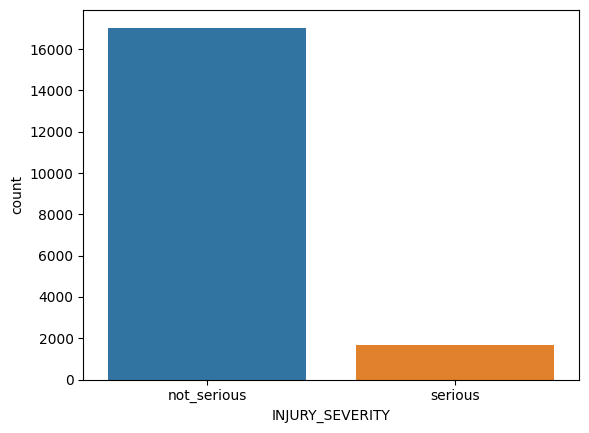

In [8]:
sns.countplot(x ='INJURY_SEVERITY', data = PROC_df_crash_data)
#plt.savefig('dependent variable.svg',dpi=1200)

<Figure size 640x480 with 0 Axes>

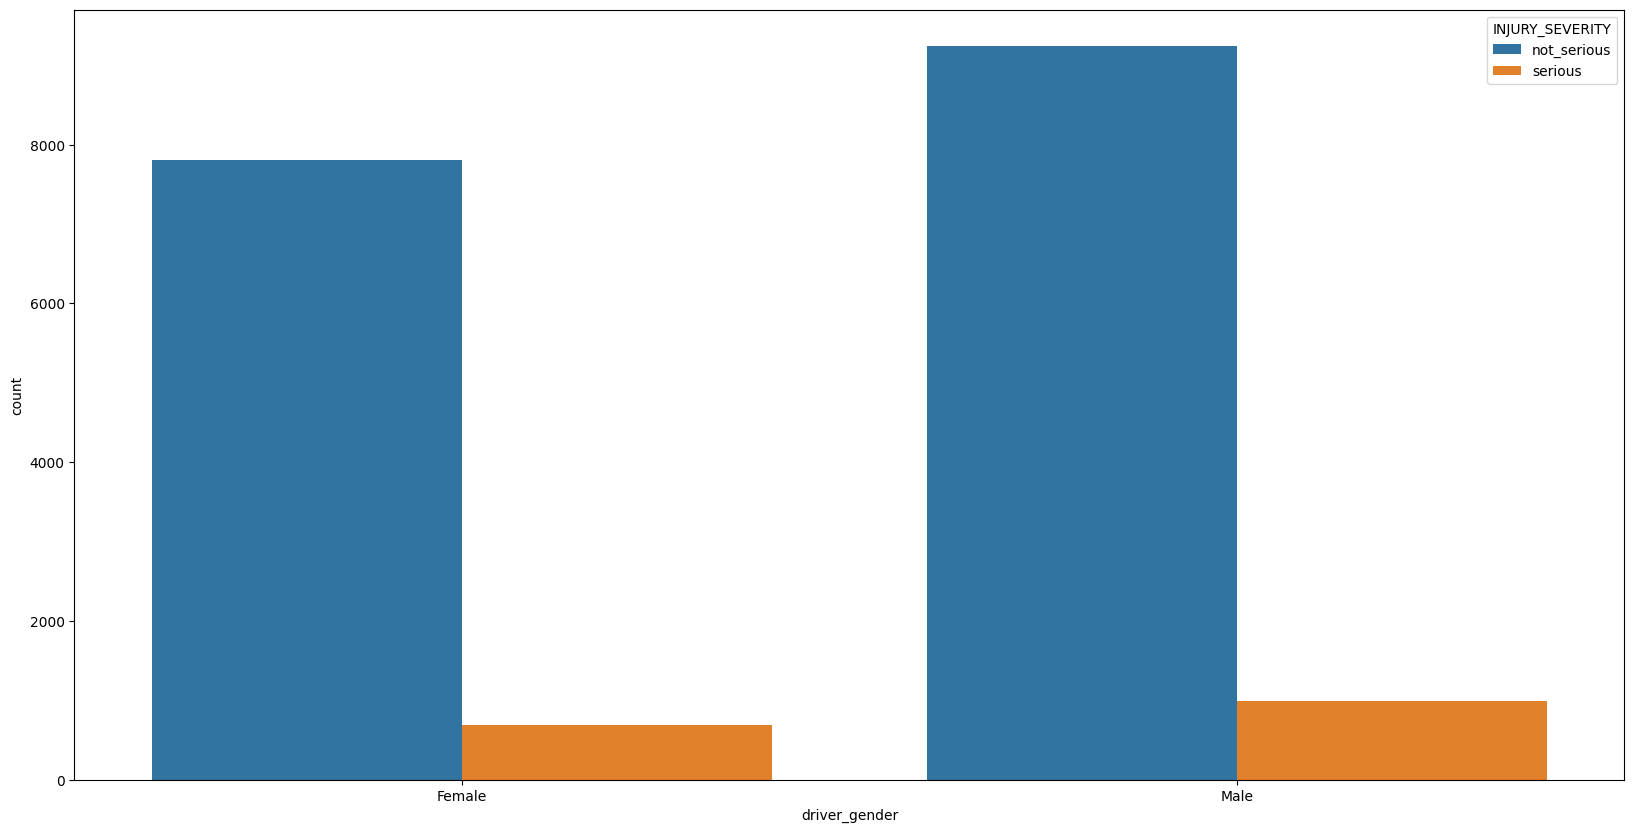

<Figure size 640x480 with 0 Axes>

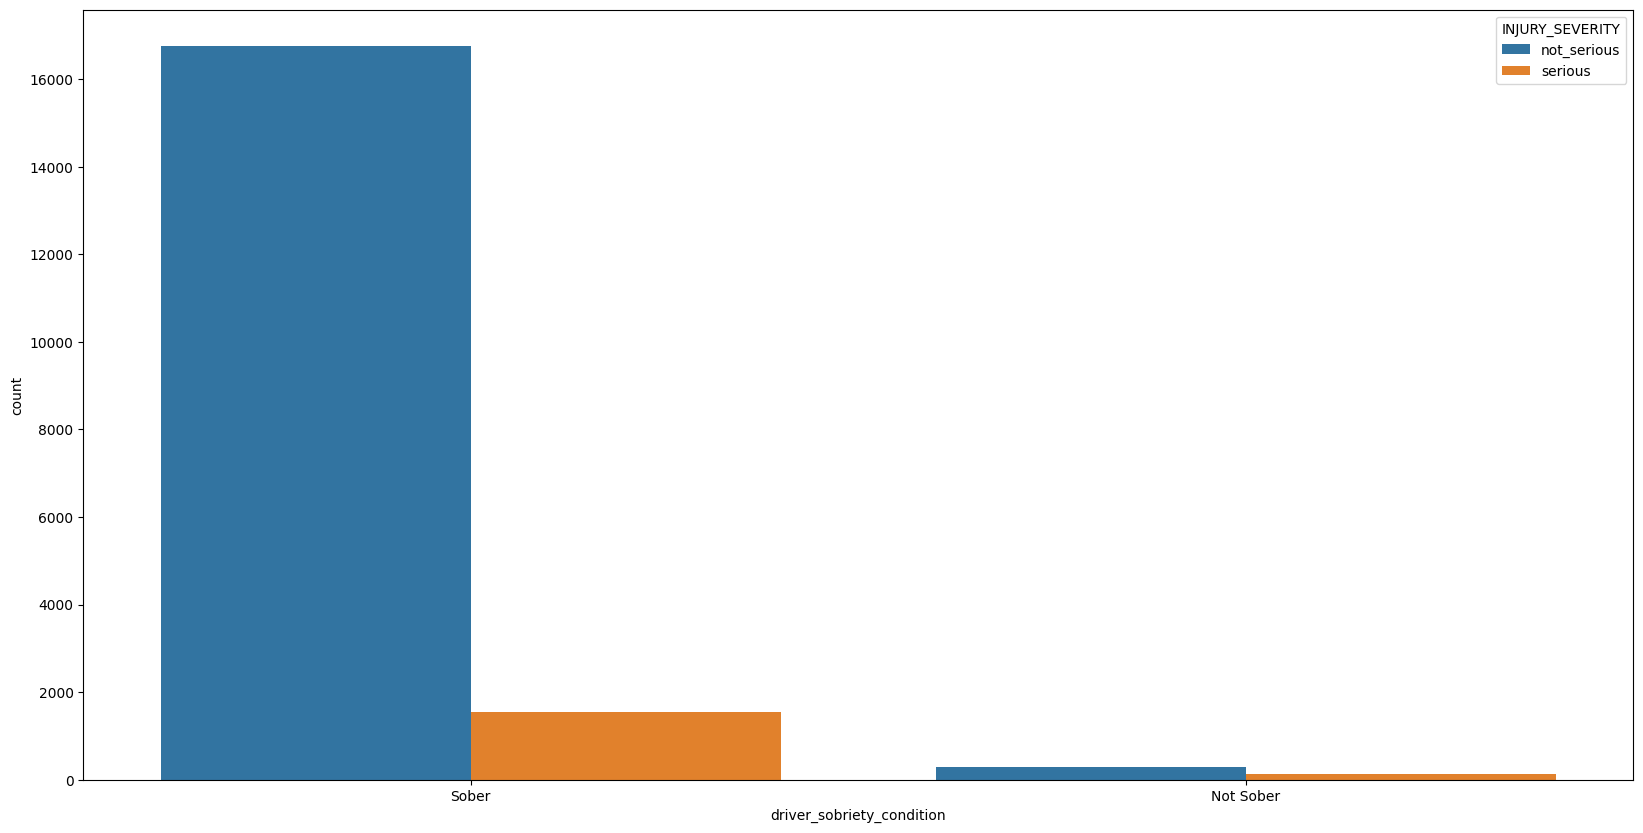

<Figure size 640x480 with 0 Axes>

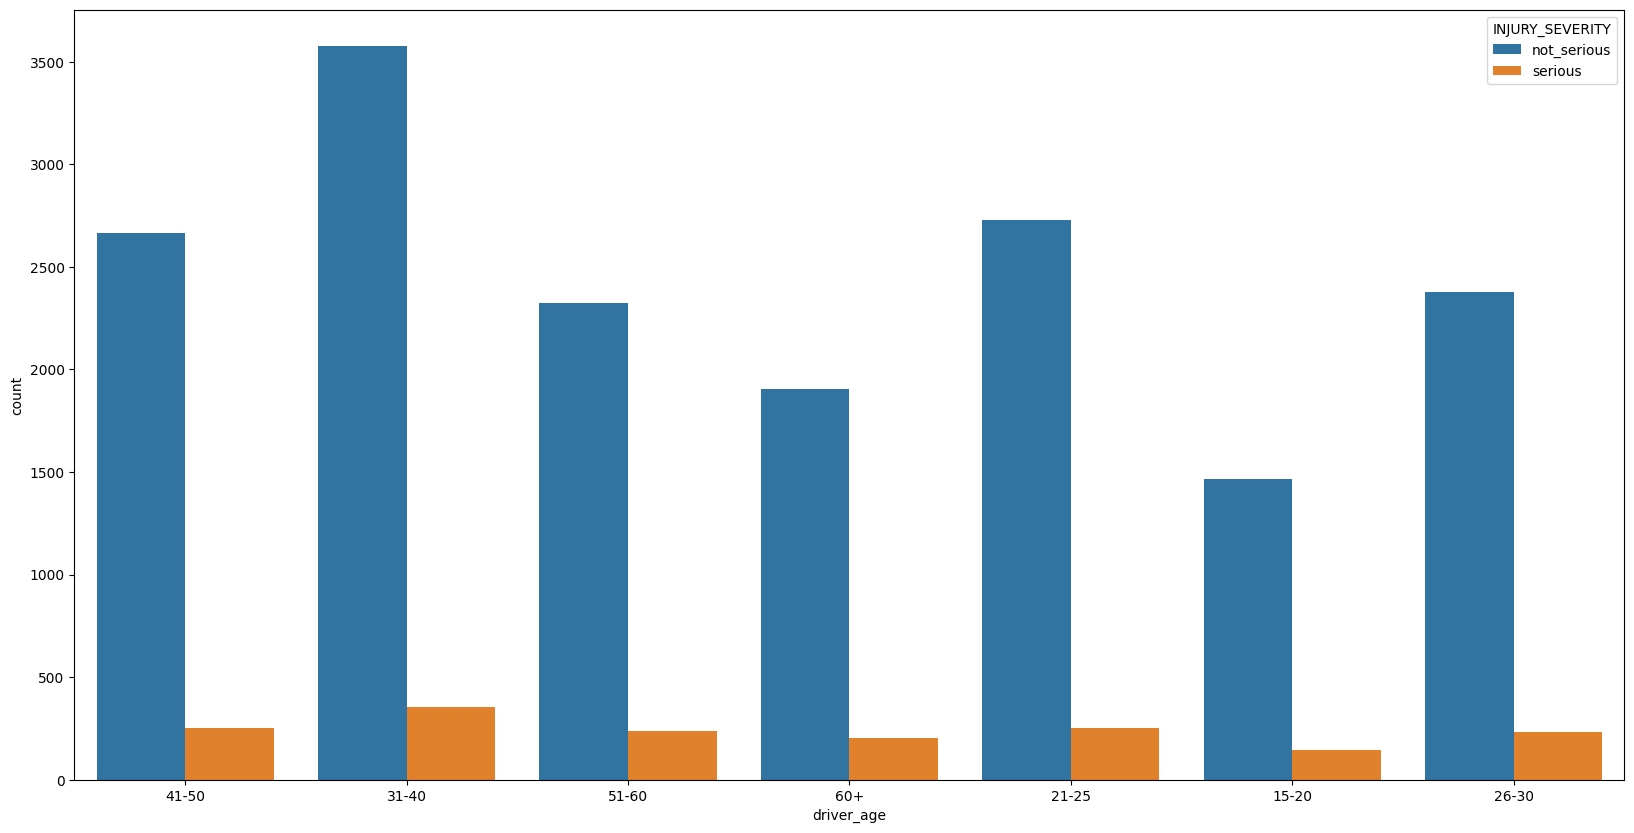

<Figure size 640x480 with 0 Axes>

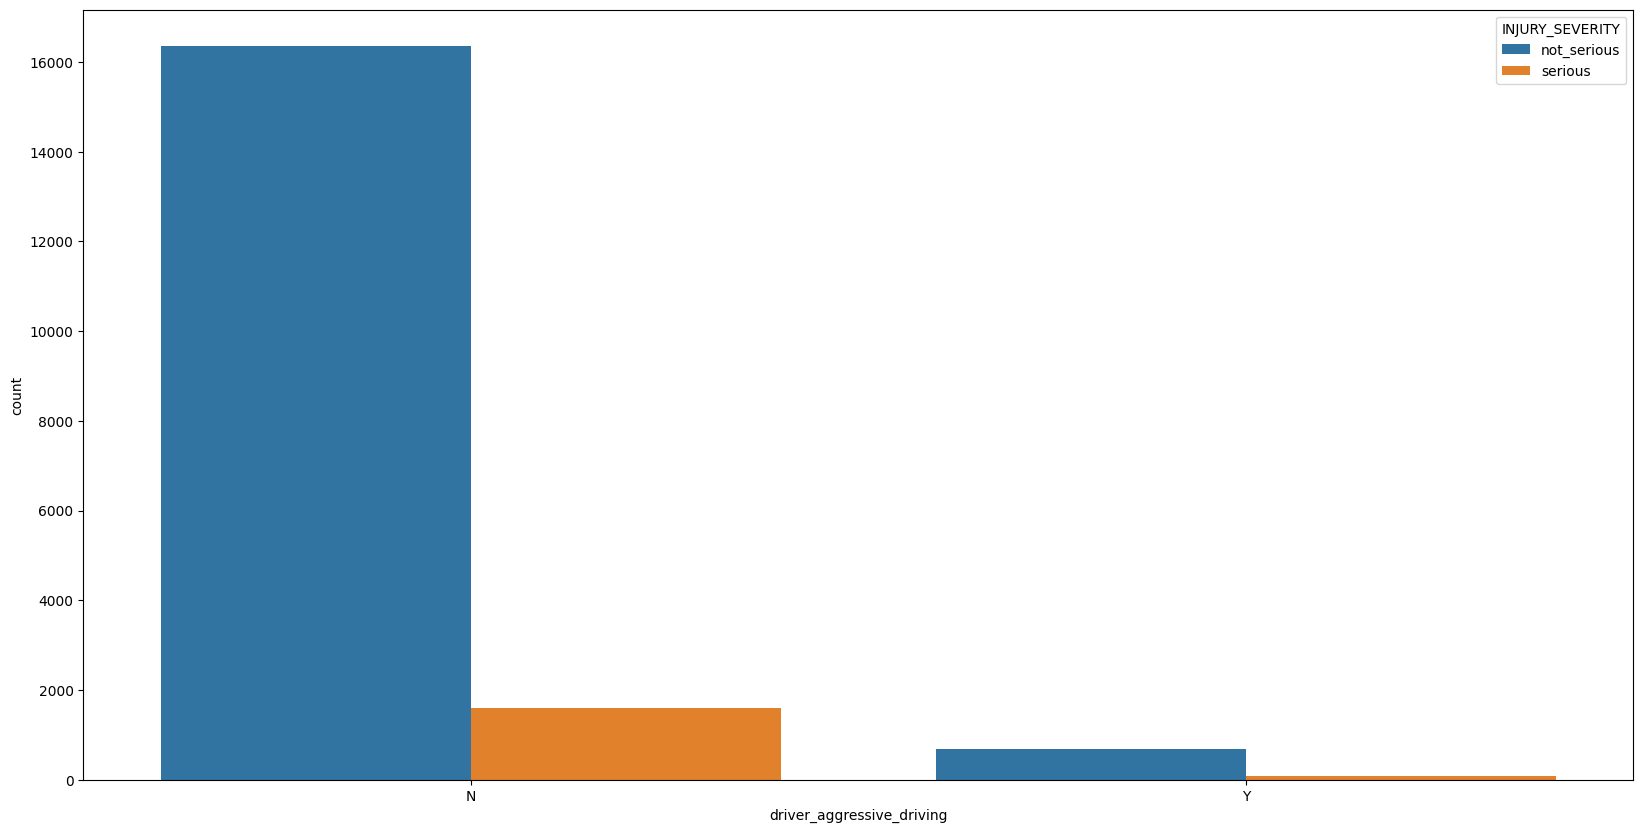

<Figure size 640x480 with 0 Axes>

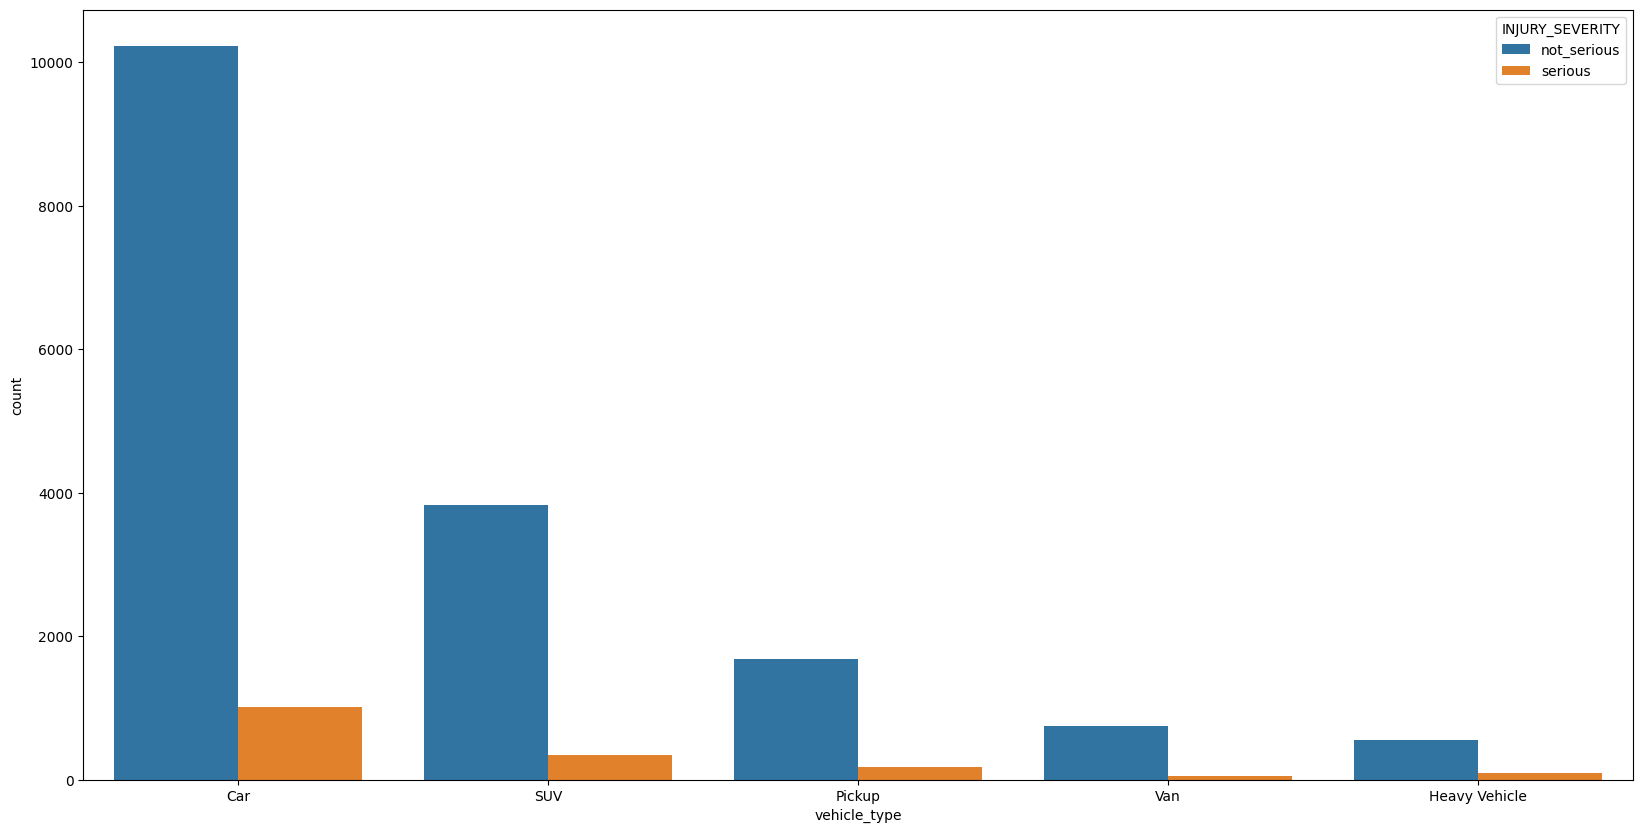

<Figure size 640x480 with 0 Axes>

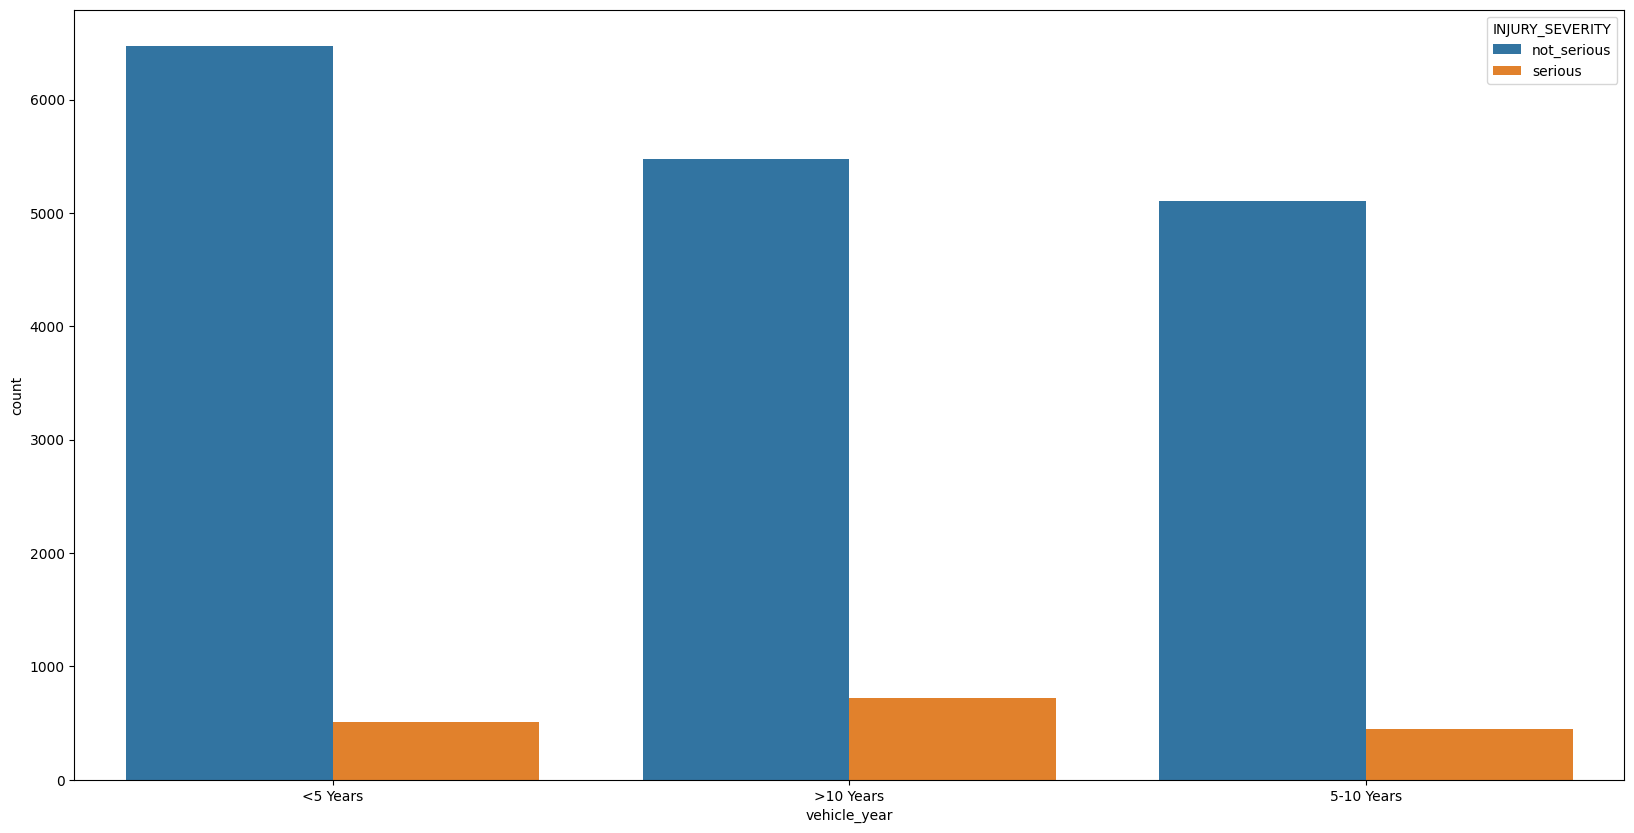

<Figure size 640x480 with 0 Axes>

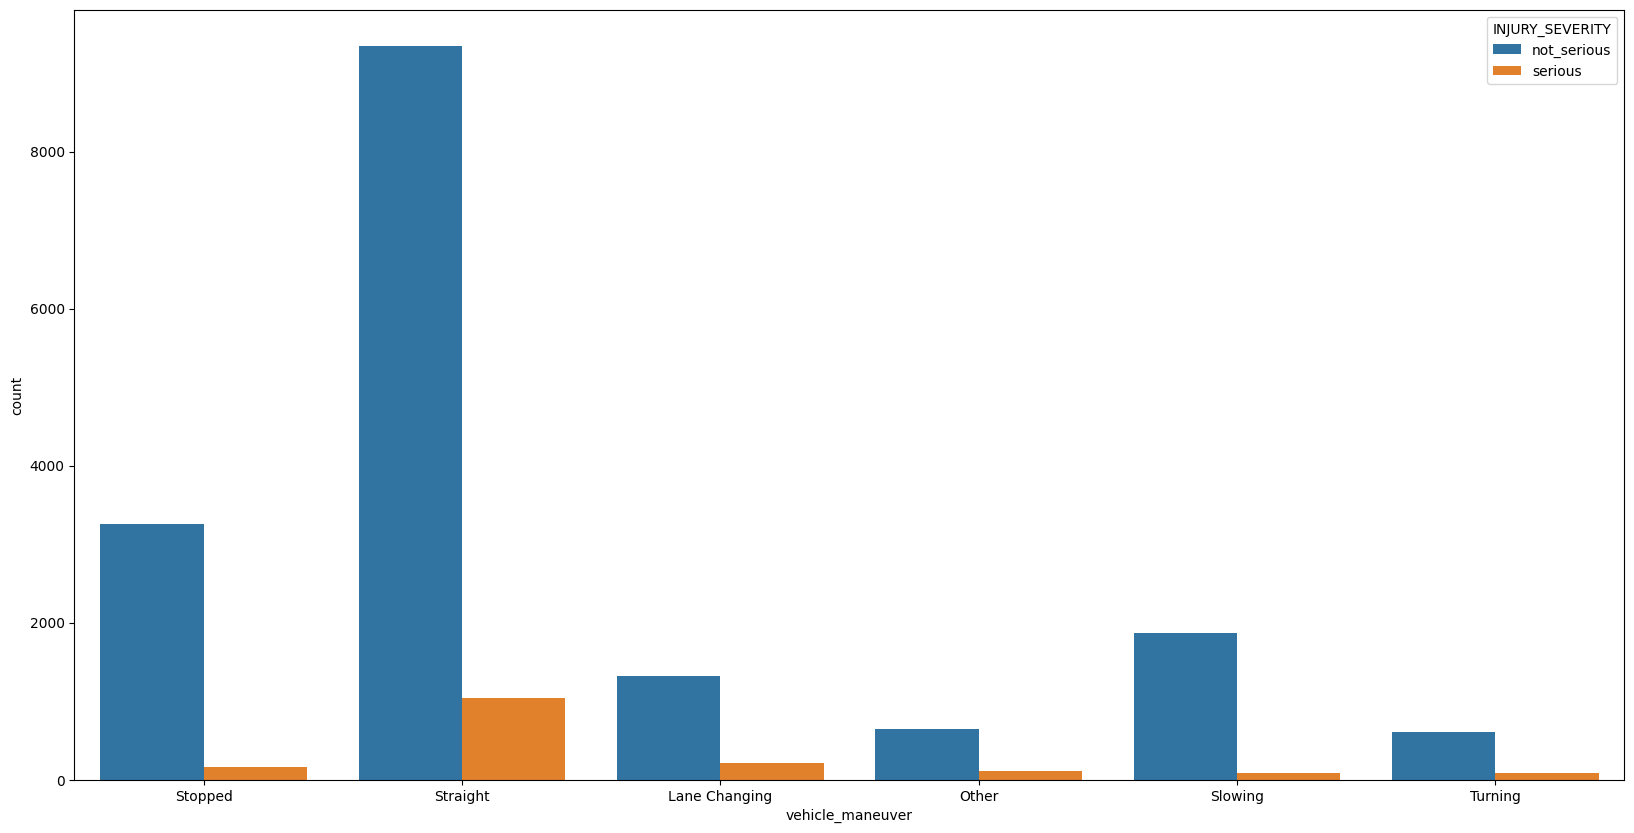

<Figure size 640x480 with 0 Axes>

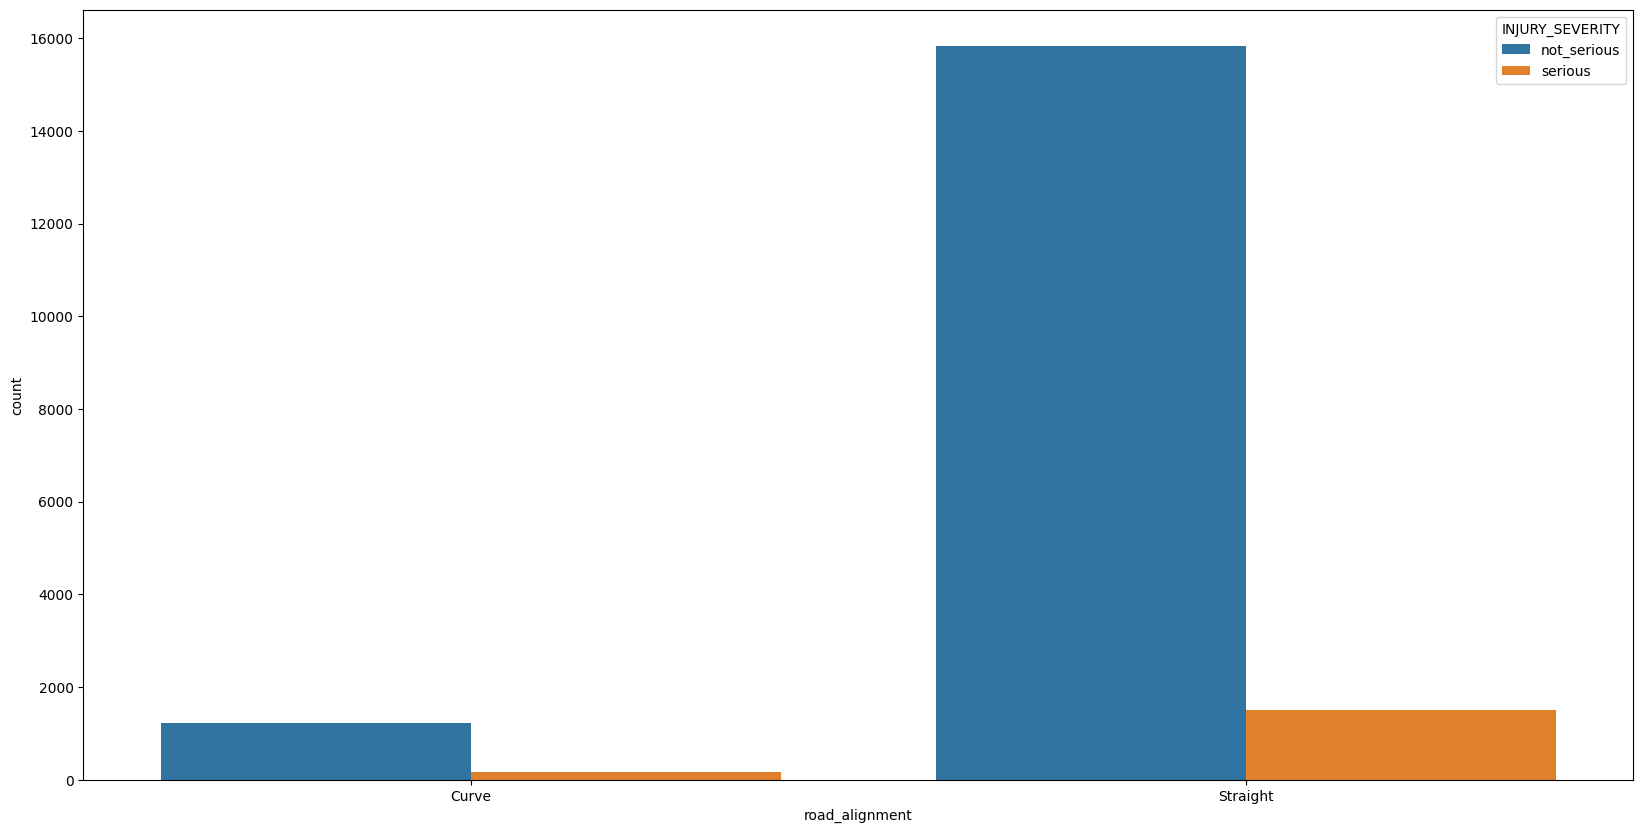

<Figure size 640x480 with 0 Axes>

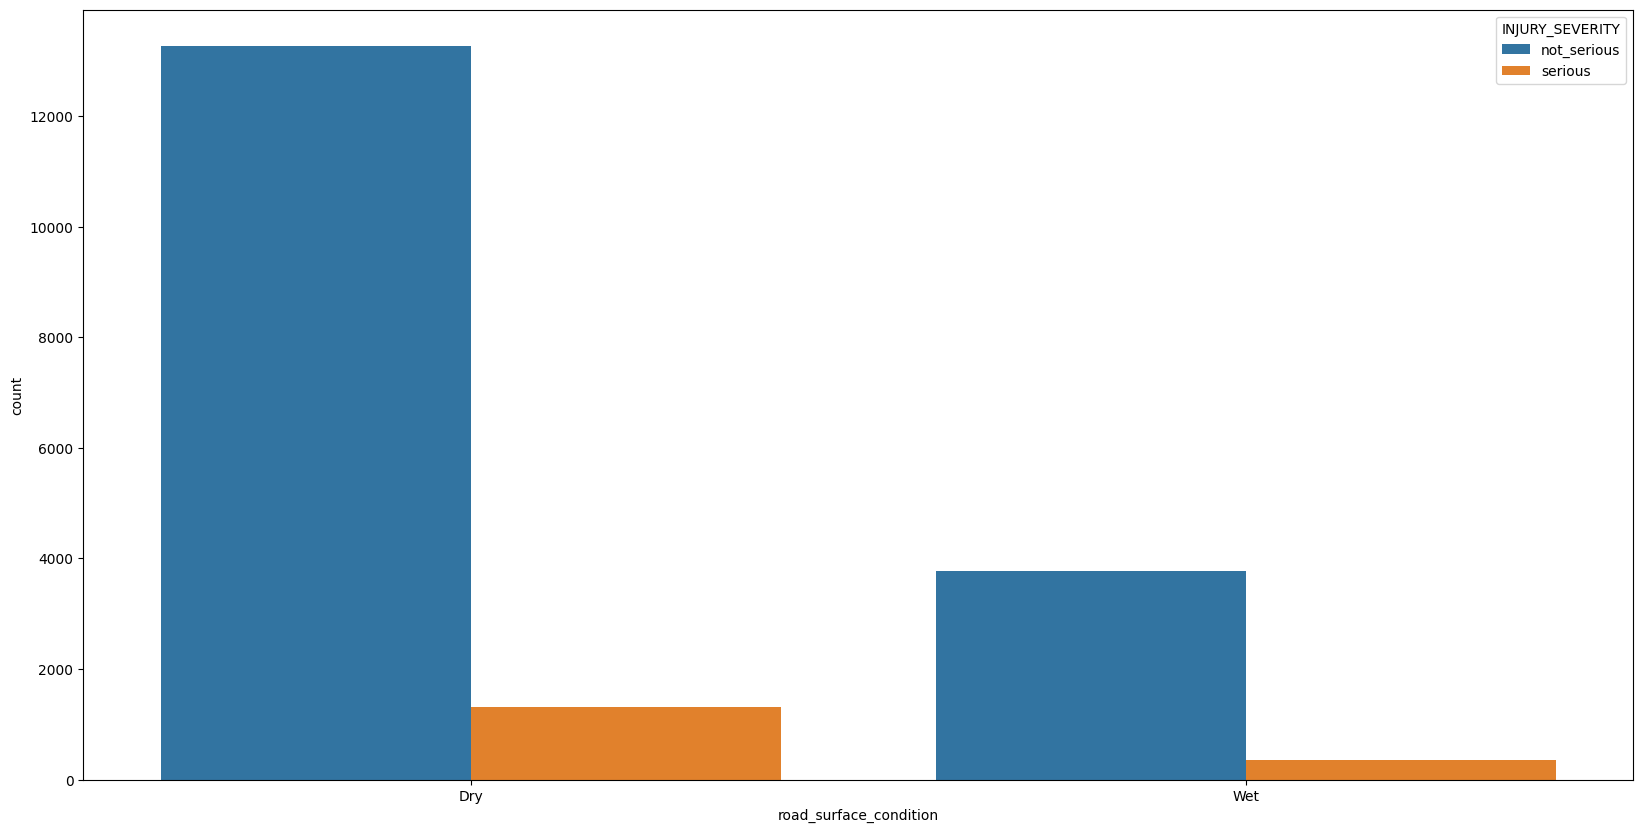

<Figure size 640x480 with 0 Axes>

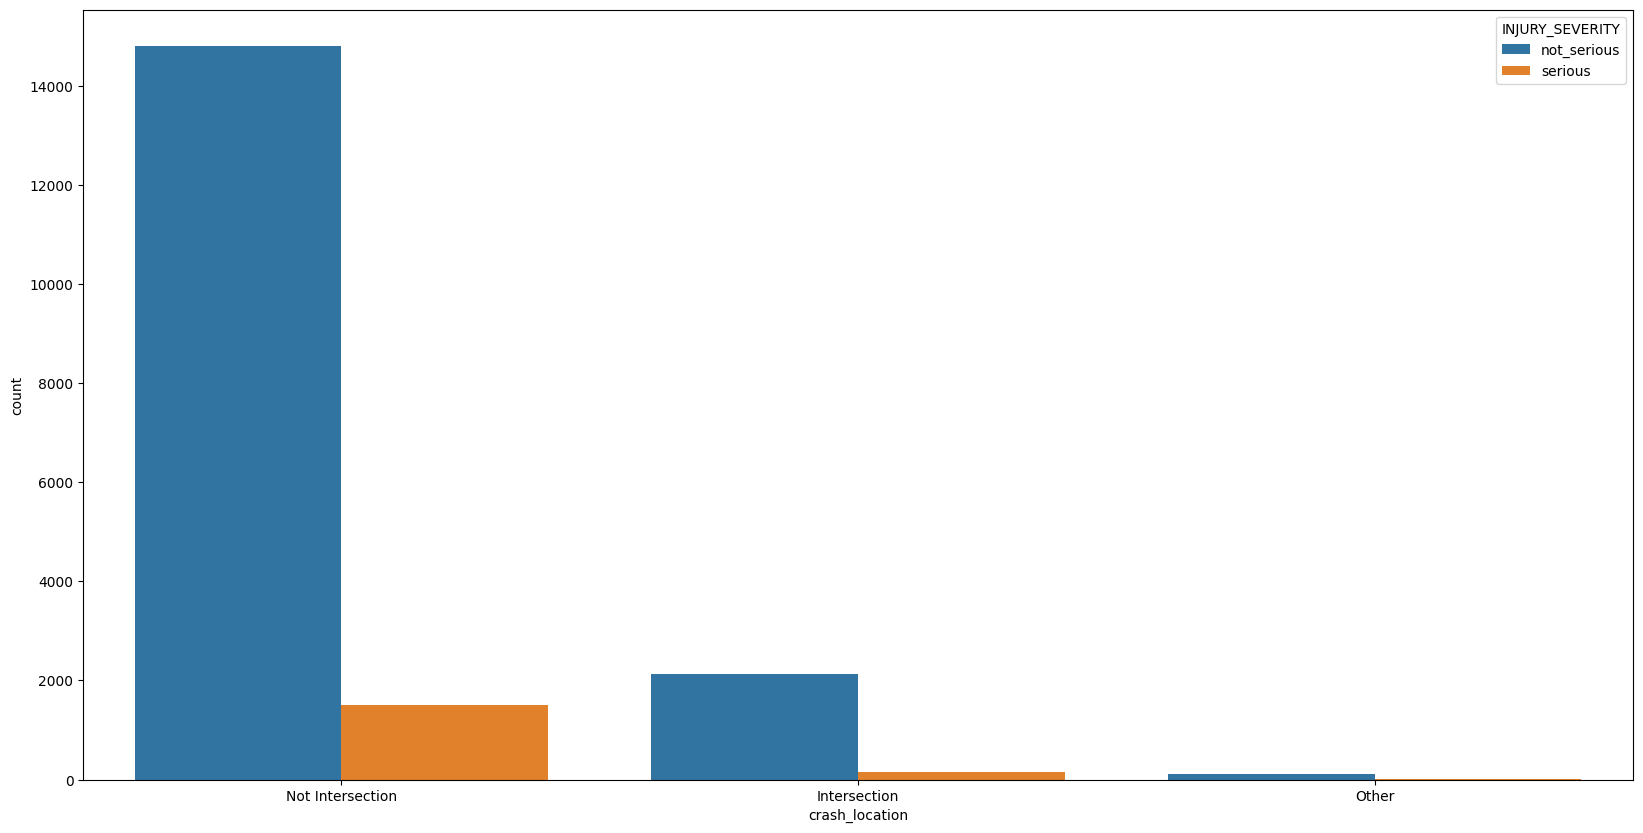

<Figure size 640x480 with 0 Axes>

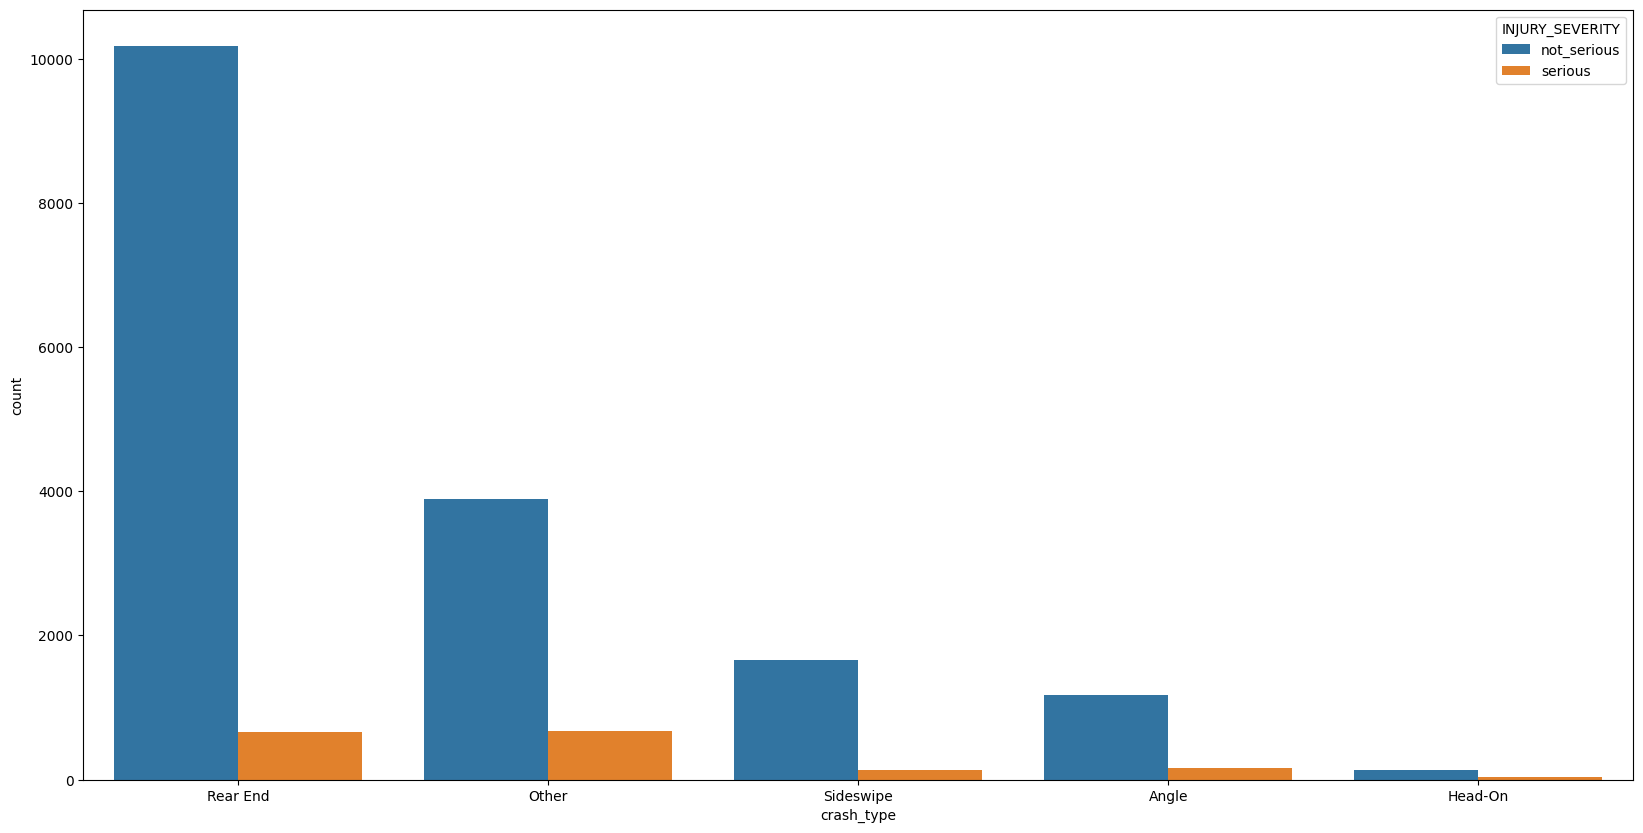

<Figure size 640x480 with 0 Axes>

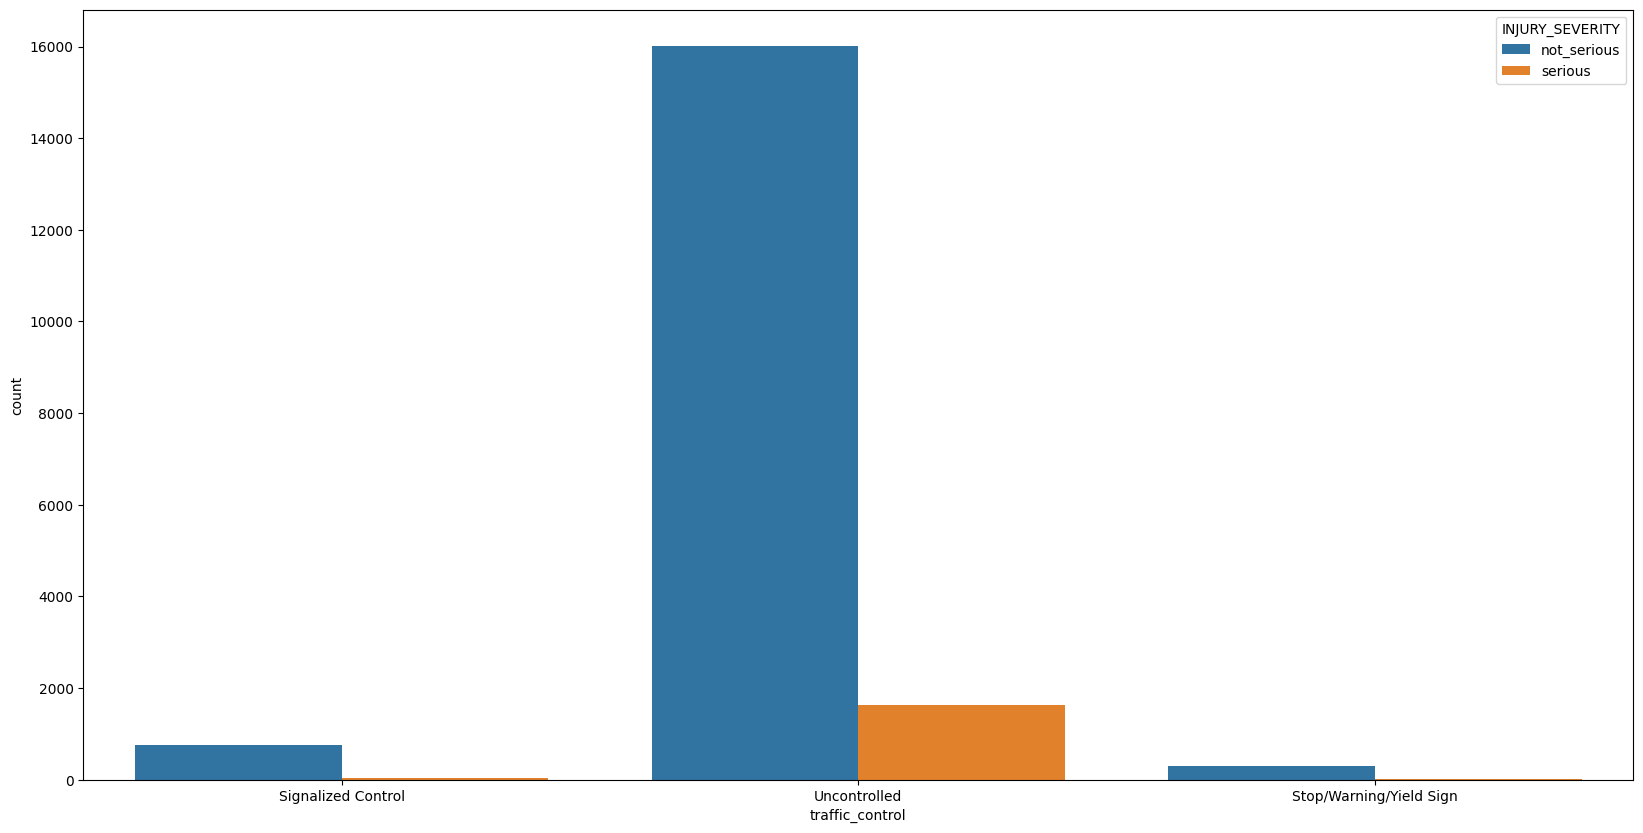

<Figure size 640x480 with 0 Axes>

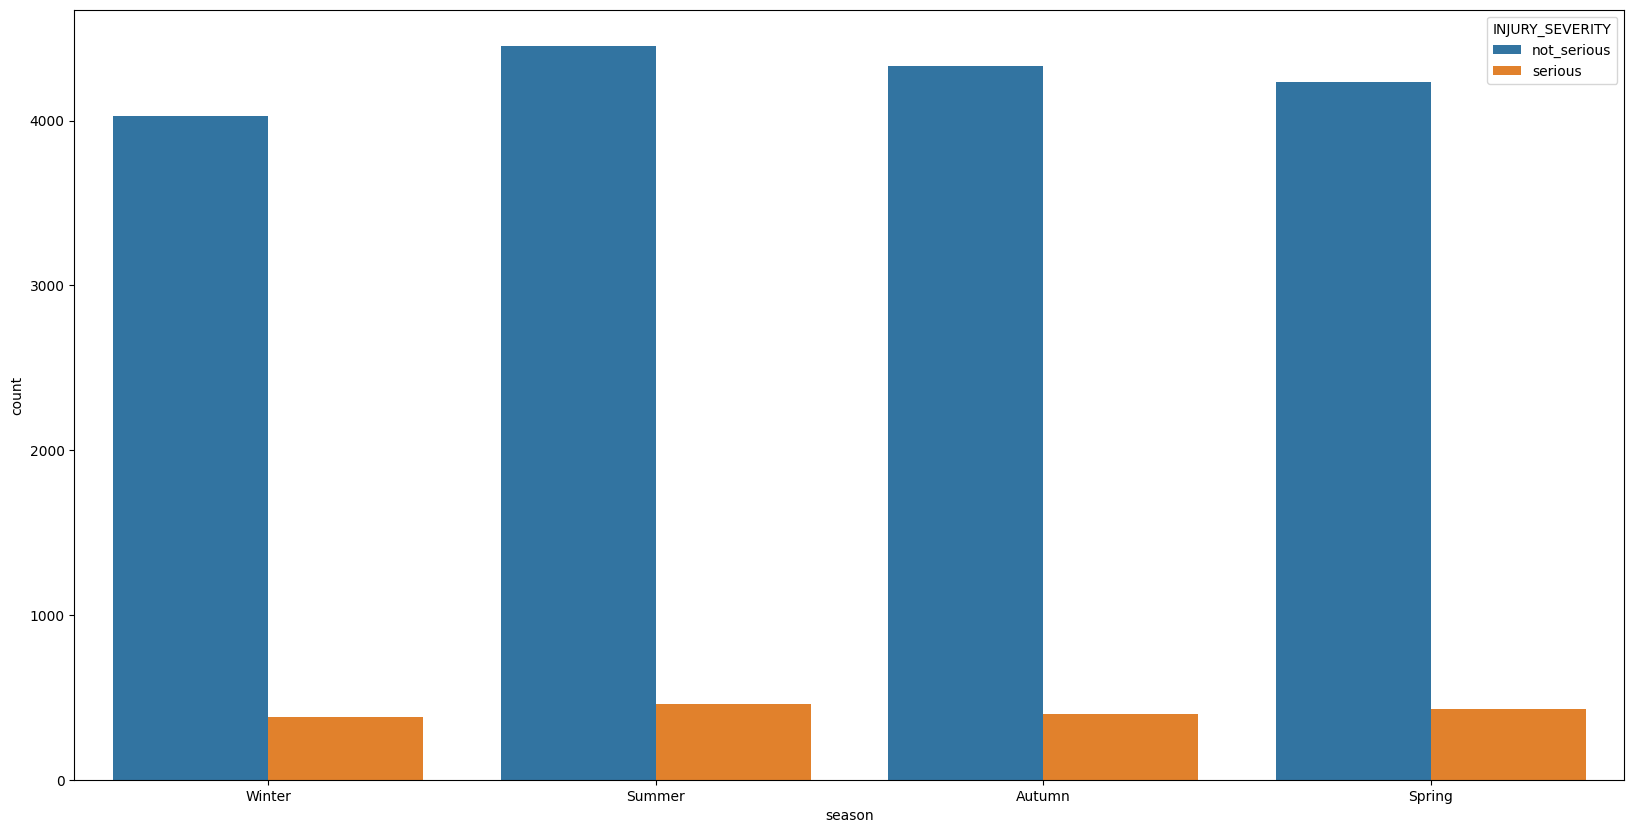

<Figure size 640x480 with 0 Axes>

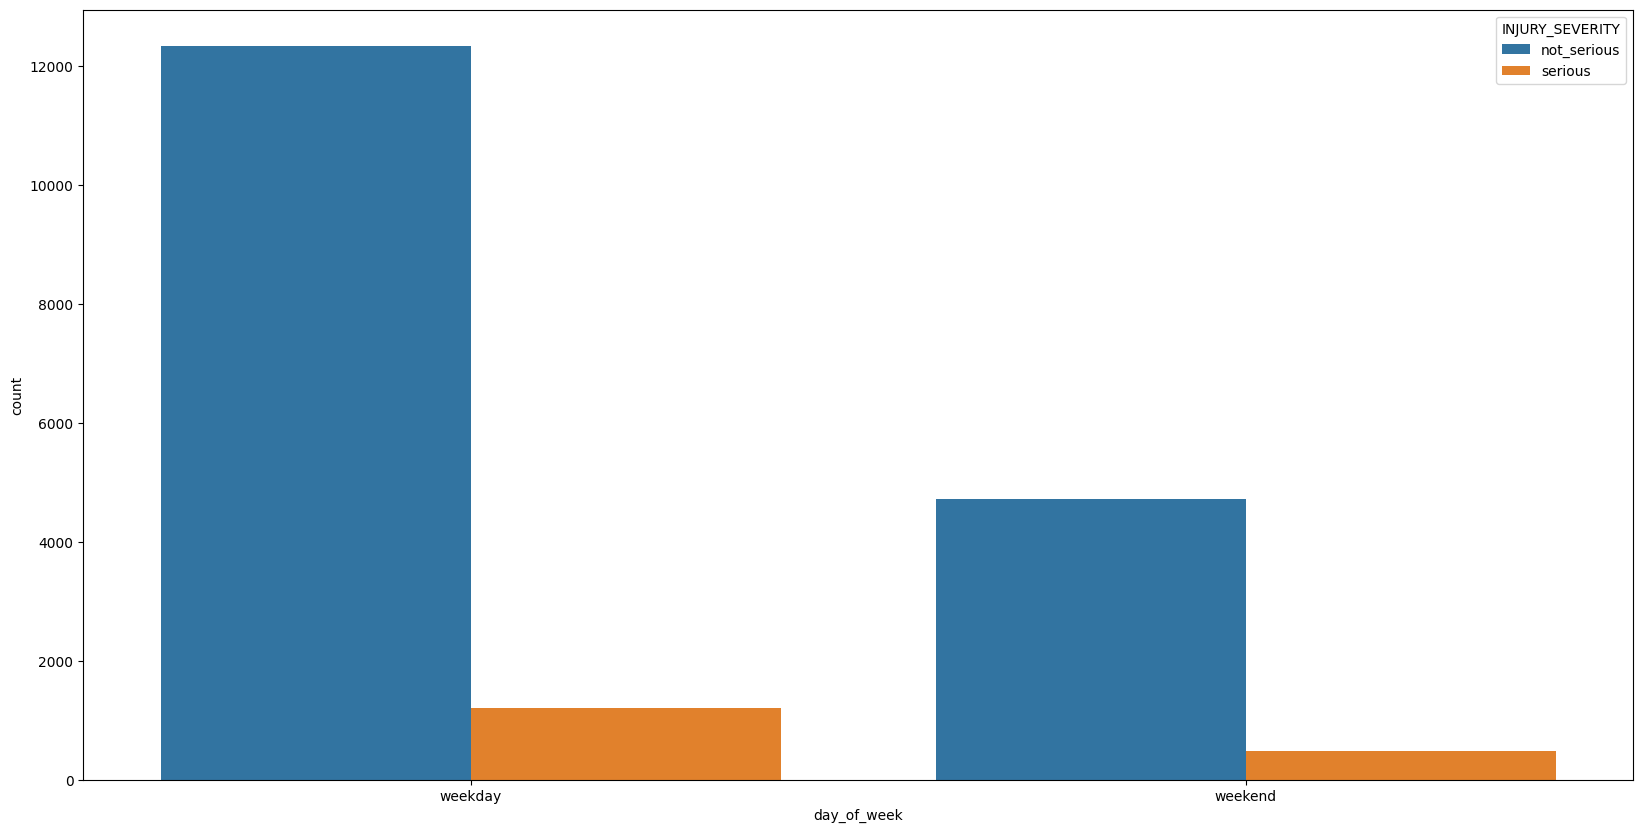

<Figure size 640x480 with 0 Axes>

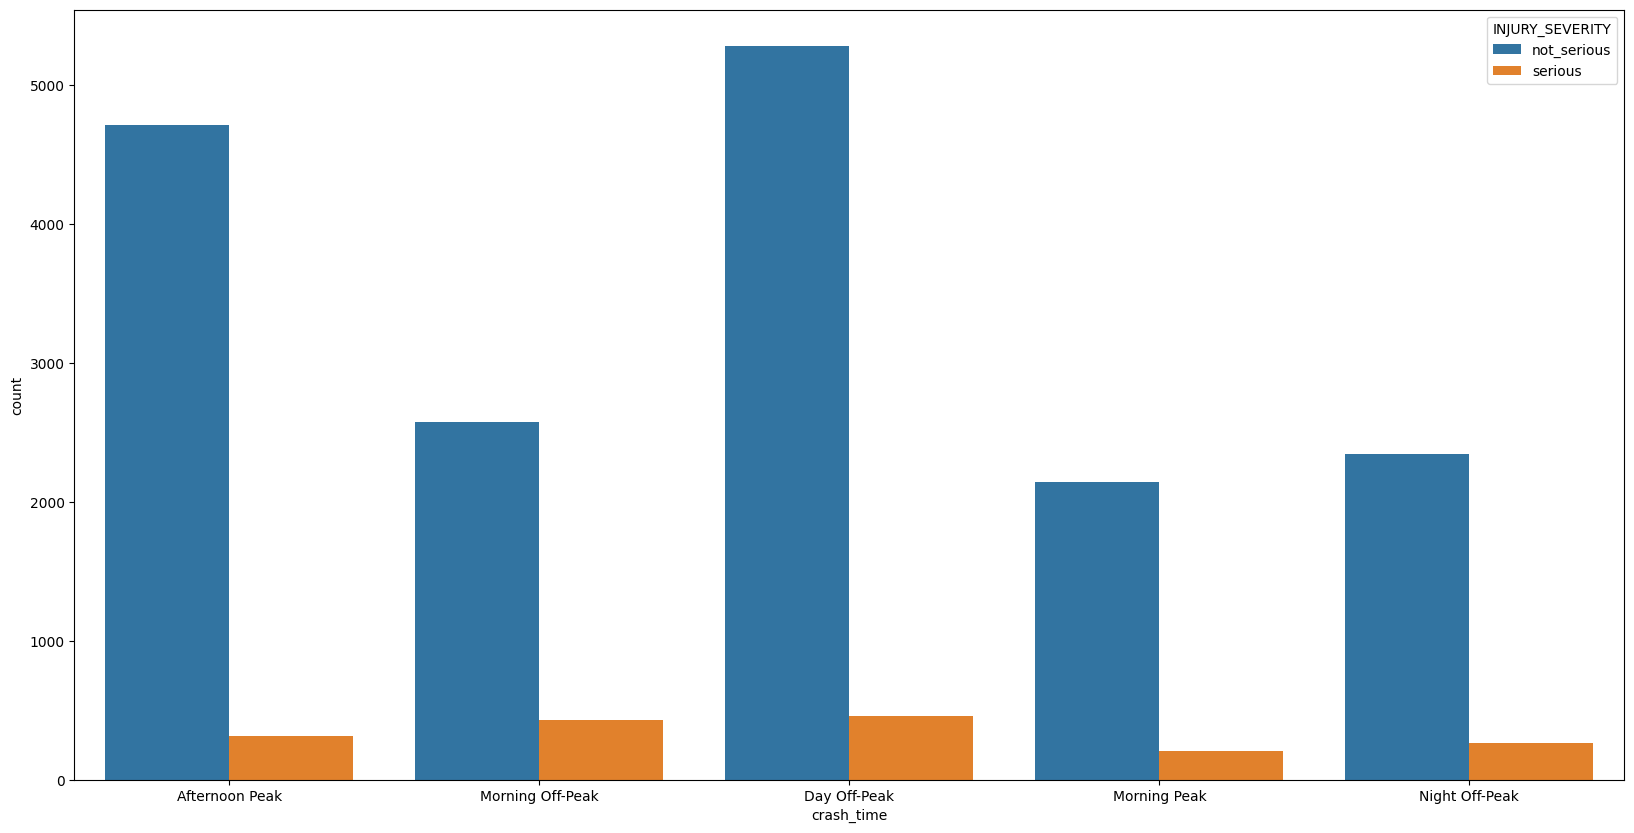

<Figure size 640x480 with 0 Axes>

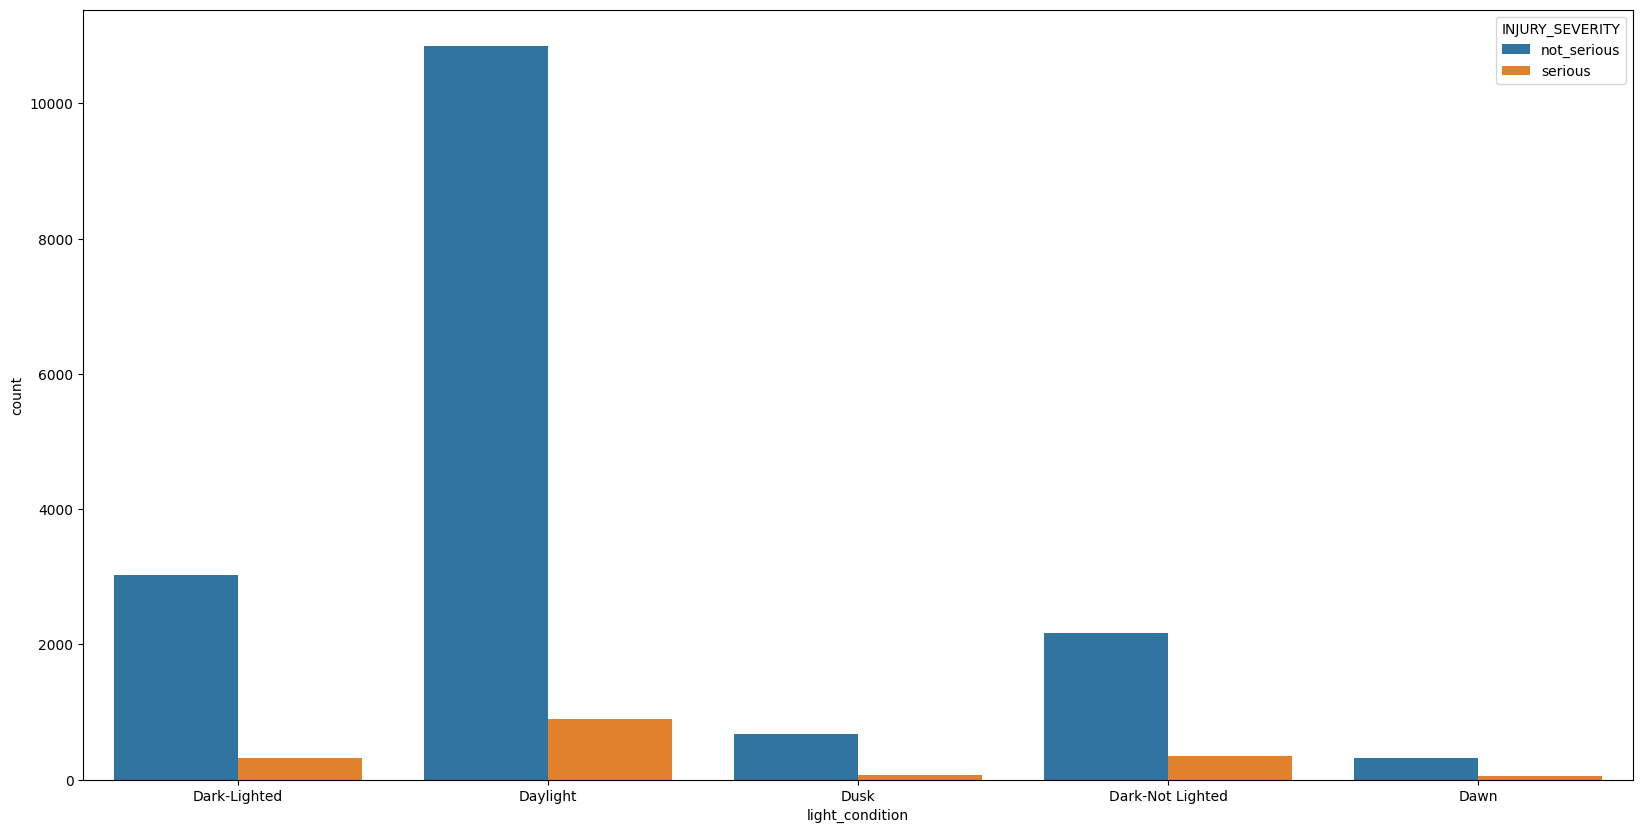

<Figure size 640x480 with 0 Axes>

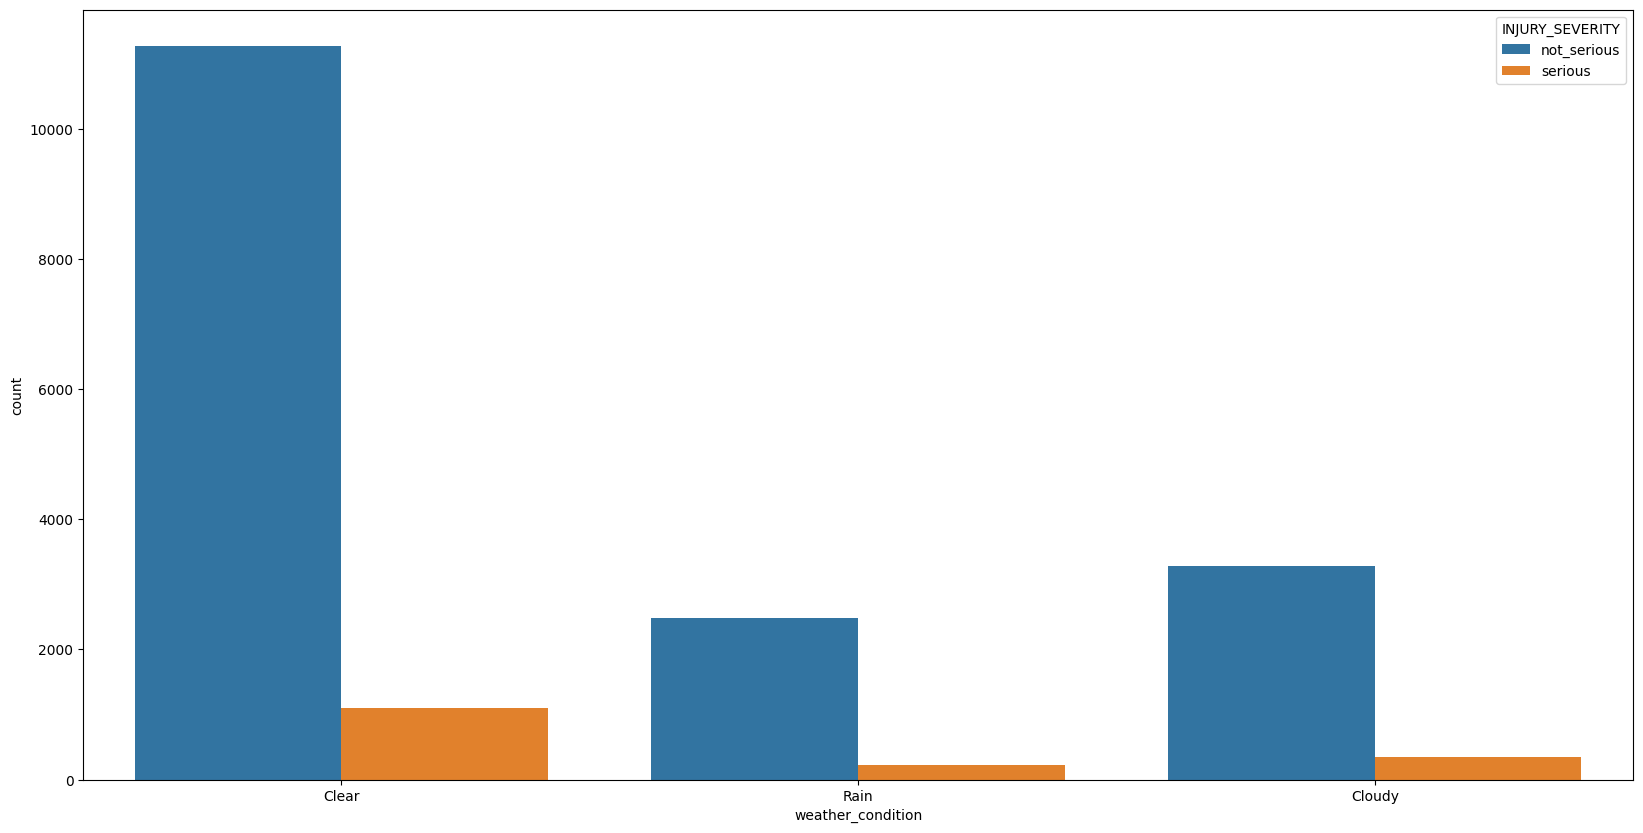

<Figure size 640x480 with 0 Axes>

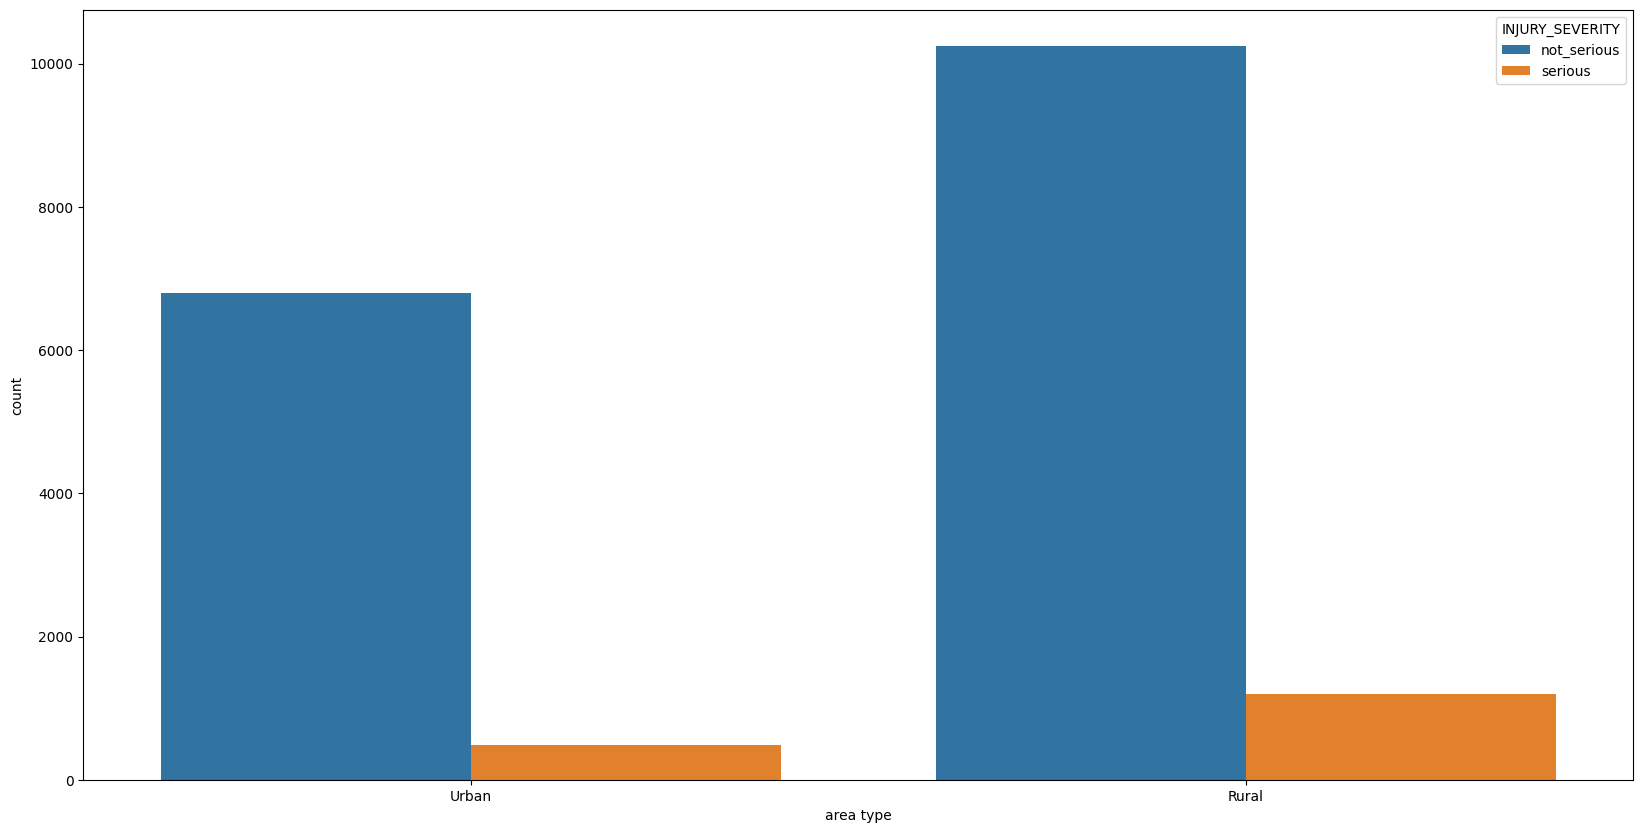

<Figure size 640x480 with 0 Axes>

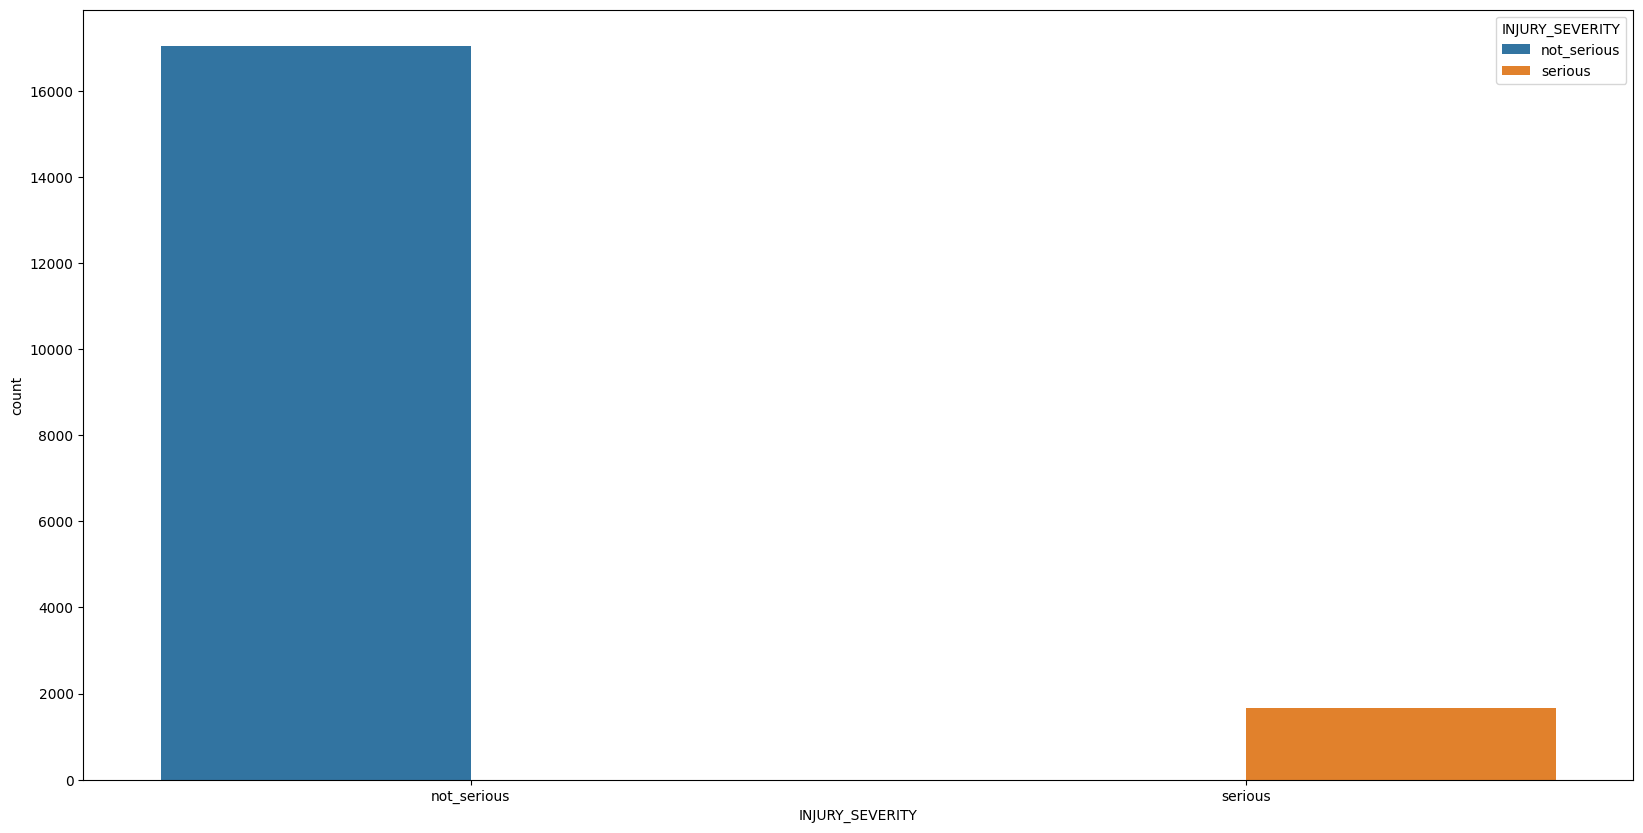

In [16]:
# grphically visualizing features
for col in PROC_df_crash_data.columns:
    plt.figure()
    fig = plt.figure(figsize=(20,10))
    
    sns.countplot(x=col, data=PROC_df_crash_data, hue='INJURY_SEVERITY')
    #plt.savefig("test{}".format(col))

In [10]:
# feature names before dummy formation
features_to_encode = X.columns.tolist()

# making categorical independent features into numeric representation
X = pd.get_dummies(X)
X

driver_gender_Female  driver_gender_Male  driver_sobriety_condition_Not Sober  driver_sobriety_condition_Sober  driver_age_15-20  driver_age_21-25  driver_age_26-30  driver_age_31-40  driver_age_41-50  driver_age_51-60  driver_age_60+  driver_aggressive_driving_N  driver_aggressive_driving_Y  vehicle_type_Car  vehicle_type_Heavy Vehicle  vehicle_type_Pickup  vehicle_type_SUV  vehicle_type_Van  vehicle_year_5-10 Years  vehicle_year_<5 Years  vehicle_year_>10 Years  vehicle_maneuver_Lane Changing  vehicle_maneuver_Other  vehicle_maneuver_Slowing  vehicle_maneuver_Stopped  vehicle_maneuver_Straight  vehicle_maneuver_Turning  road_alignment_Curve  road_alignment_Straight  road_surface_condition_Dry  road_surface_condition_Wet  crash_location_Intersection  crash_location_Not Intersection  crash_location_Other  crash_type_Angle  crash_type_Head-On  crash_type_Other  crash_type_Rear End  crash_type_Sideswipe  traffic_control_Signalized Control  \
0                         1                   0                                    0                                1                 0                 0                 0                 0                 1                 0               0                            1                            0                 1                           0                    0                 0                 0                        0                      1                       0                               0                       0                         0                         1                          0                         0                     1                        0                           1                           0                            0                                1                     0                 0                   0                 0                    1                     0                                   1   
1                         0                   1                                    0                                1                 0                 0                 0                 1                 0                 0               0                            1                            0                 1                           0                    0                 0                 0                        0                      0                       1                               0                       0                         0                         0                          1                         0                     0                        1                           1                           0                            0                                1                     0                 0                   0                 0                    1                     0                                   0   
2                         0                   1                                    0                                1                 0                 0                 0                 1                 0                 0               0                            1                            0                 1                           0                    0                 0                 0                        0                      0                       1                               0                       0                         0                         0                          1                         0                     0                        1                           1                           0                            1                                0                     0                 0                   0                 0                    1                     0                                   0   
3                         1                   0                                    0                                1                 0                 0          

In [8]:
X = X[['driver_gender_Female',
       'driver_sobriety_condition_Sober',
       'driver_age_21-25', 'driver_age_26-30', 'driver_age_31-40',
       'driver_age_41-50', 'driver_age_51-60', 'driver_age_60+',
       'driver_aggressive_driving_N', 
       'vehicle_type_Car', 
       'vehicle_type_Pickup', 'vehicle_type_SUV', 'vehicle_type_Van',
       'vehicle_year_5-10 Years', 'vehicle_year_<5 Years',
       'vehicle_maneuver_Lane Changing',
       'vehicle_maneuver_Other', 'vehicle_maneuver_Slowing',
       'vehicle_maneuver_Stopped', 'vehicle_maneuver_Straight',
       'road_alignment_Straight', 'road_surface_condition_Dry',
       'crash_location_Intersection',
       'crash_location_Not Intersection',
       'crash_type_Angle', 'crash_type_Head-On', 
       'crash_type_Rear End', 'crash_type_Sideswipe',
       'traffic_control_Signalized Control',
       'traffic_control_Uncontrolled', 'season_Autumn', 'season_Spring',
       'season_Summer', 'day_of_week_weekday',
       'crash_time_Afternoon Peak',
       'crash_time_Day Off-Peak', 'crash_time_Morning Off-Peak',
       'crash_time_Morning Peak',
       'light_condition_Dark-Lighted', 'light_condition_Dark-Not Lighted',
       'light_condition_Daylight',
       'light_condition_Dusk', 'weather_condition_Clear',
        'weather_condition_Rain',
       'area type_Rural']]

In [9]:
# splitting data for testing and training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [10]:
# sampling: over
sample = imblearn.over_sampling.RandomOverSampler(random_state=0)
X_train_ROS, y_train_ROS = sample.fit_resample(X_train, y_train)

In [11]:
X_ROS = pd.concat([X_train_ROS, y_train_ROS], axis=1)

<Figure size 640x480 with 0 Axes>

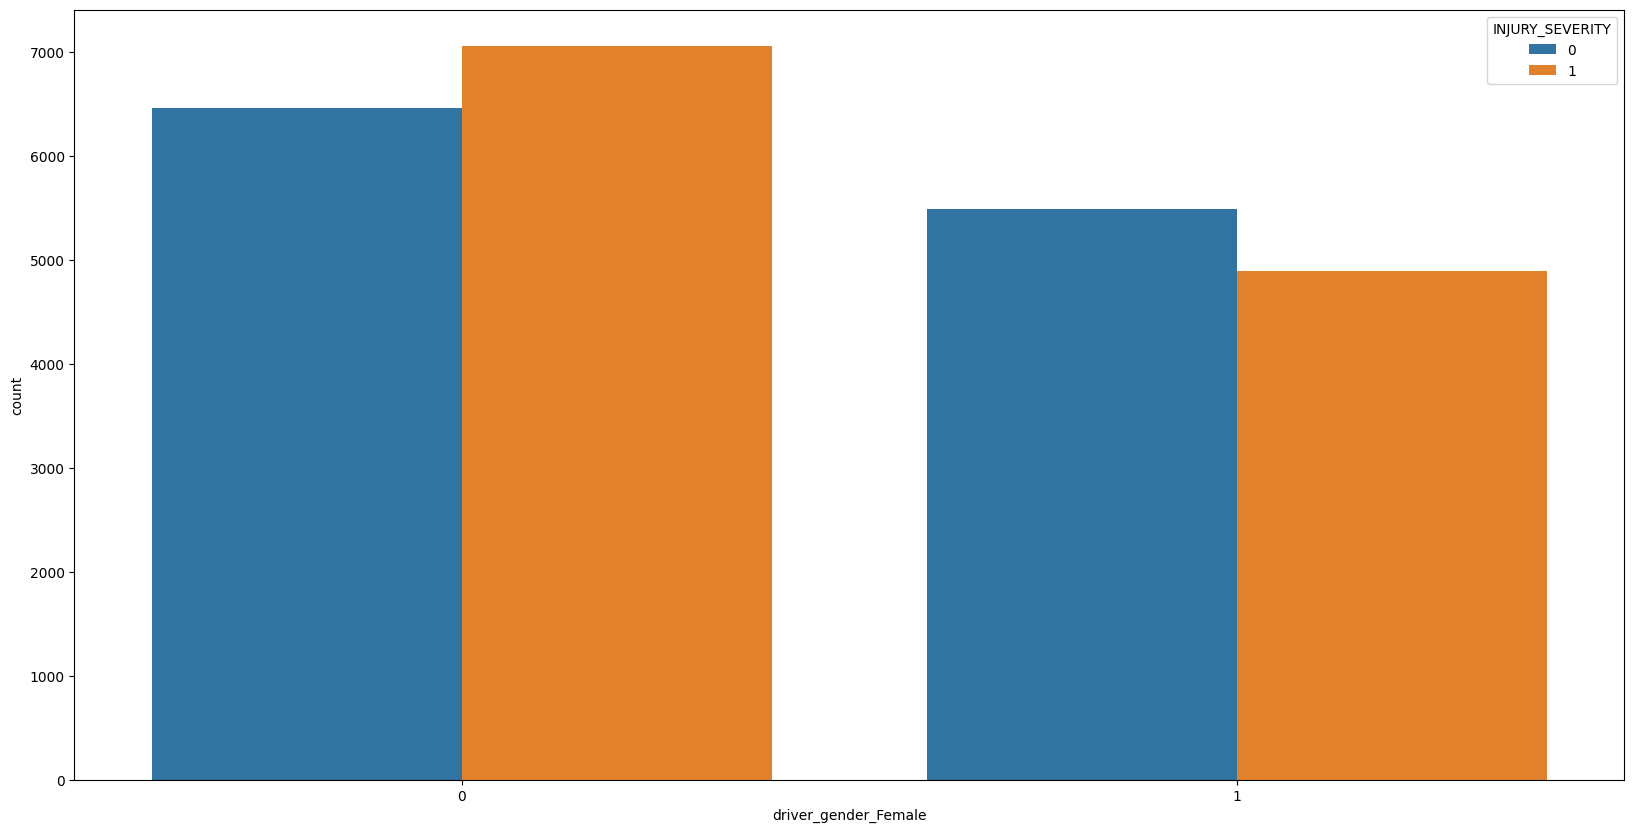

<Figure size 640x480 with 0 Axes>

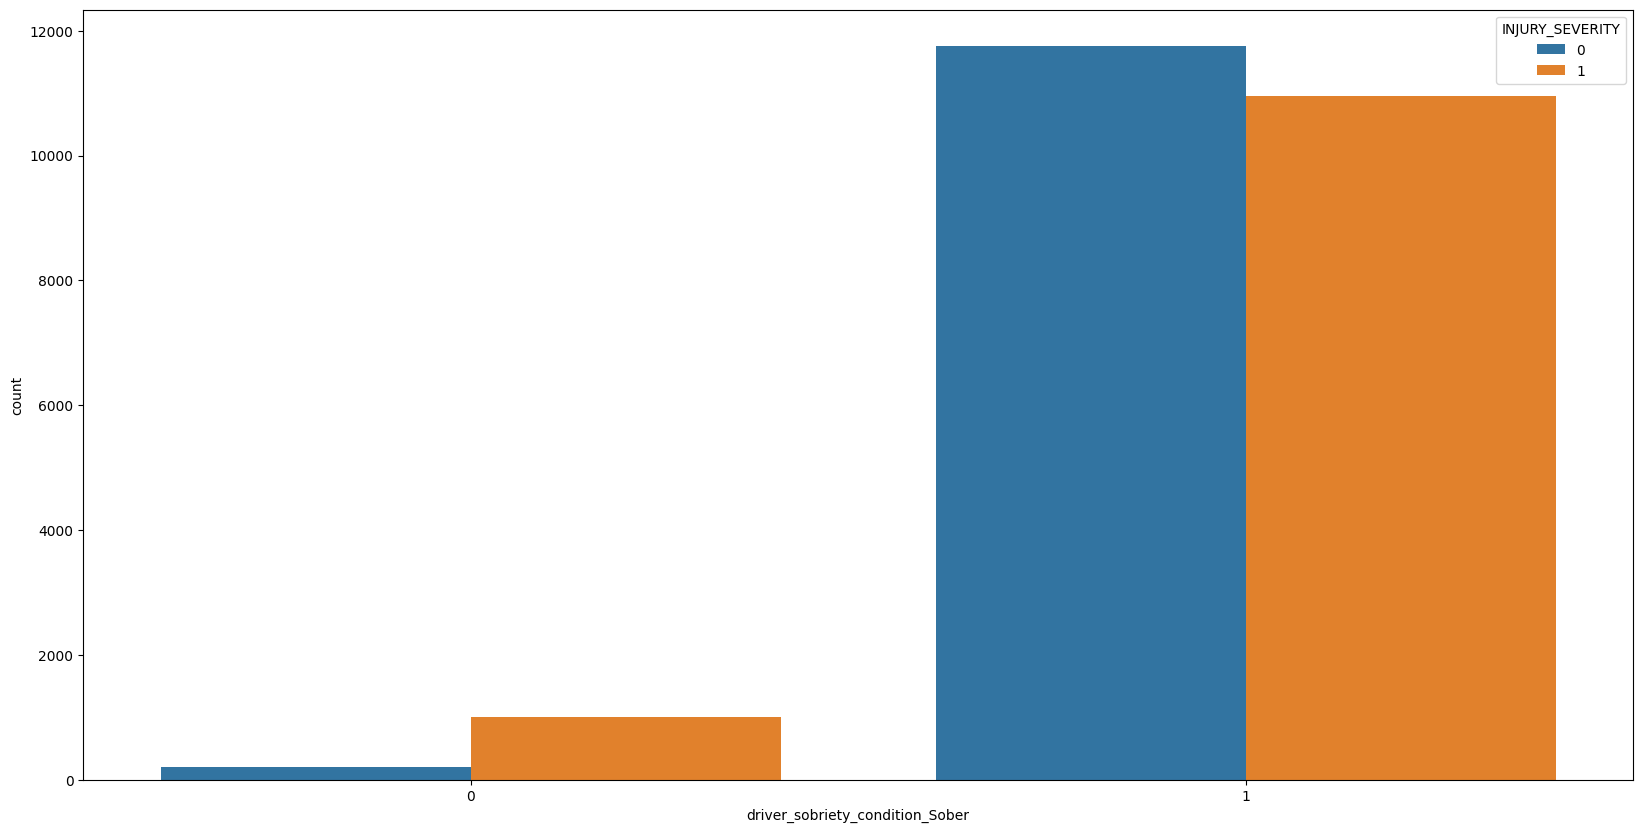

<Figure size 640x480 with 0 Axes>

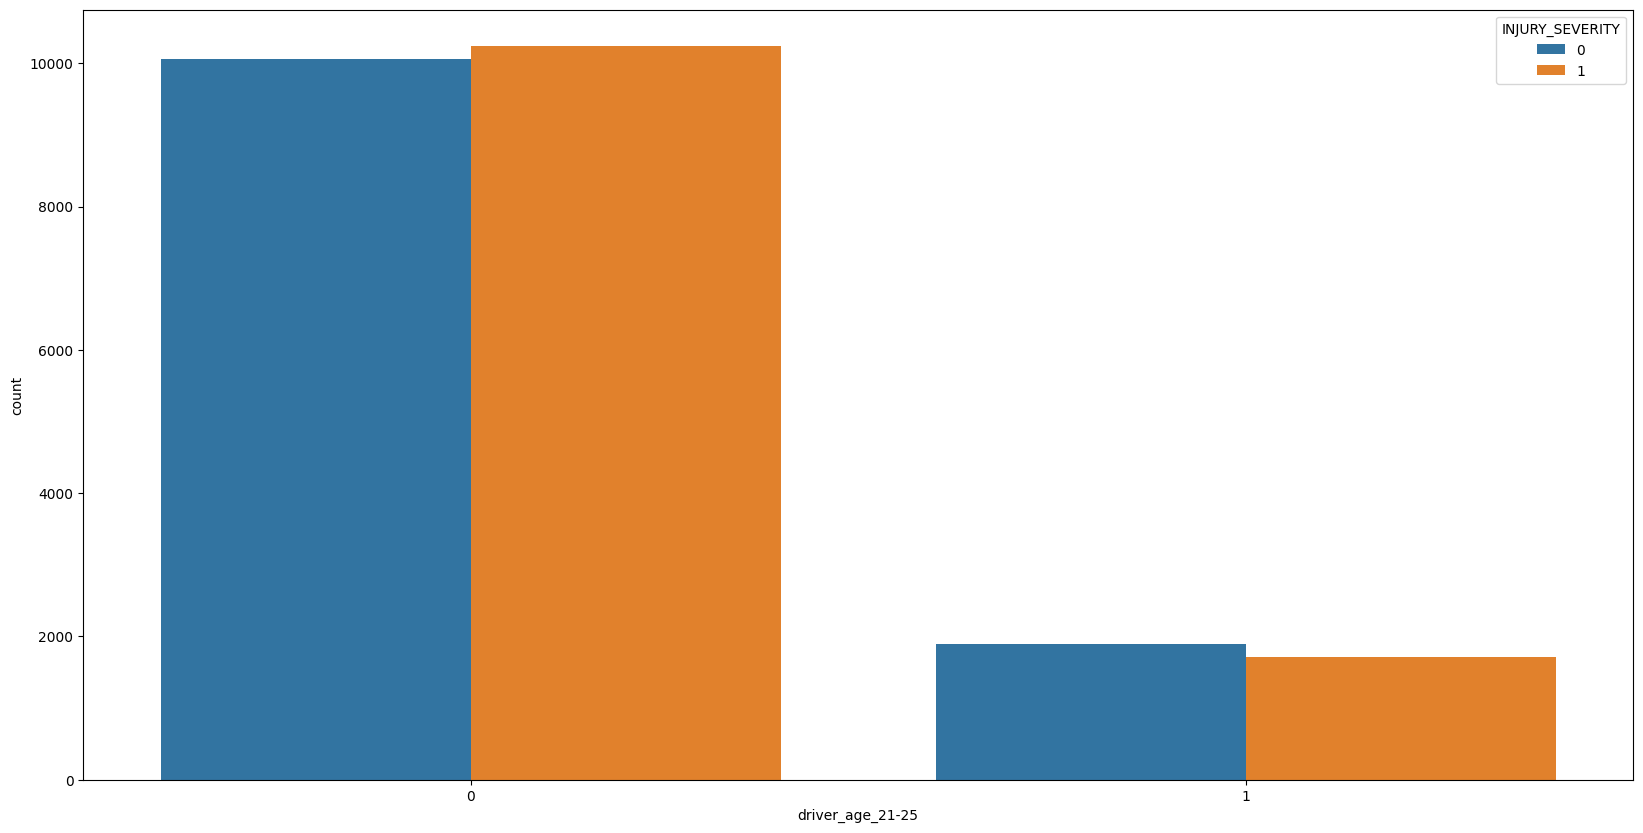

<Figure size 640x480 with 0 Axes>

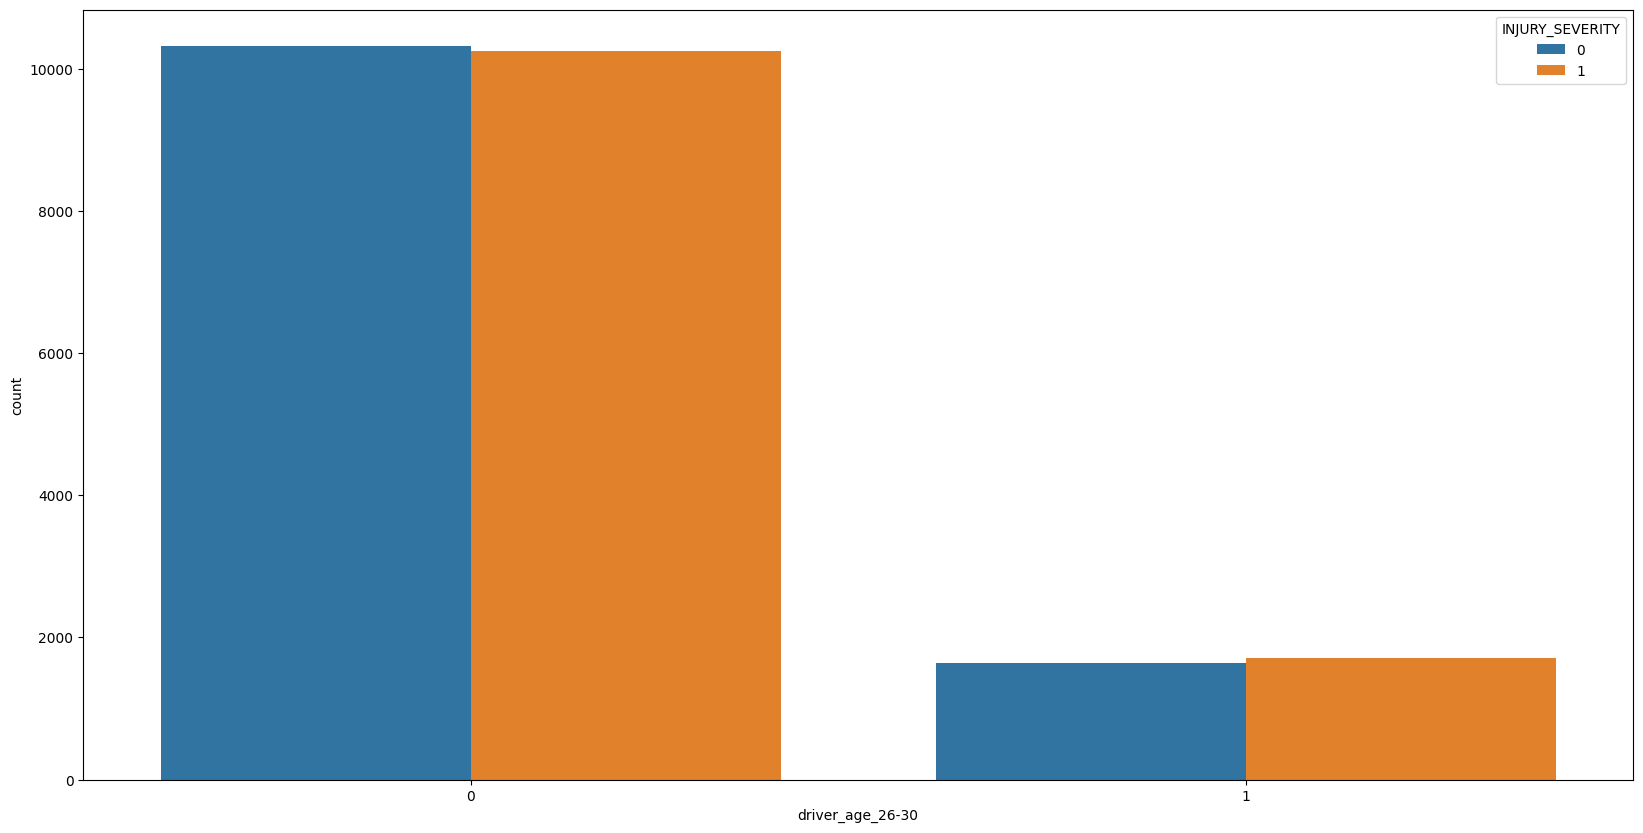

<Figure size 640x480 with 0 Axes>

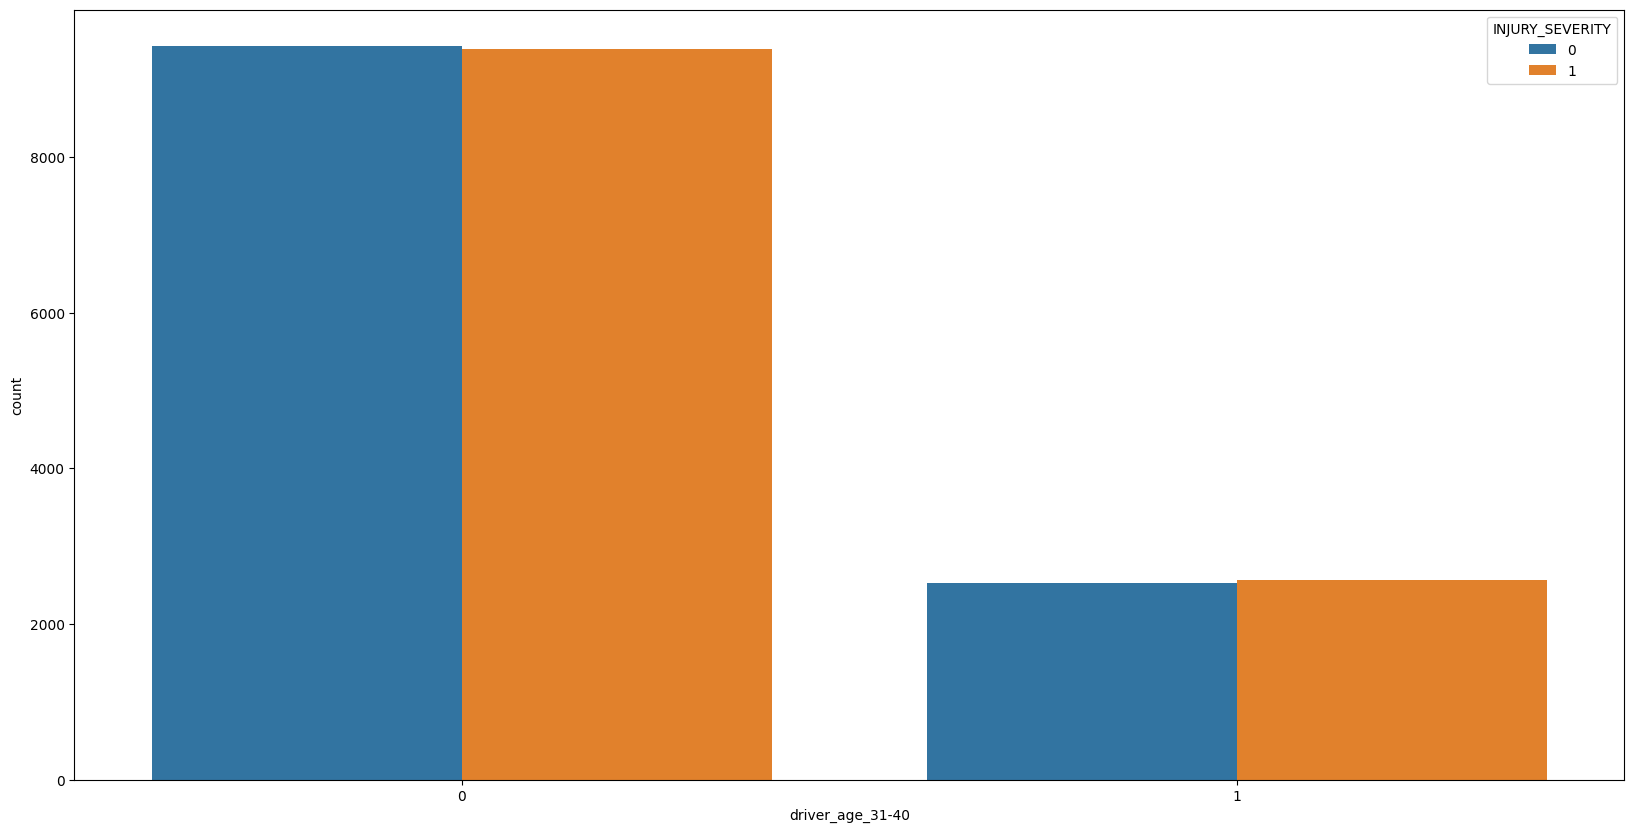

<Figure size 640x480 with 0 Axes>

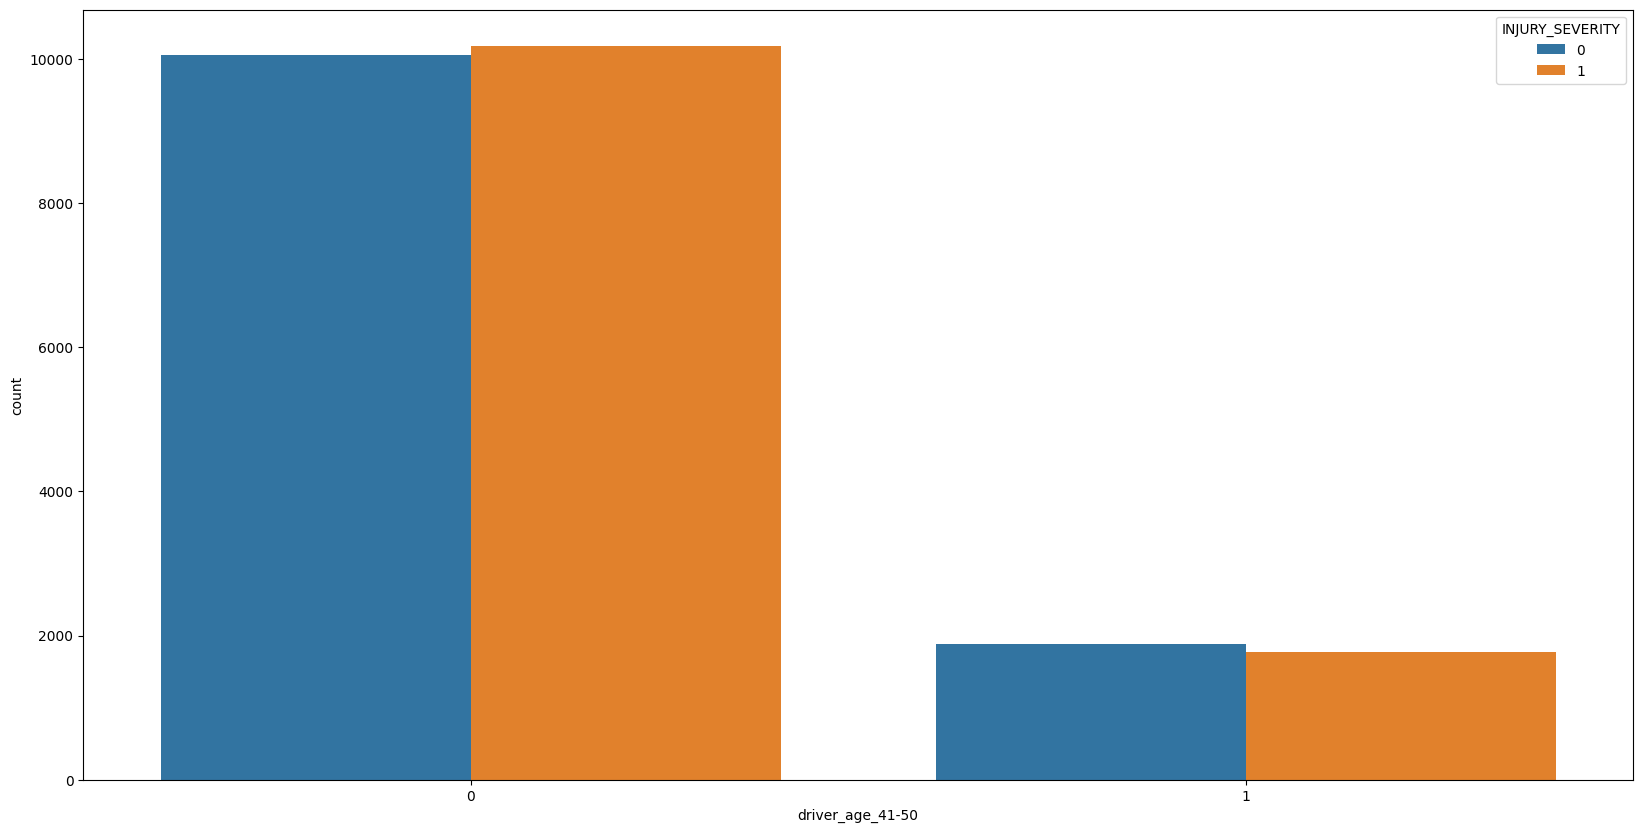

<Figure size 640x480 with 0 Axes>

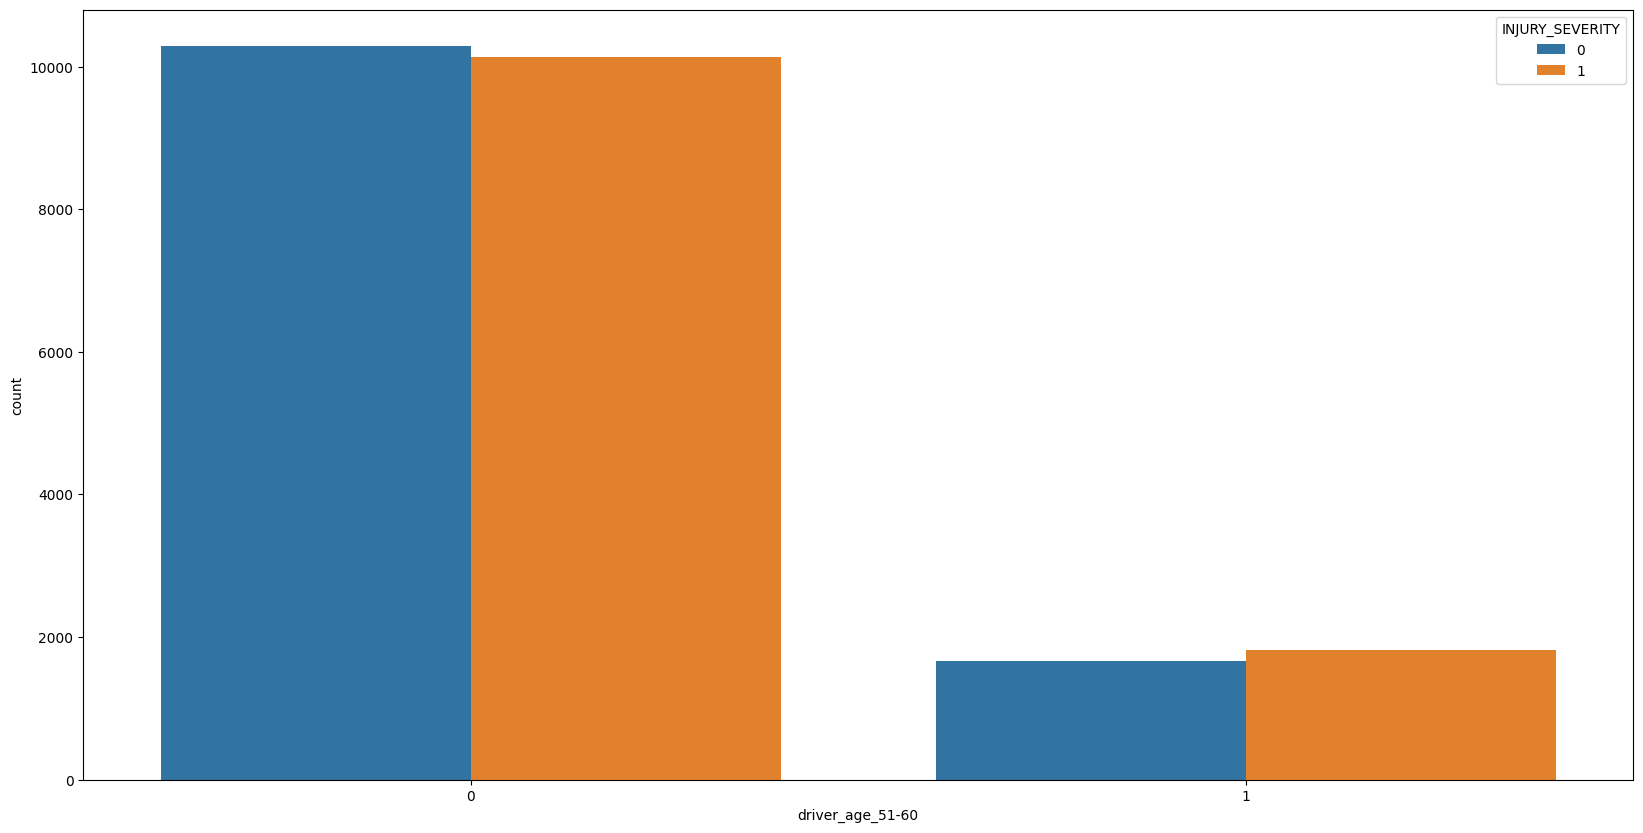

<Figure size 640x480 with 0 Axes>

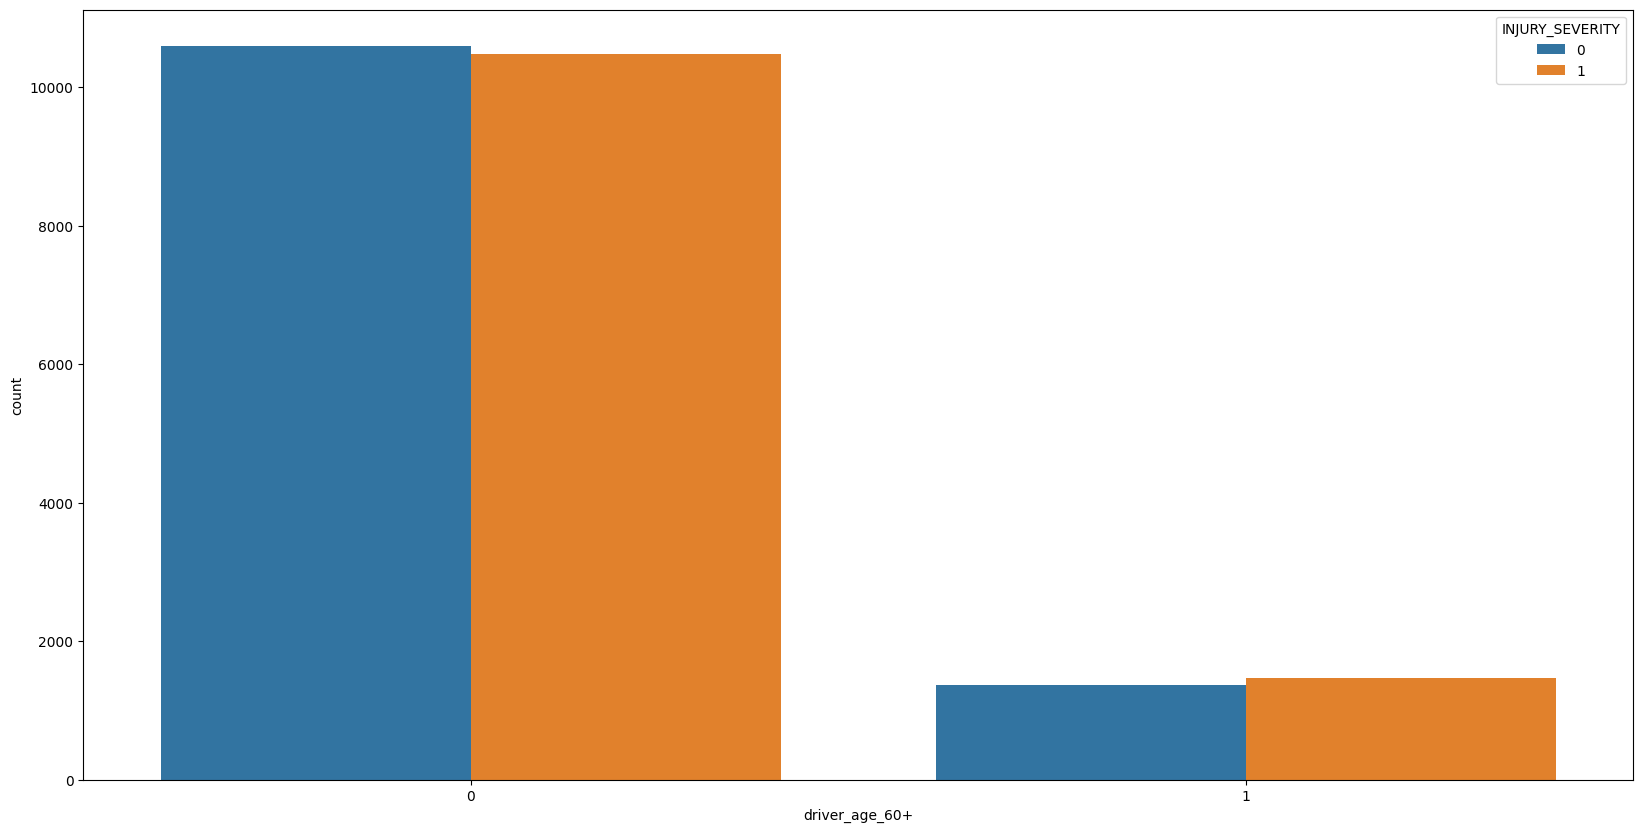

<Figure size 640x480 with 0 Axes>

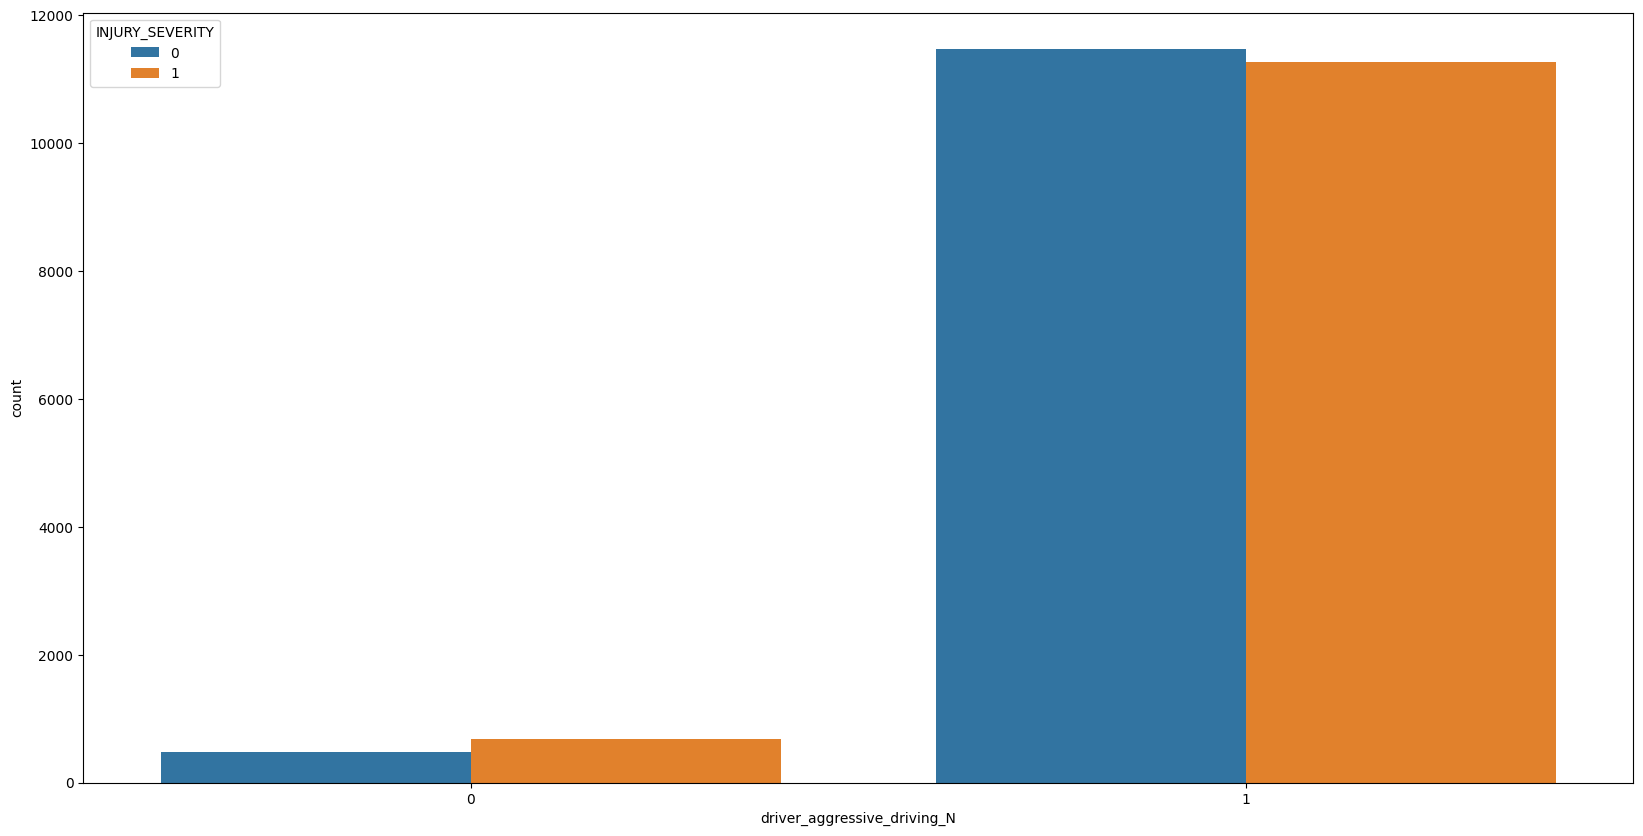

<Figure size 640x480 with 0 Axes>

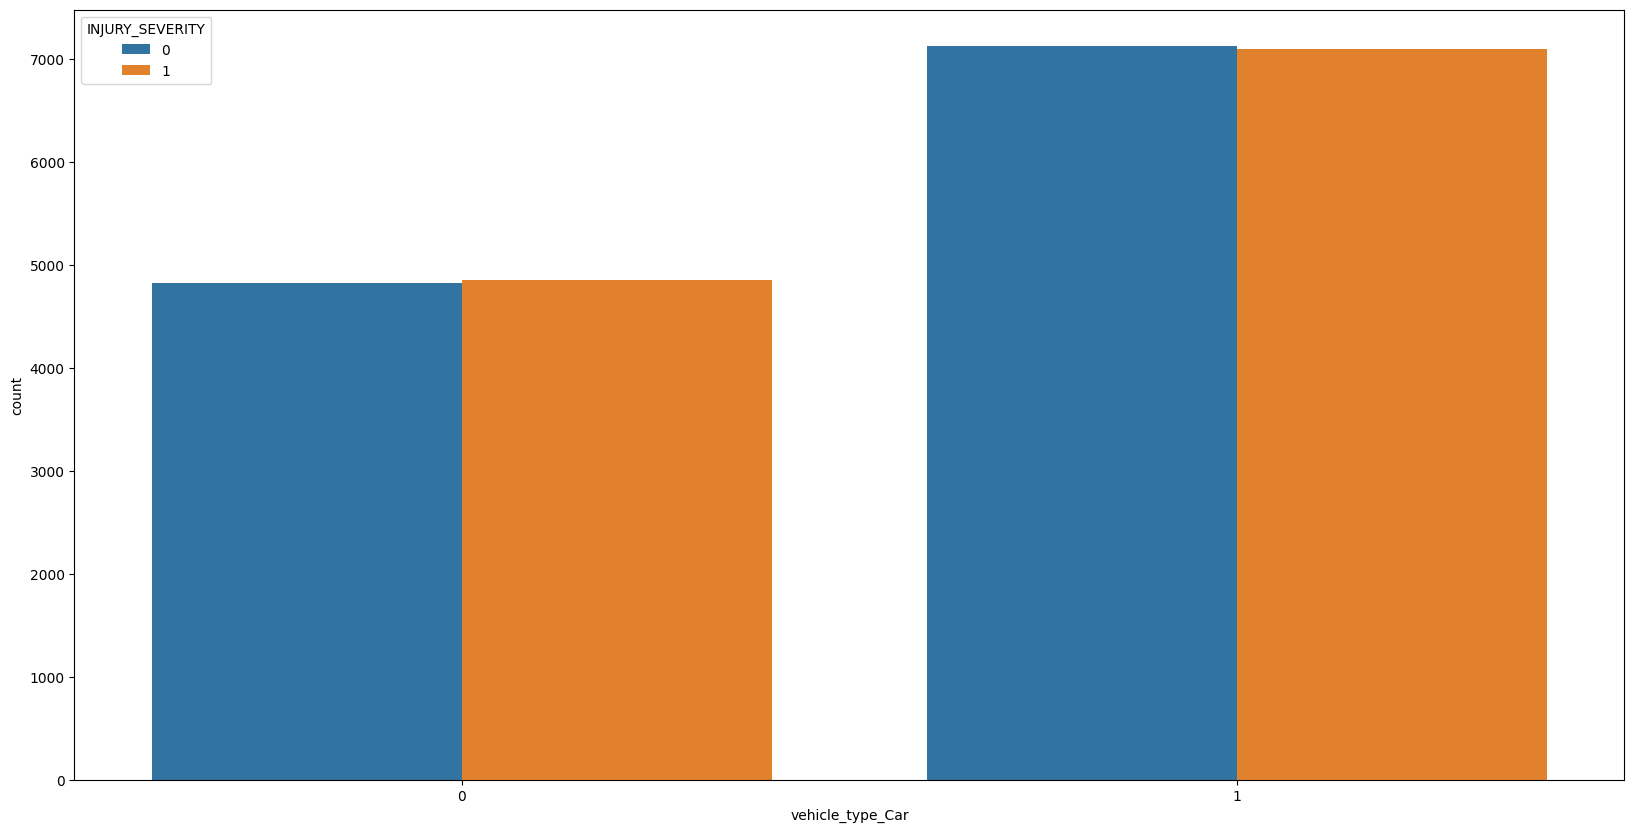

<Figure size 640x480 with 0 Axes>

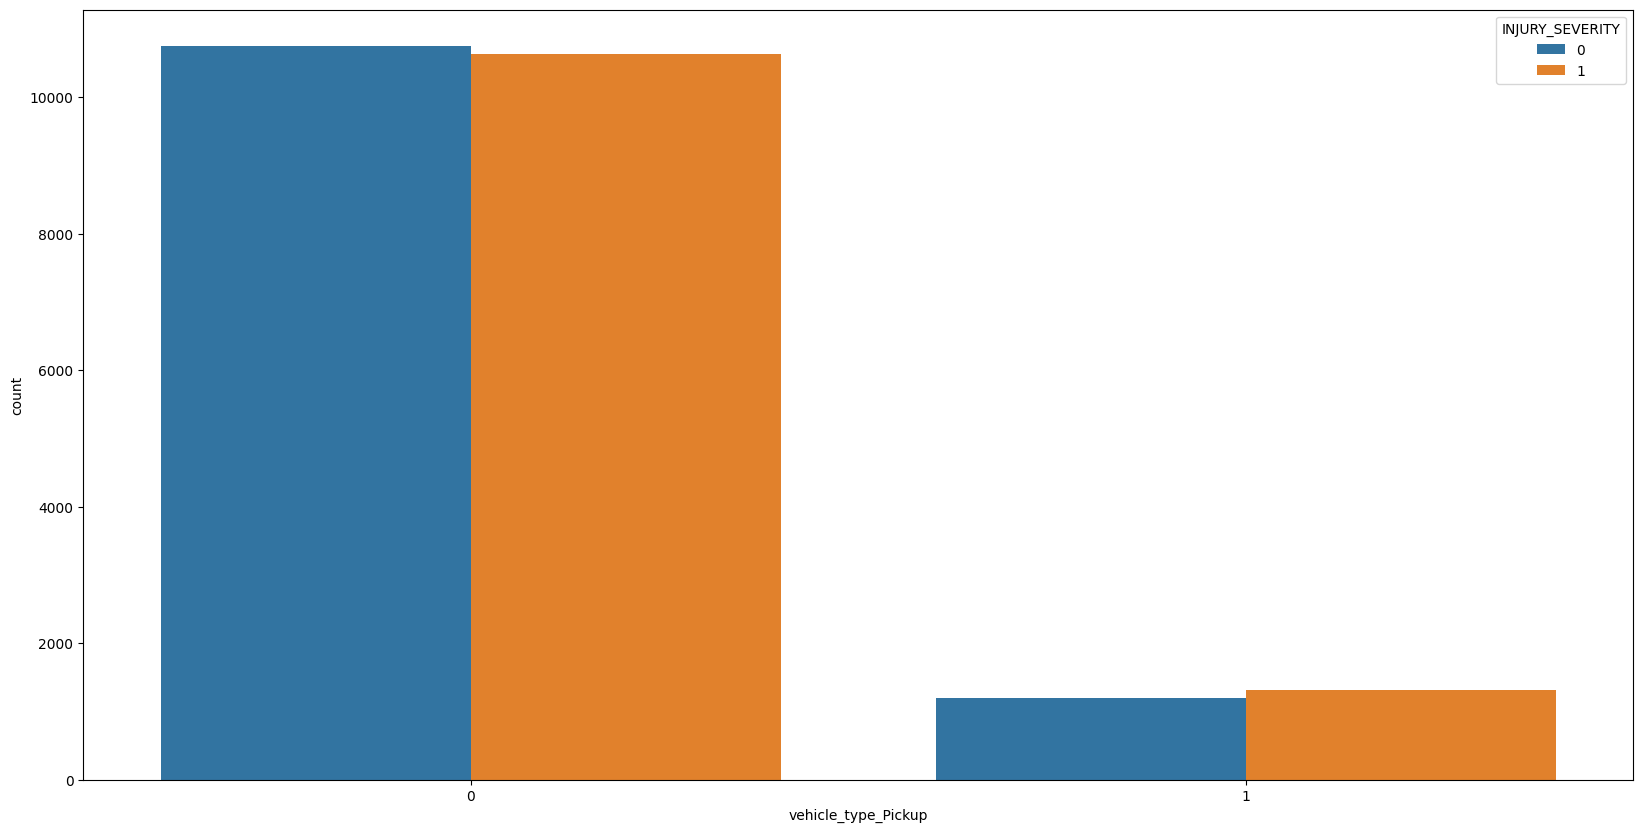

<Figure size 640x480 with 0 Axes>

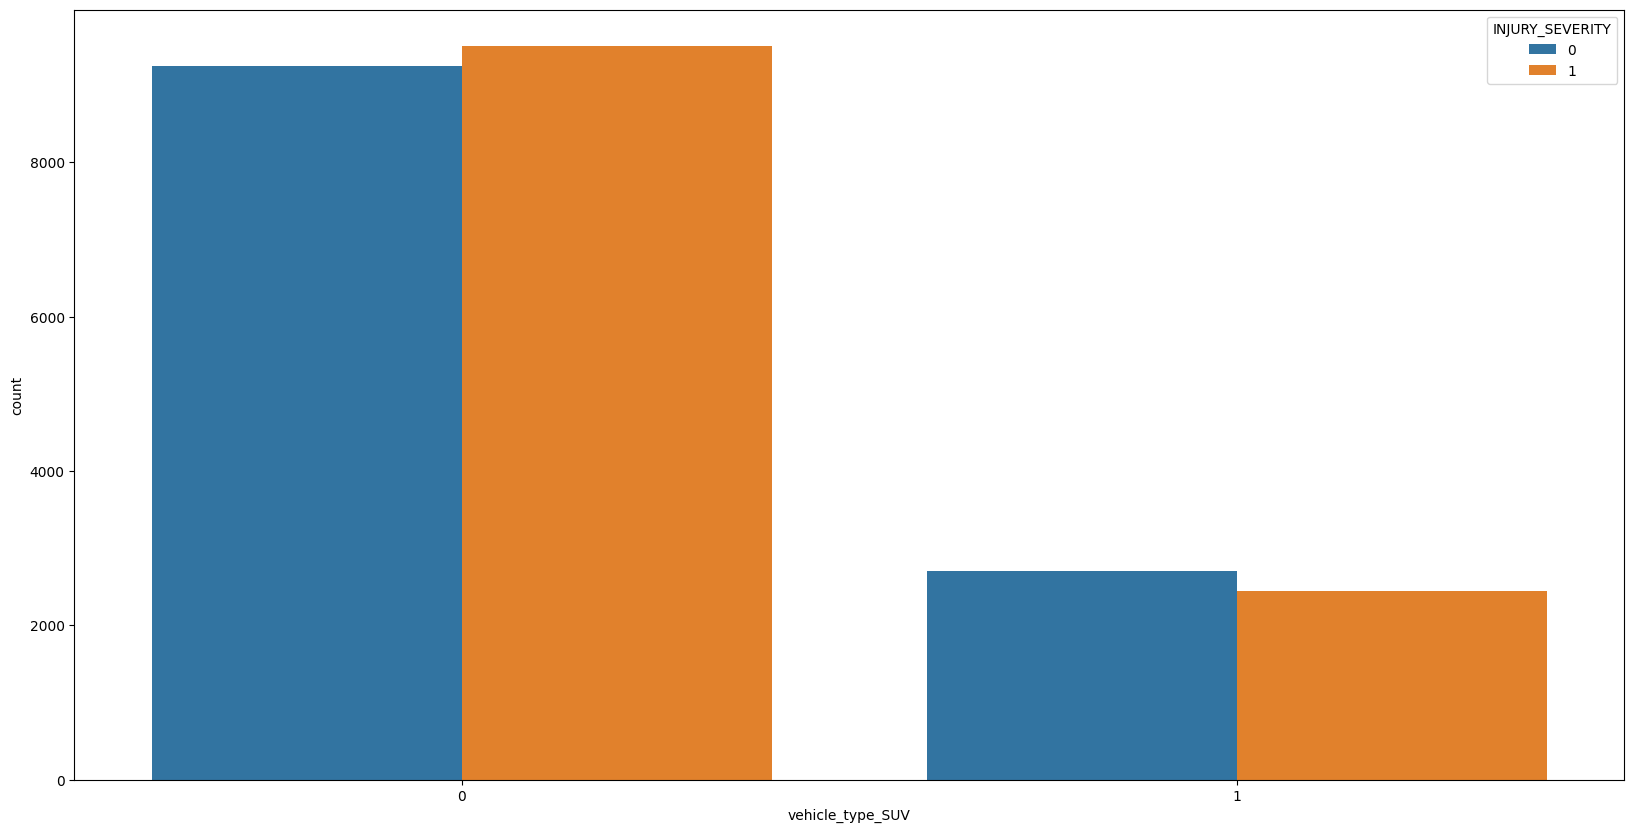

<Figure size 640x480 with 0 Axes>

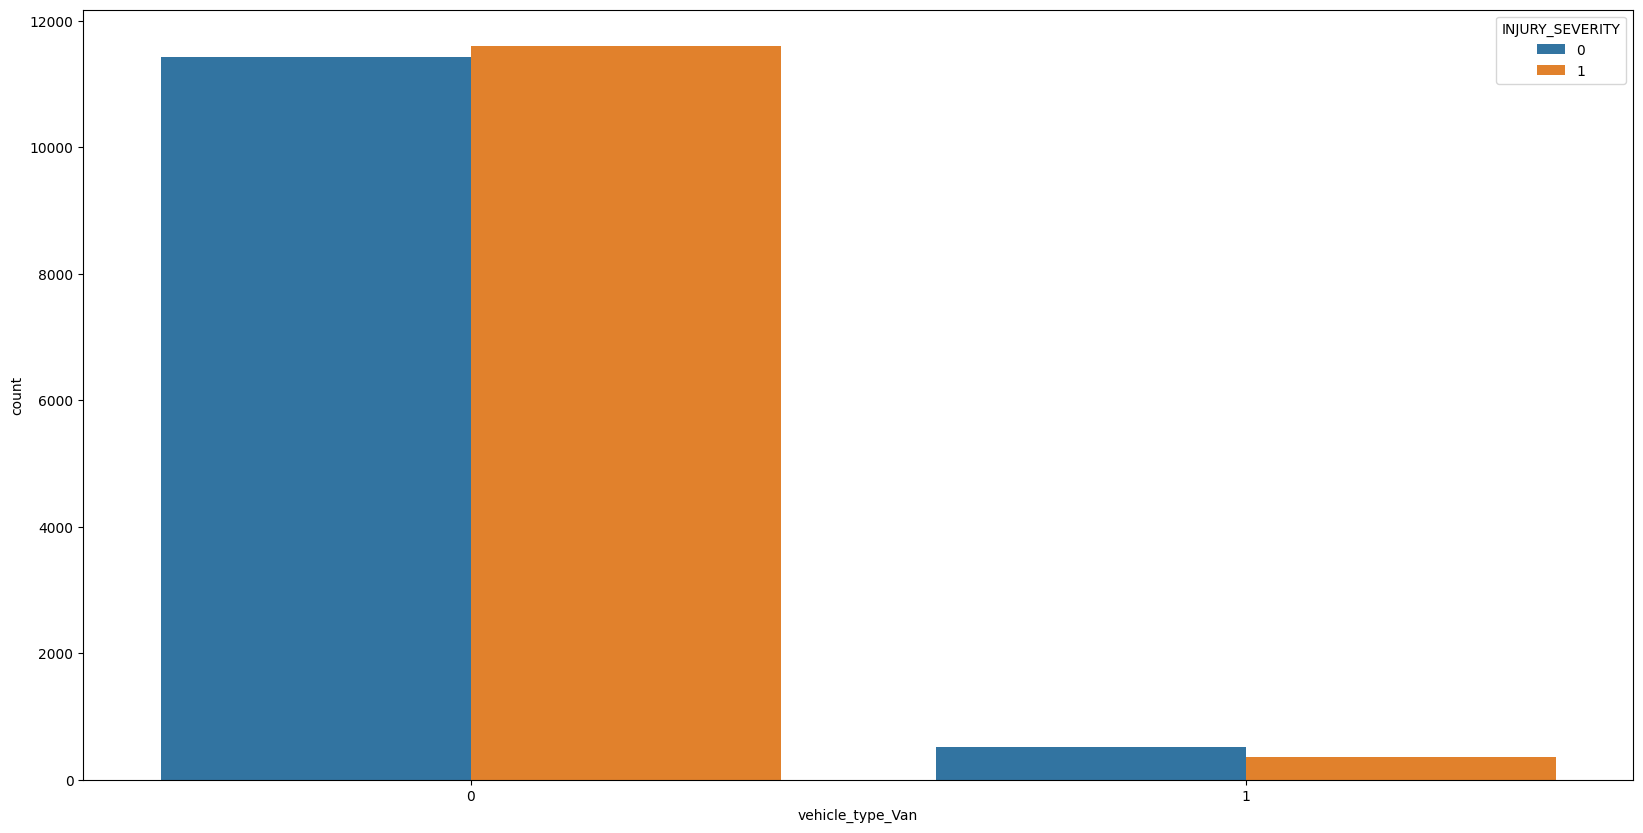

<Figure size 640x480 with 0 Axes>

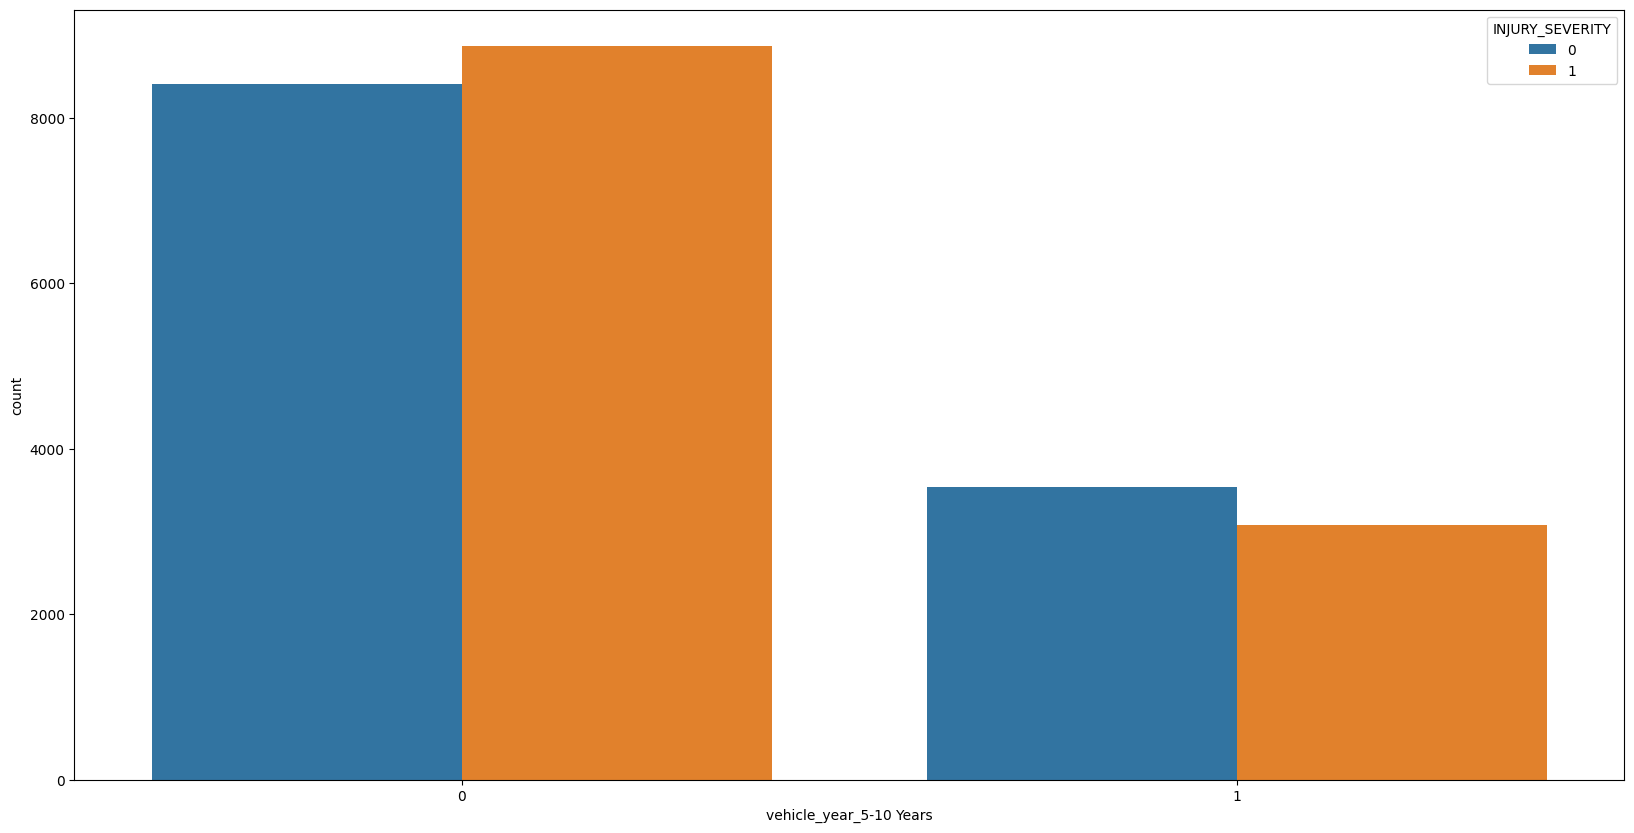

<Figure size 640x480 with 0 Axes>

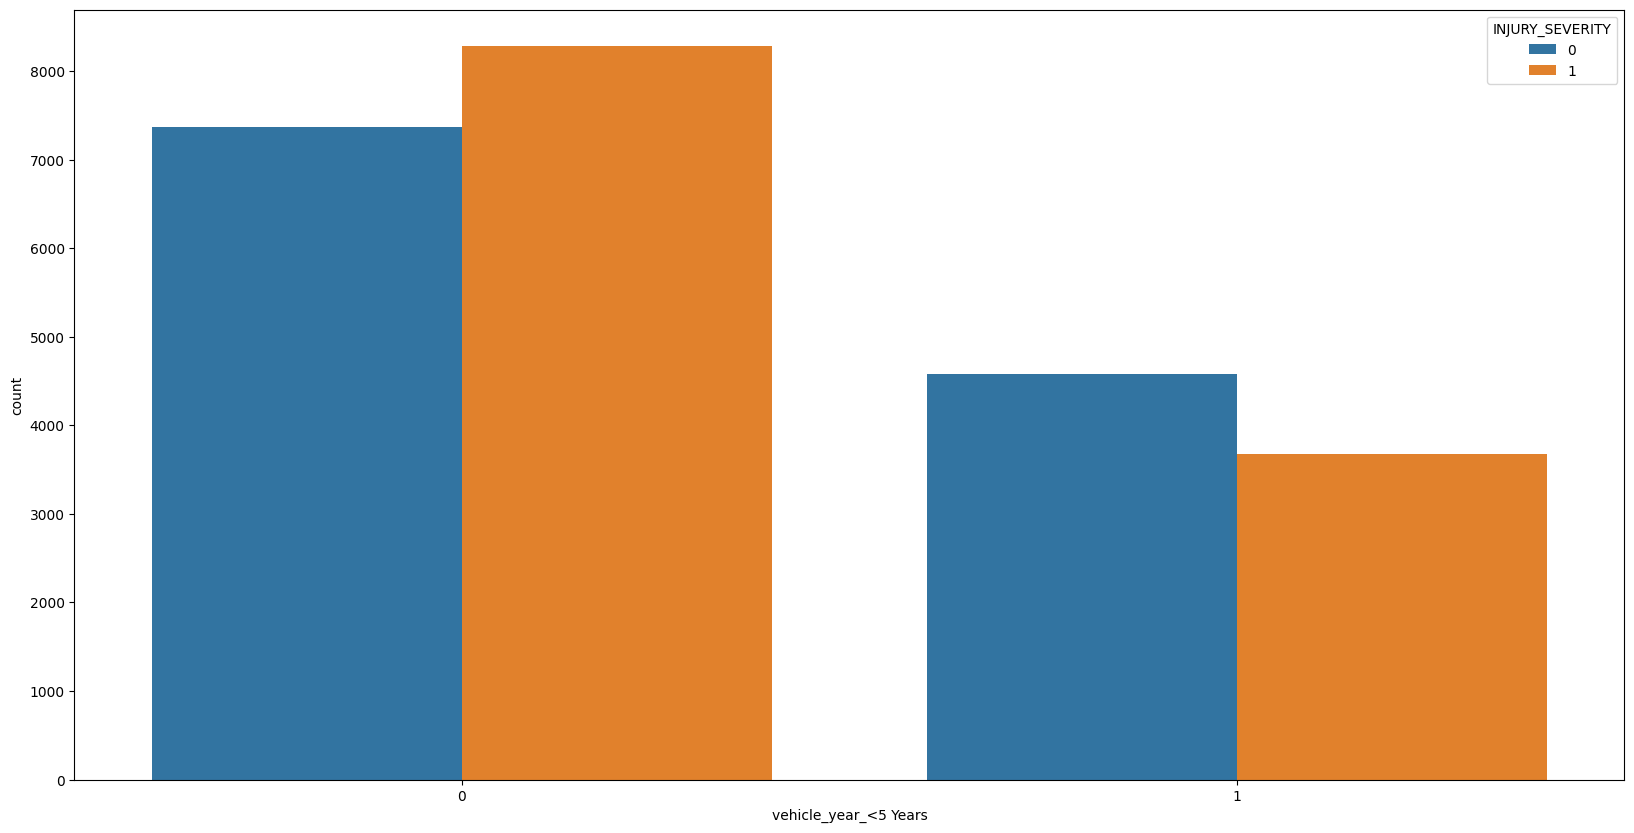

<Figure size 640x480 with 0 Axes>

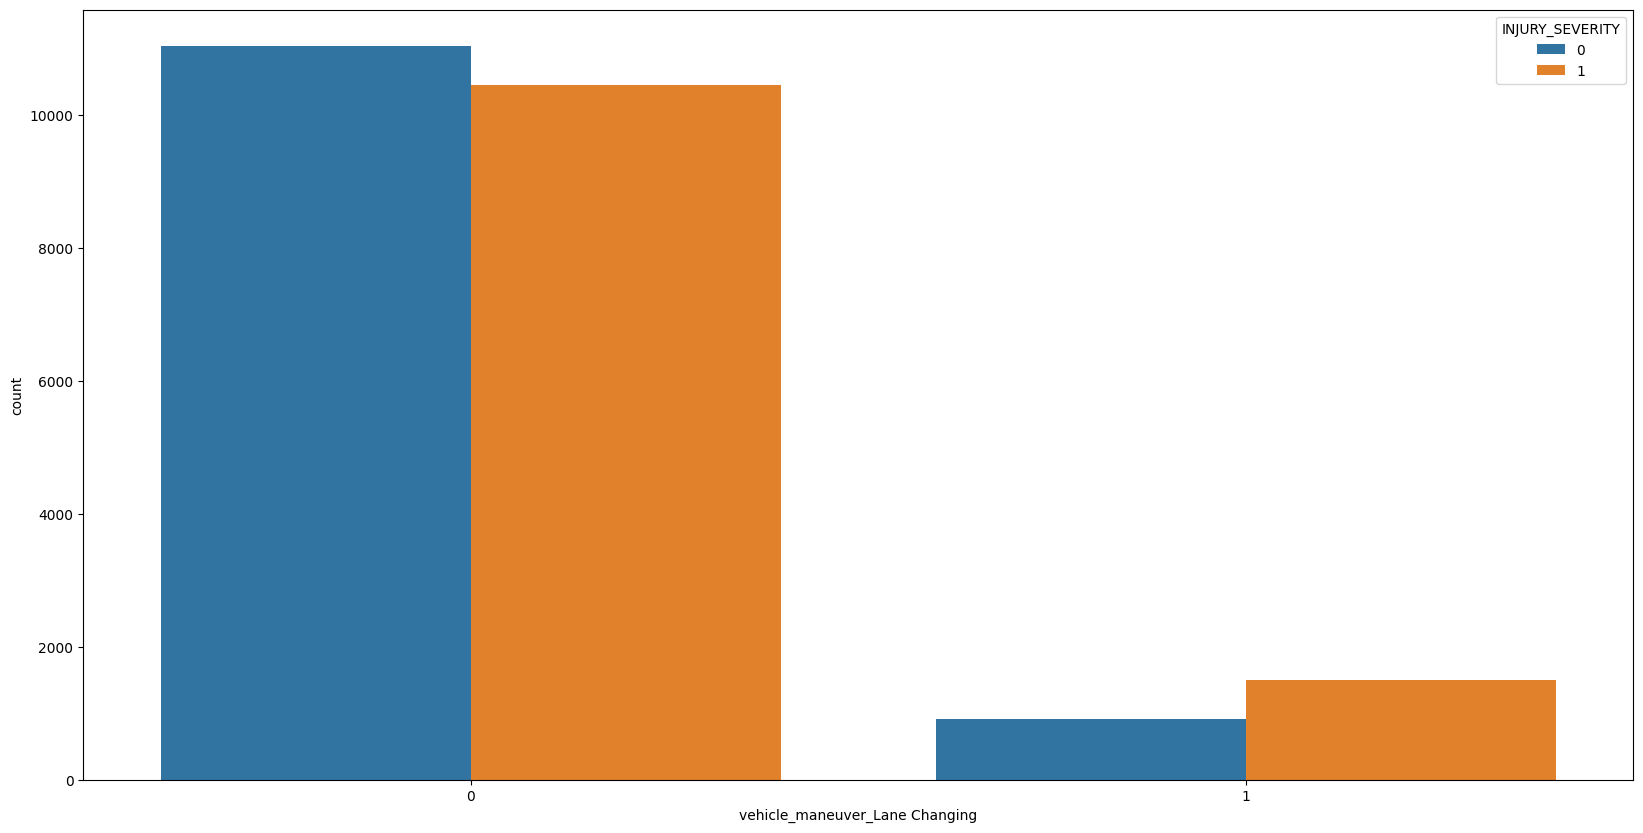

<Figure size 640x480 with 0 Axes>

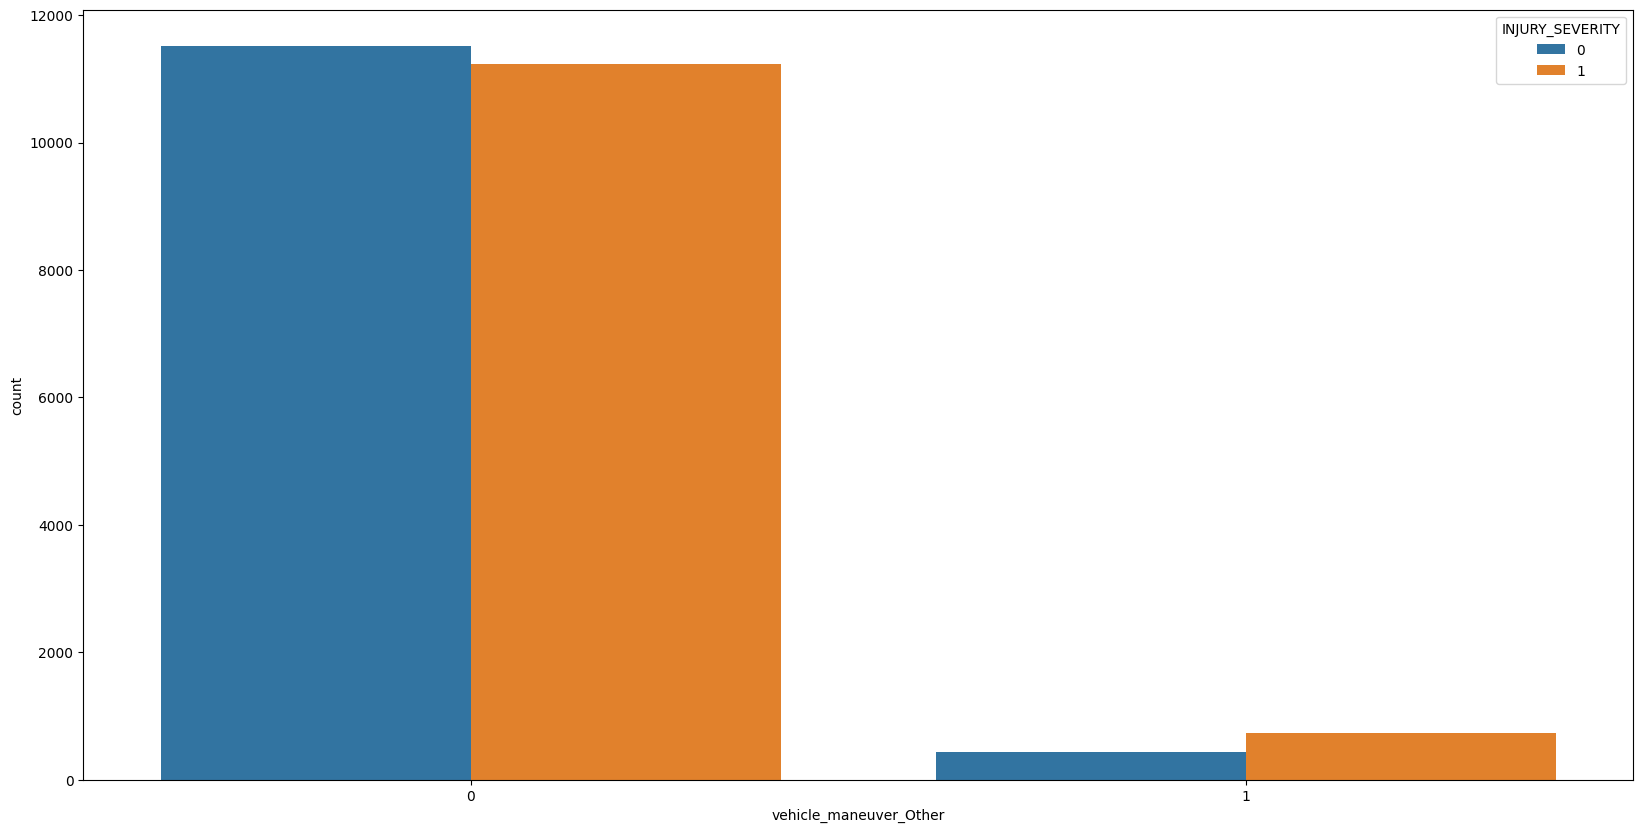

<Figure size 640x480 with 0 Axes>

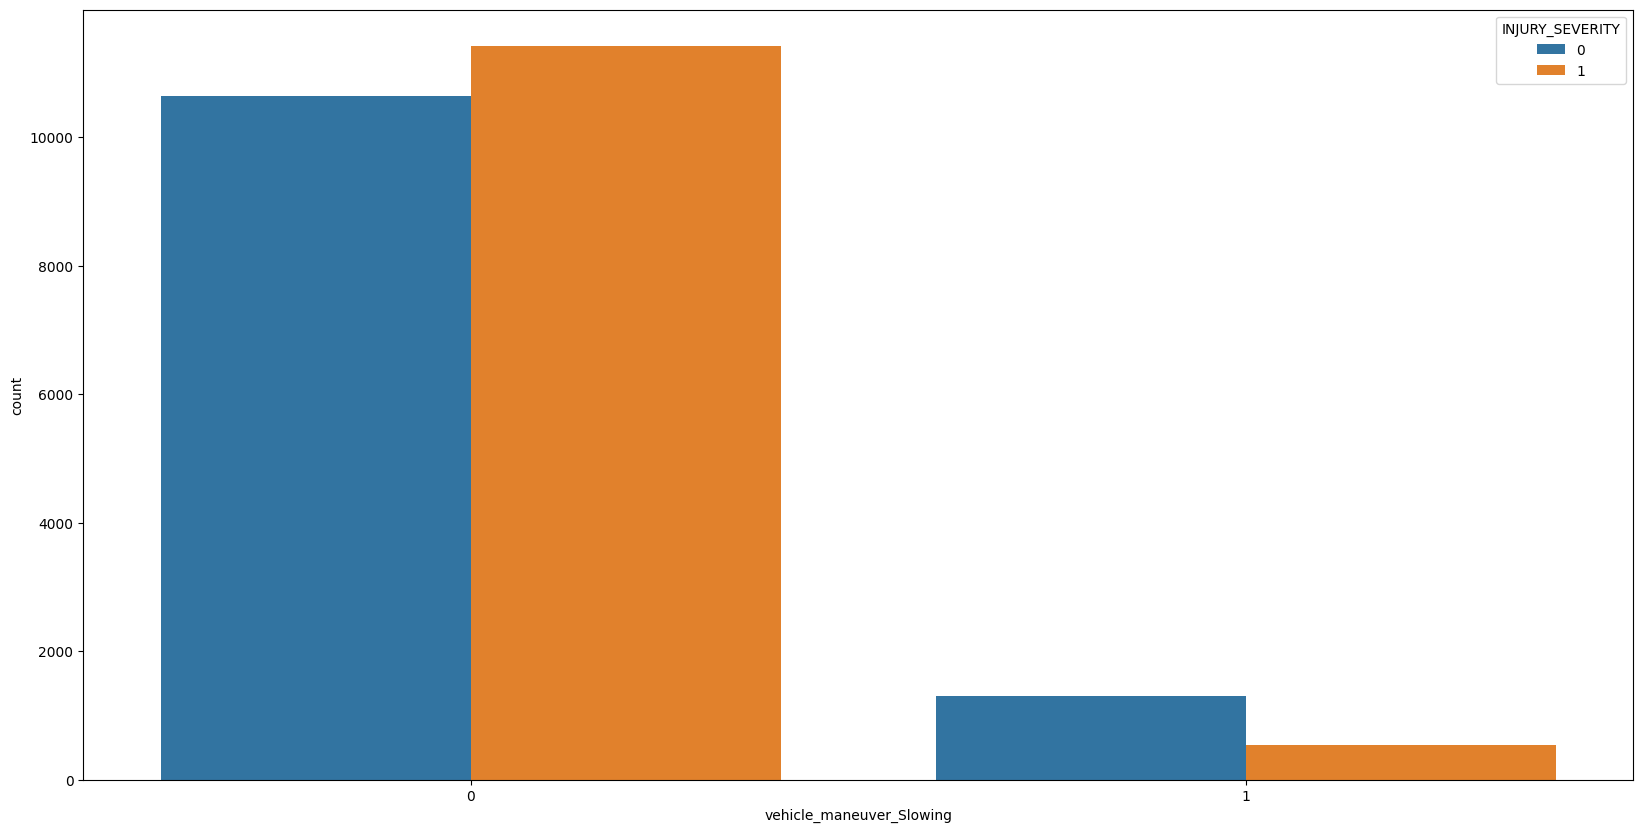

<Figure size 640x480 with 0 Axes>

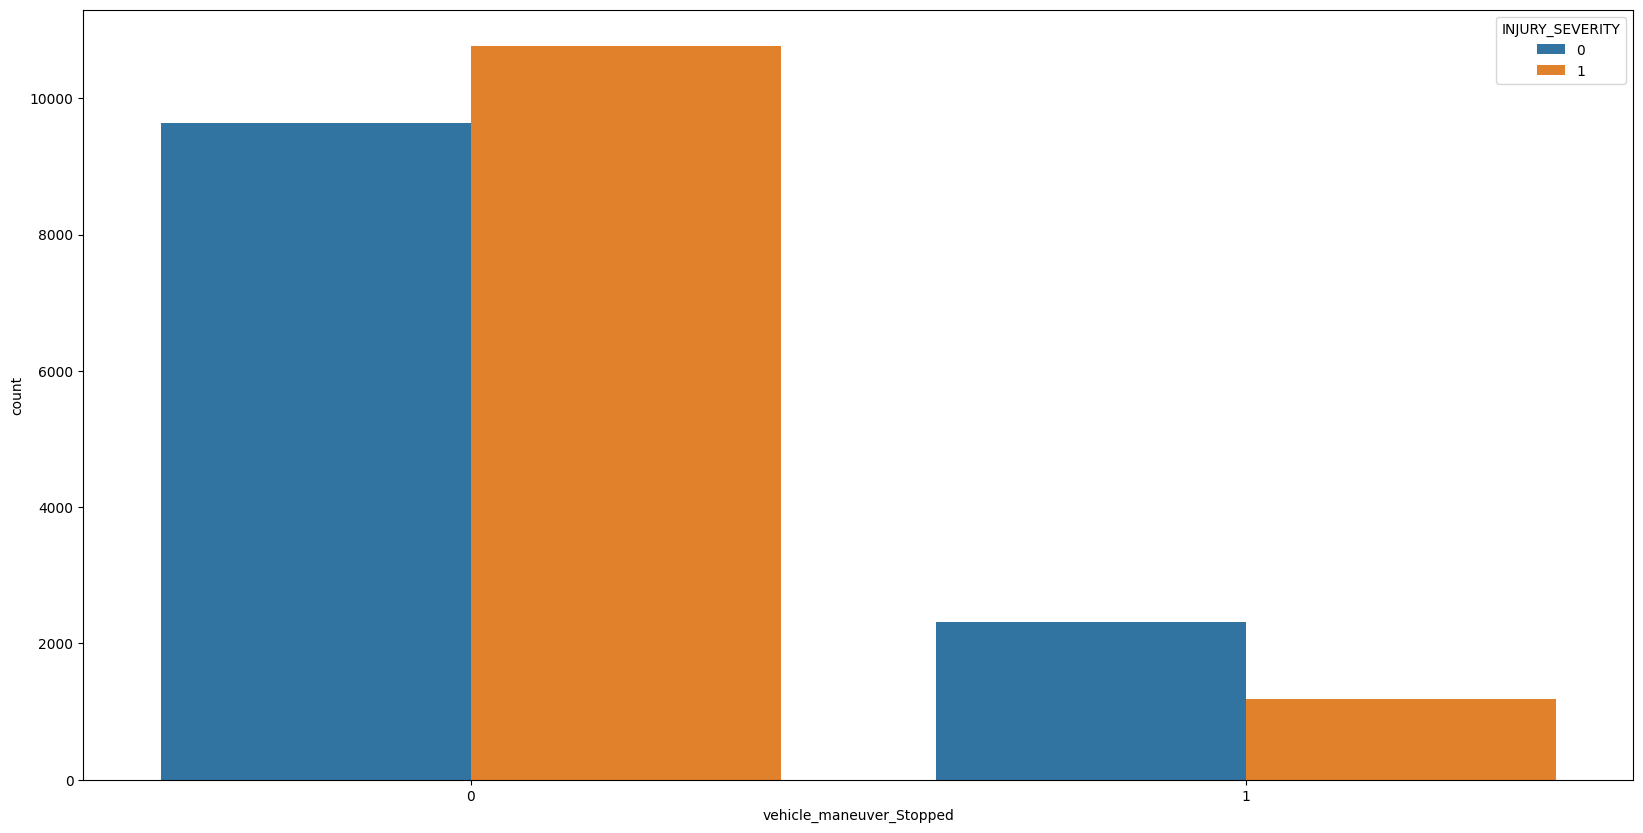

<Figure size 640x480 with 0 Axes>

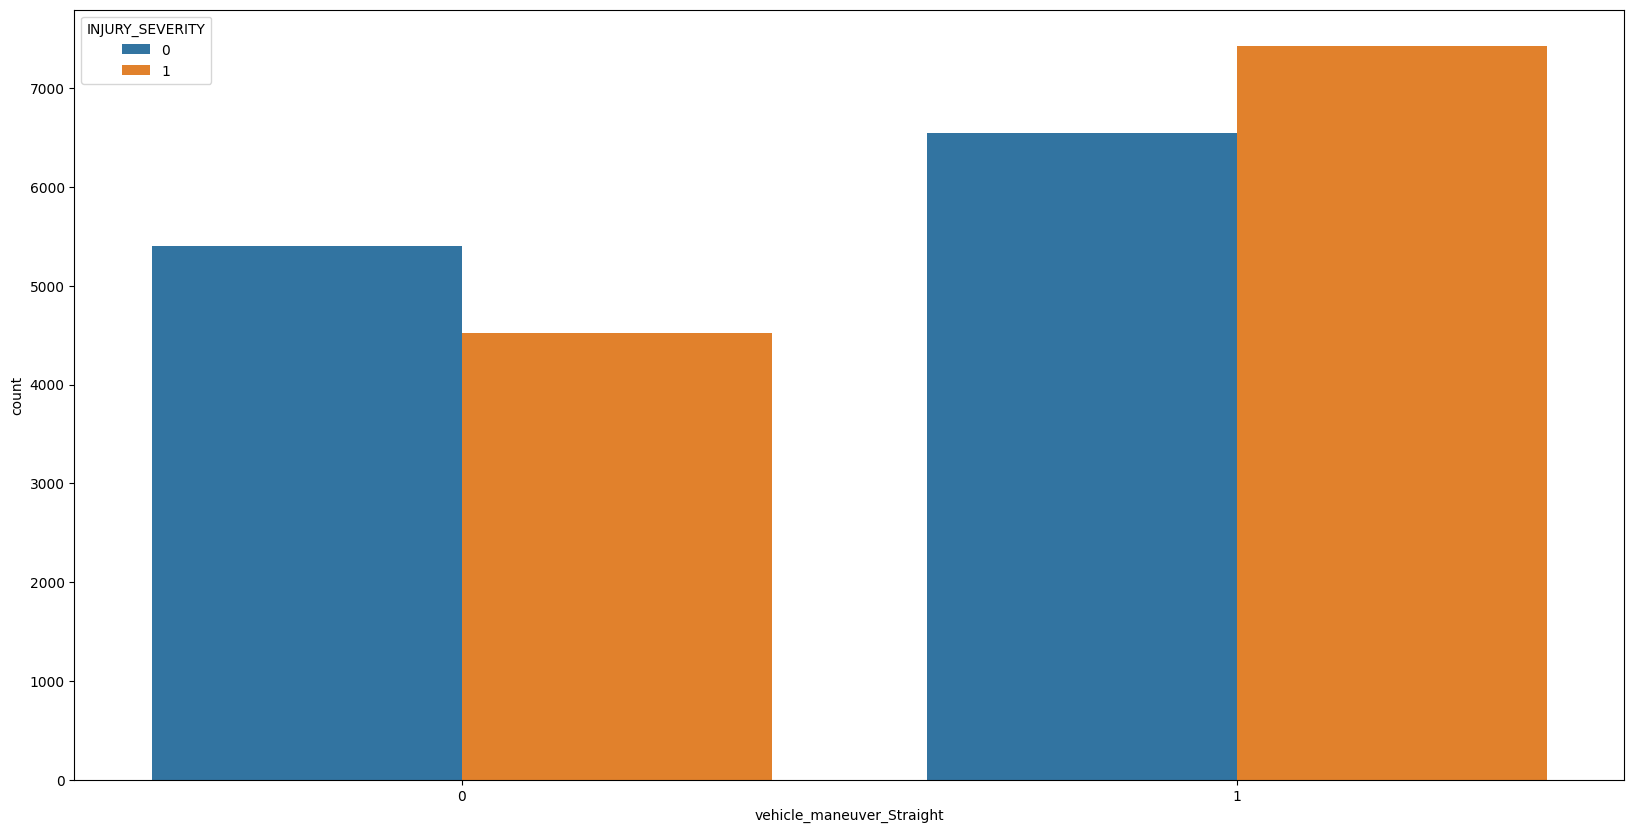

<Figure size 640x480 with 0 Axes>

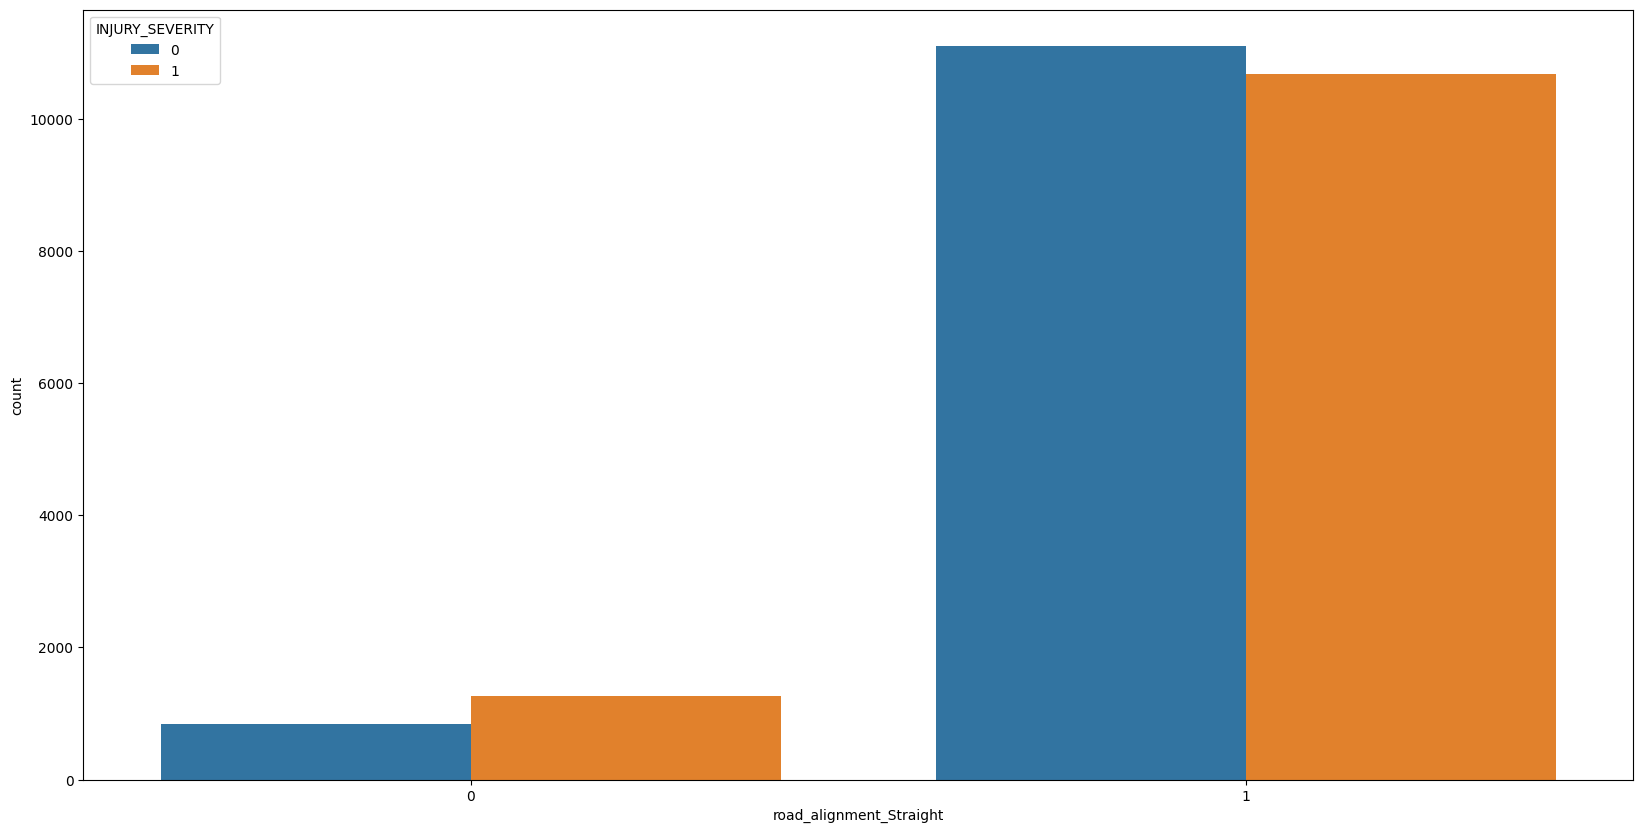

<Figure size 640x480 with 0 Axes>

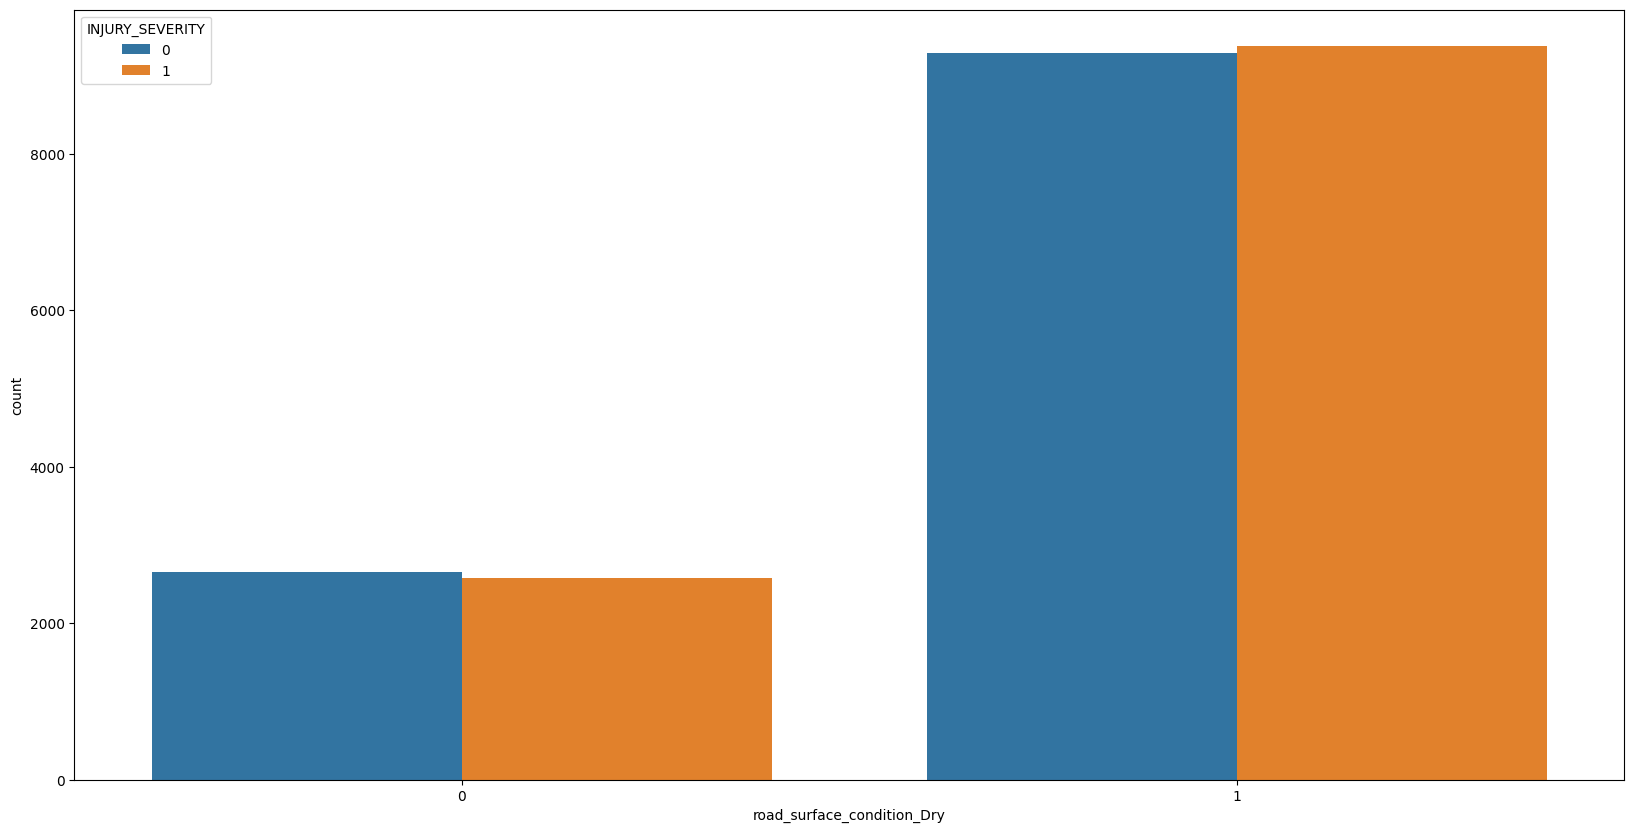

<Figure size 640x480 with 0 Axes>

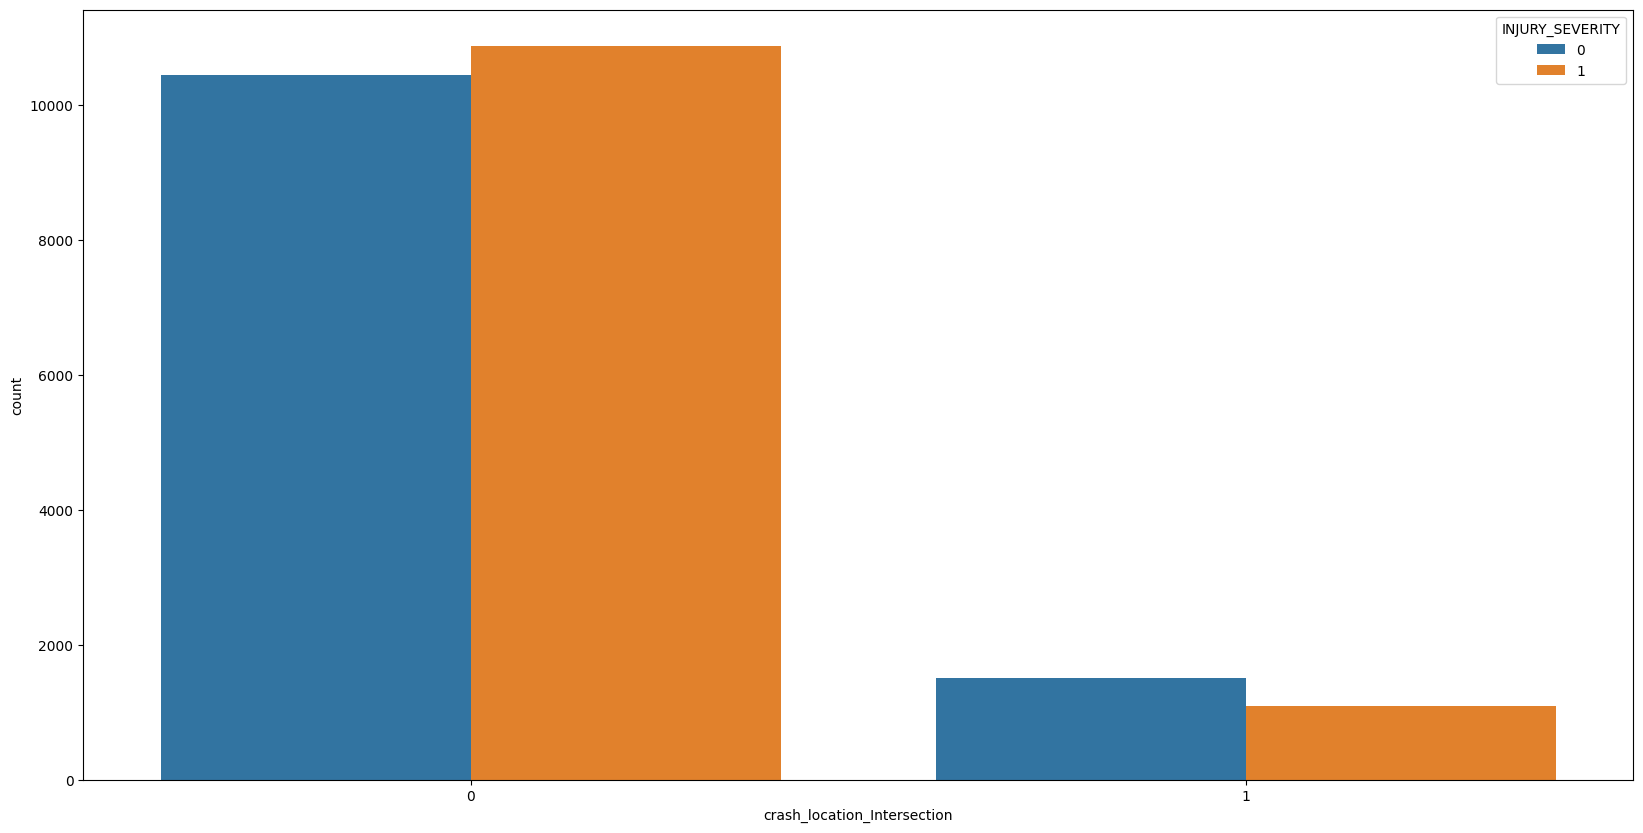

<Figure size 640x480 with 0 Axes>

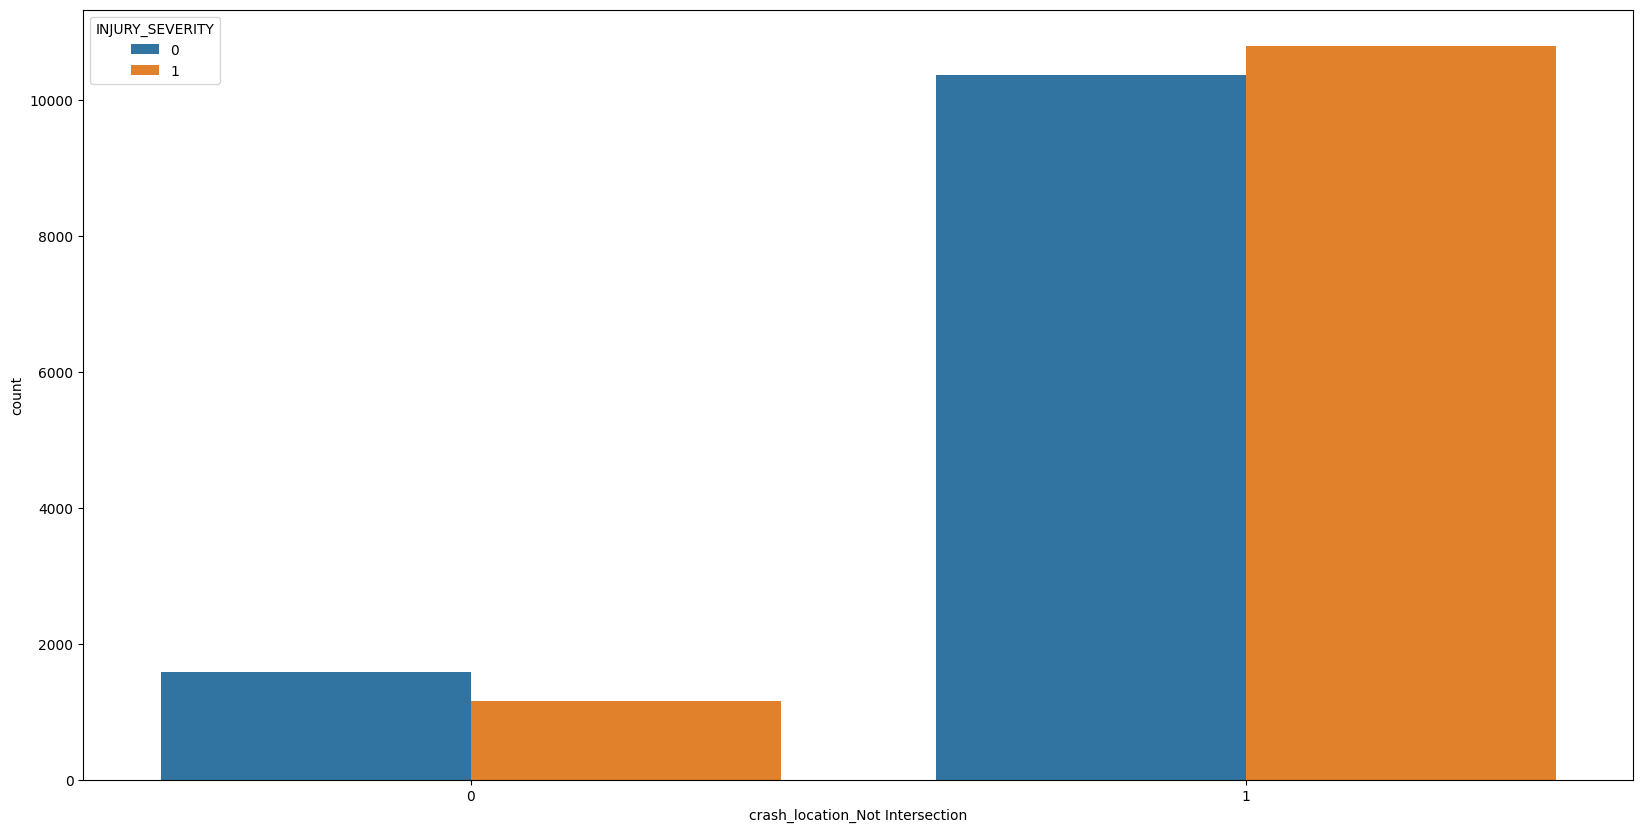

<Figure size 640x480 with 0 Axes>

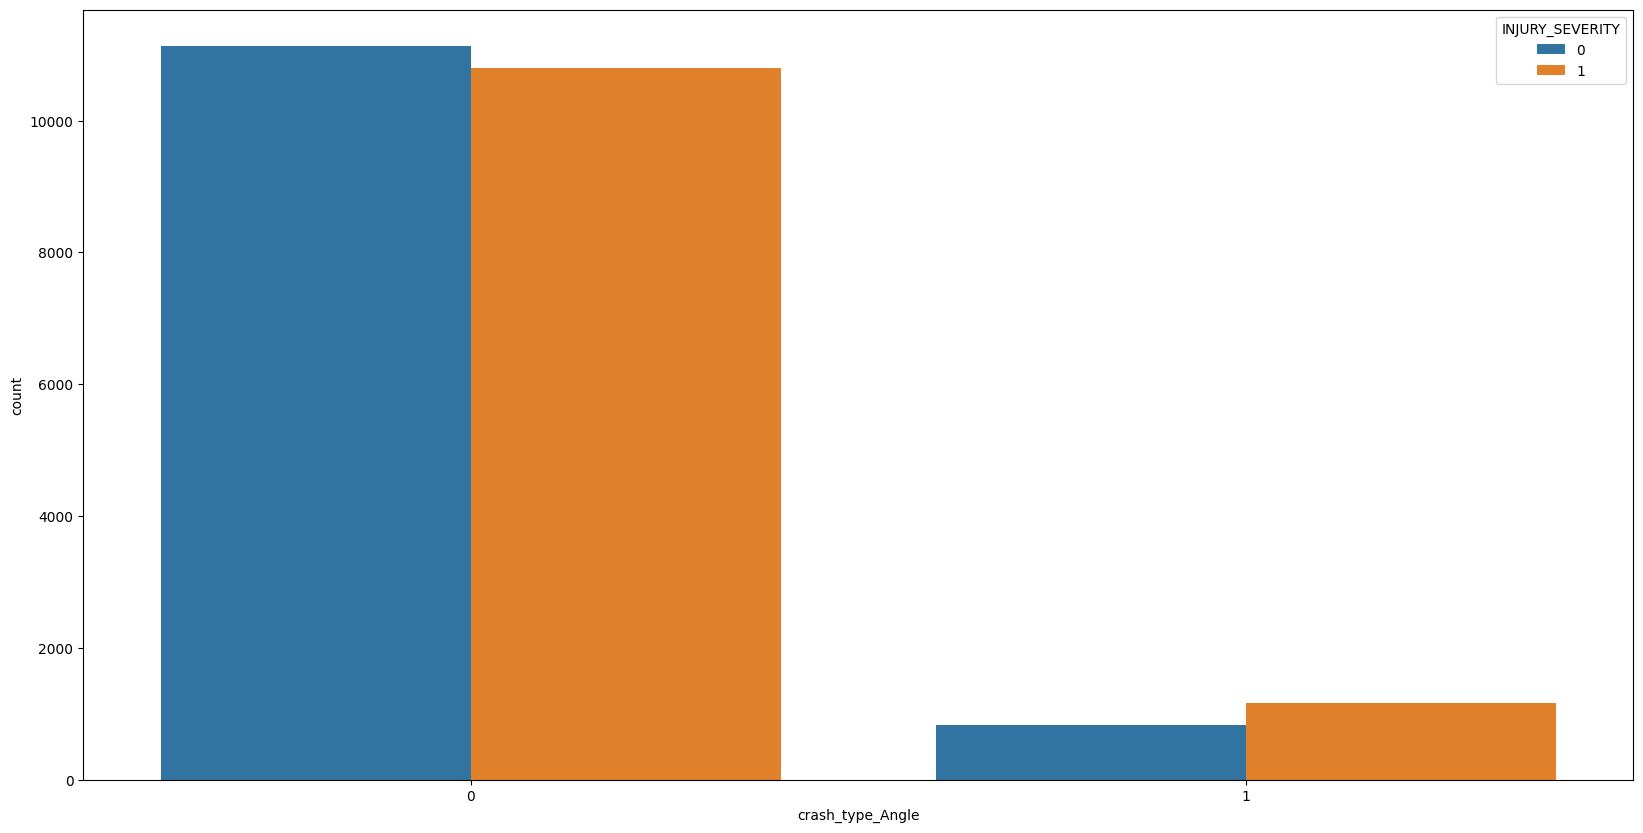

<Figure size 640x480 with 0 Axes>

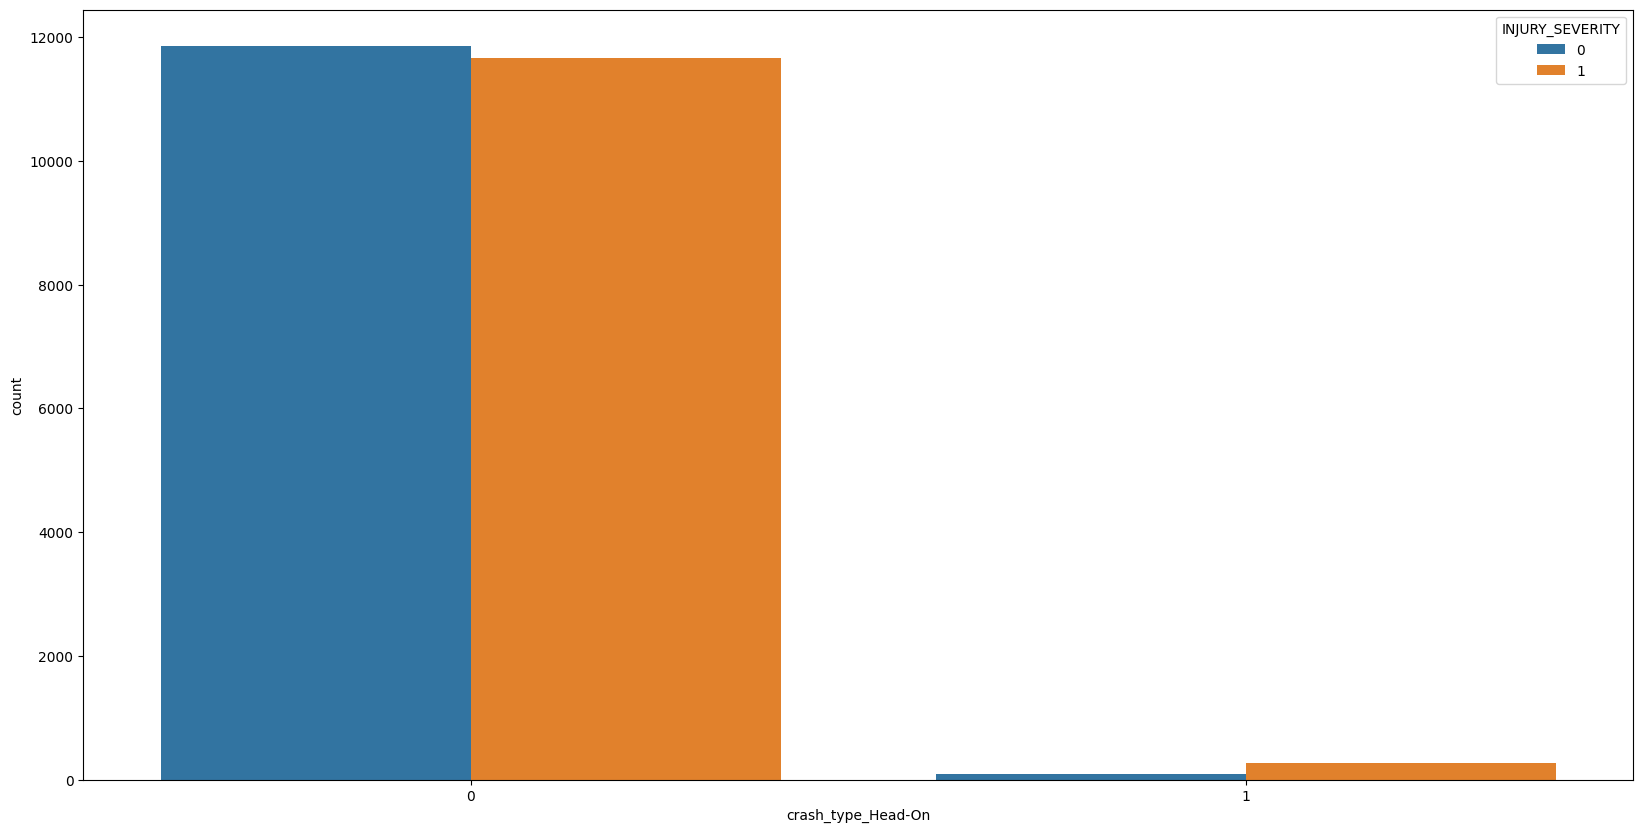

<Figure size 640x480 with 0 Axes>

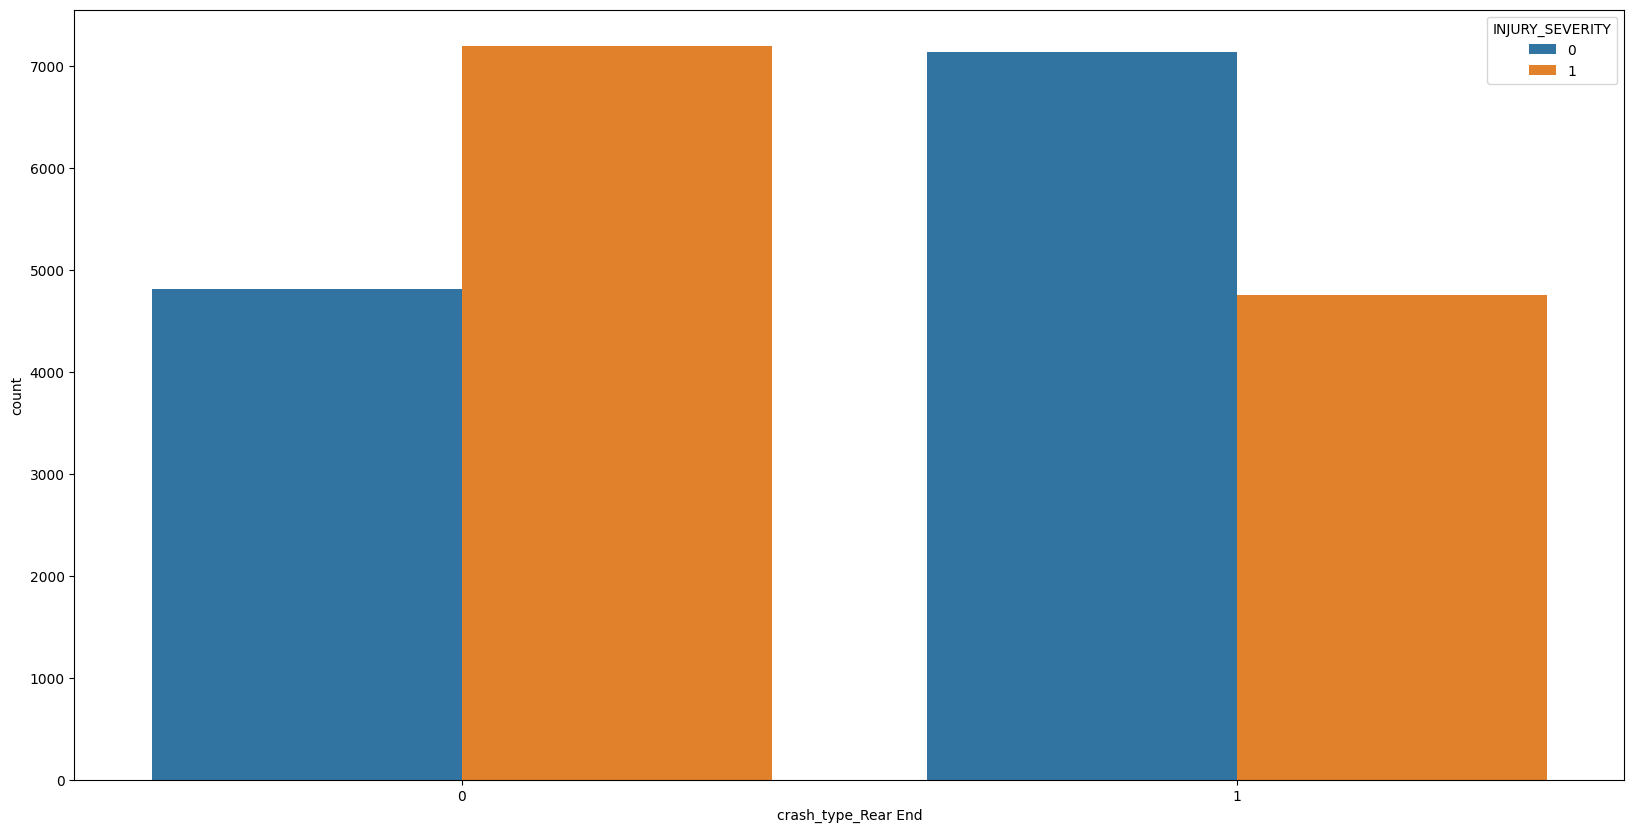

<Figure size 640x480 with 0 Axes>

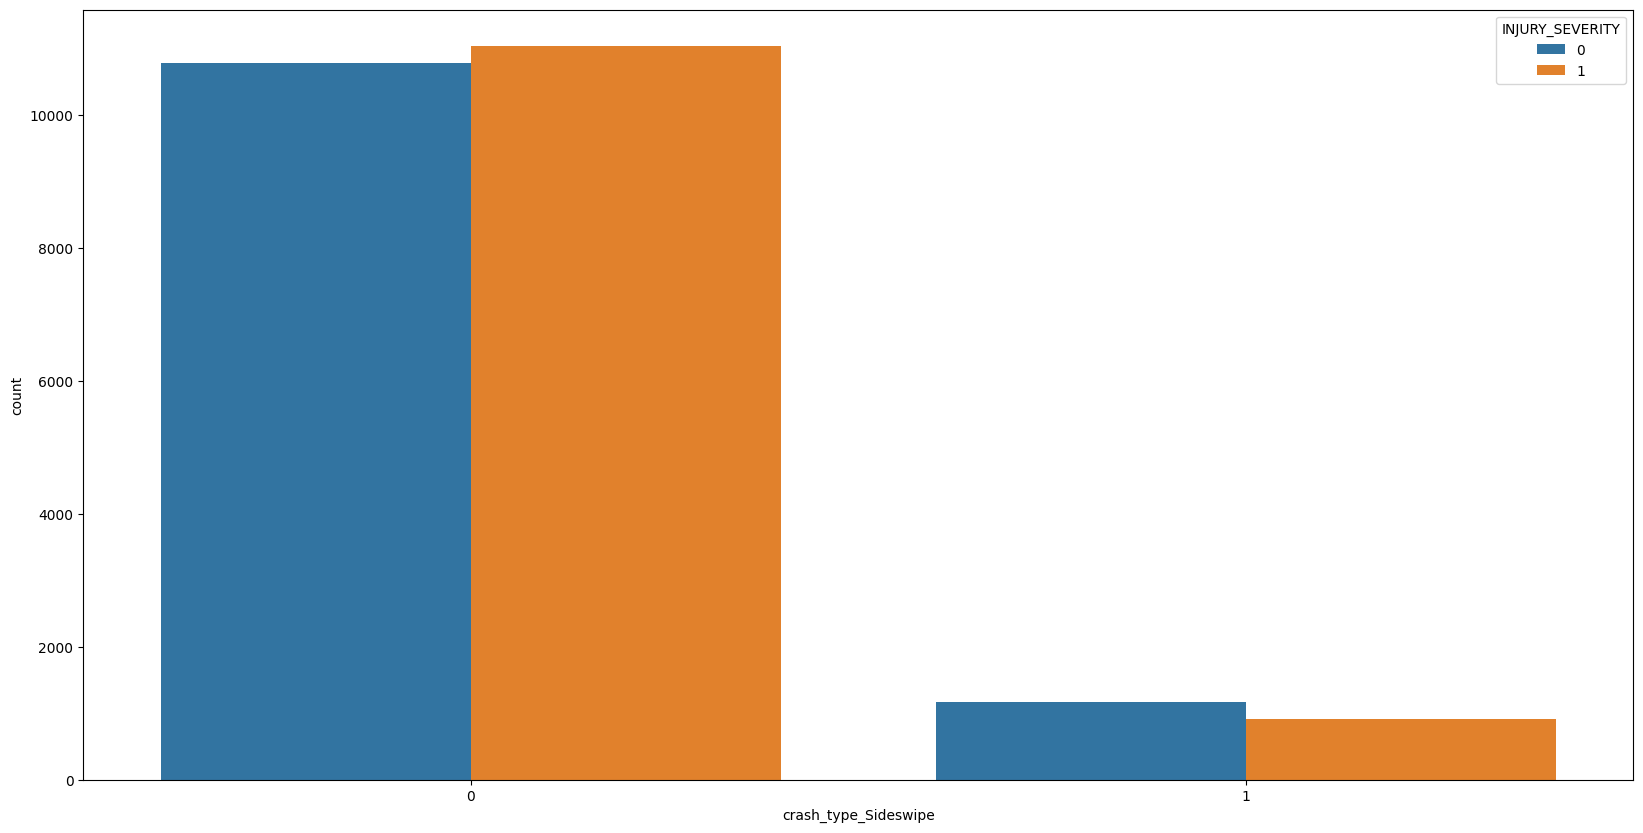

<Figure size 640x480 with 0 Axes>

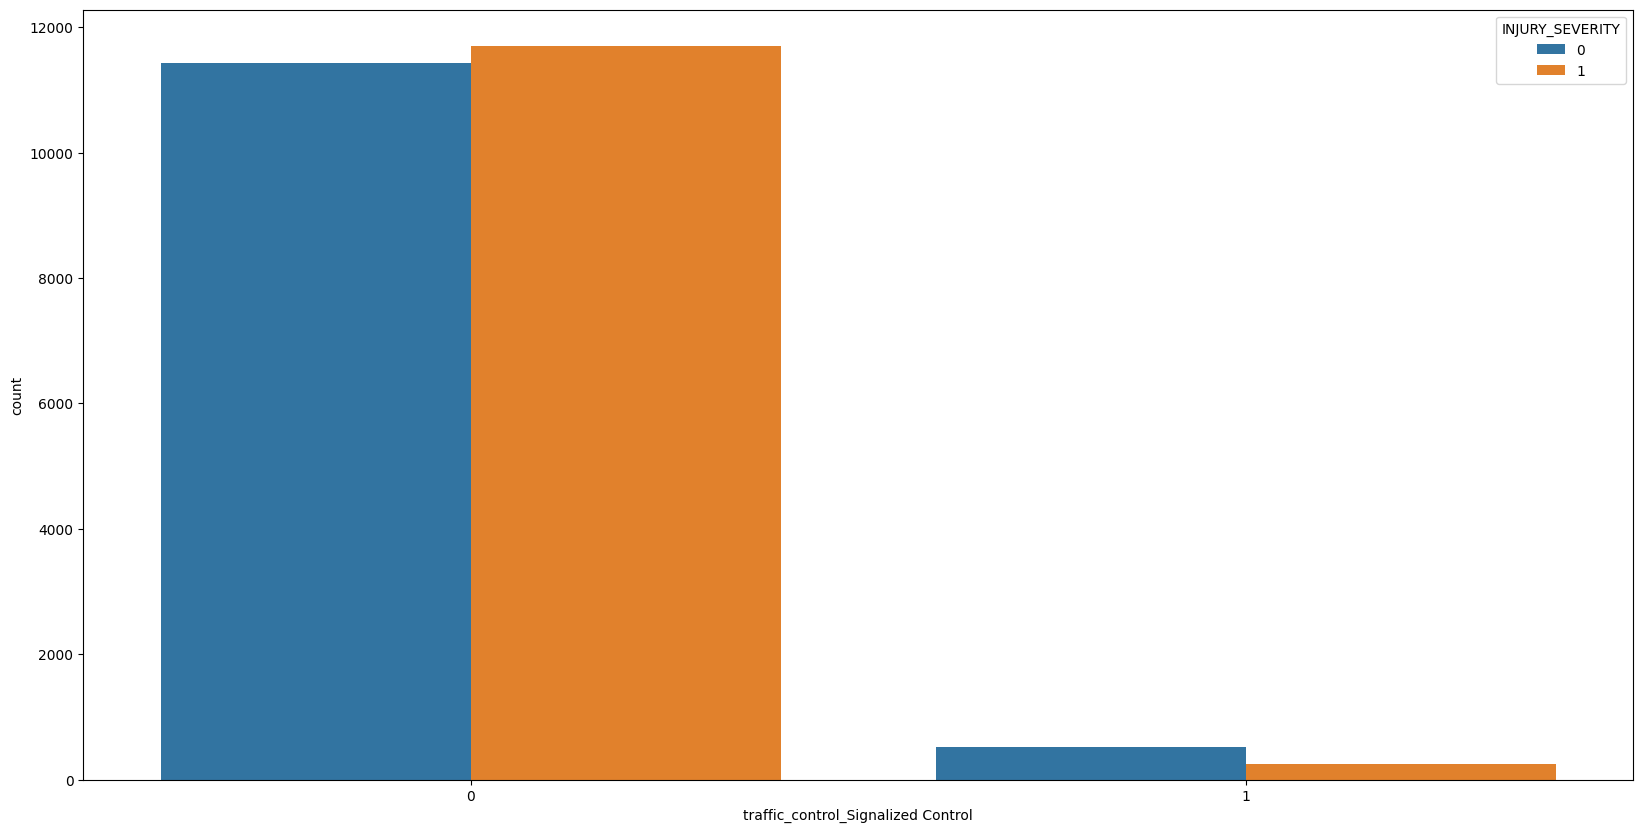

<Figure size 640x480 with 0 Axes>

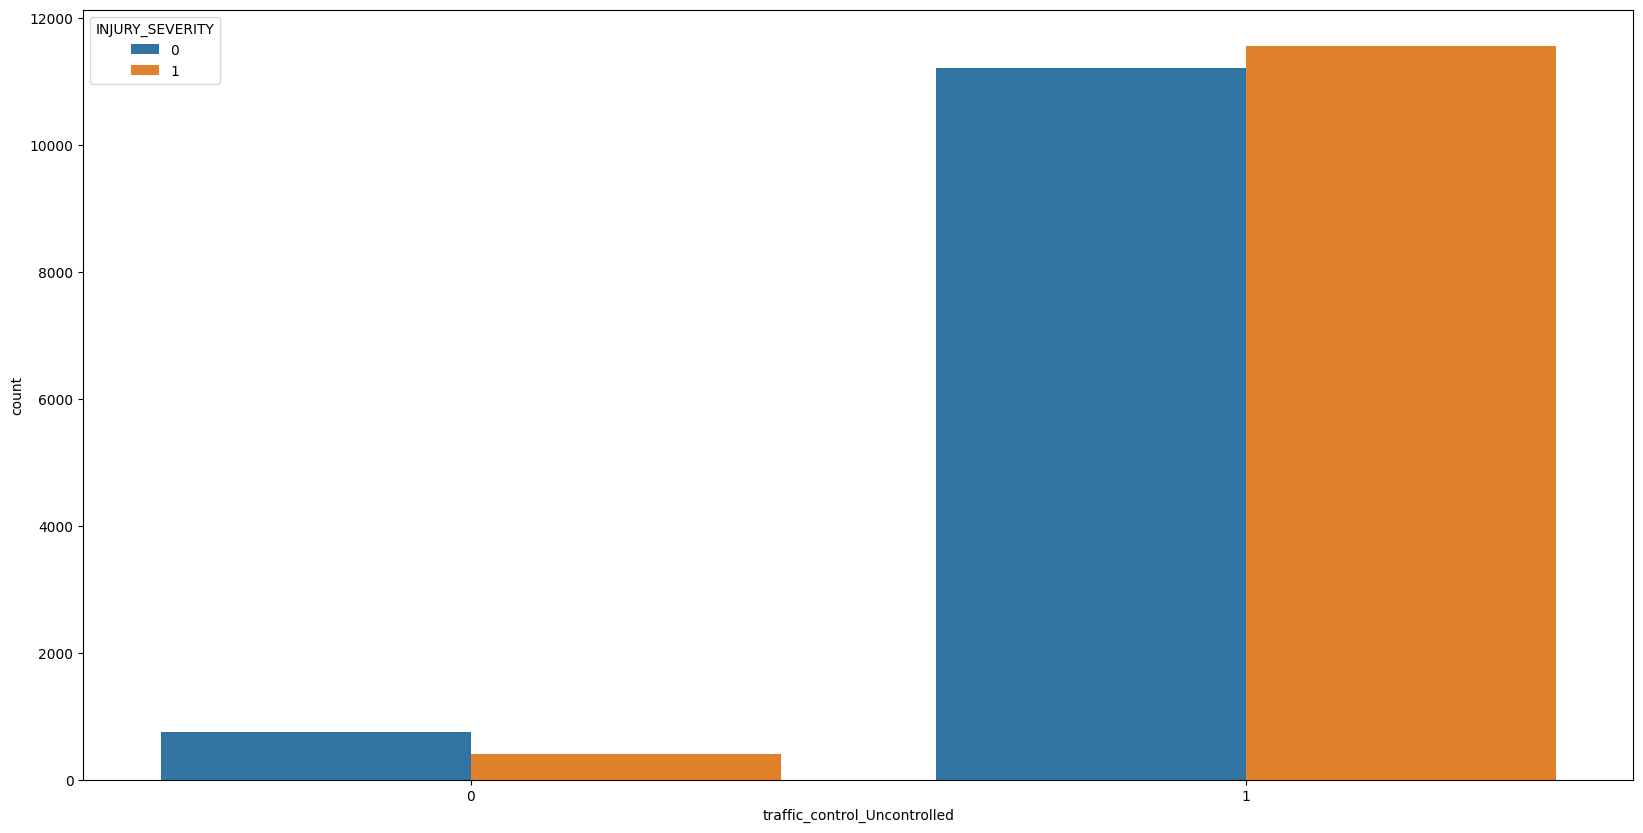

<Figure size 640x480 with 0 Axes>

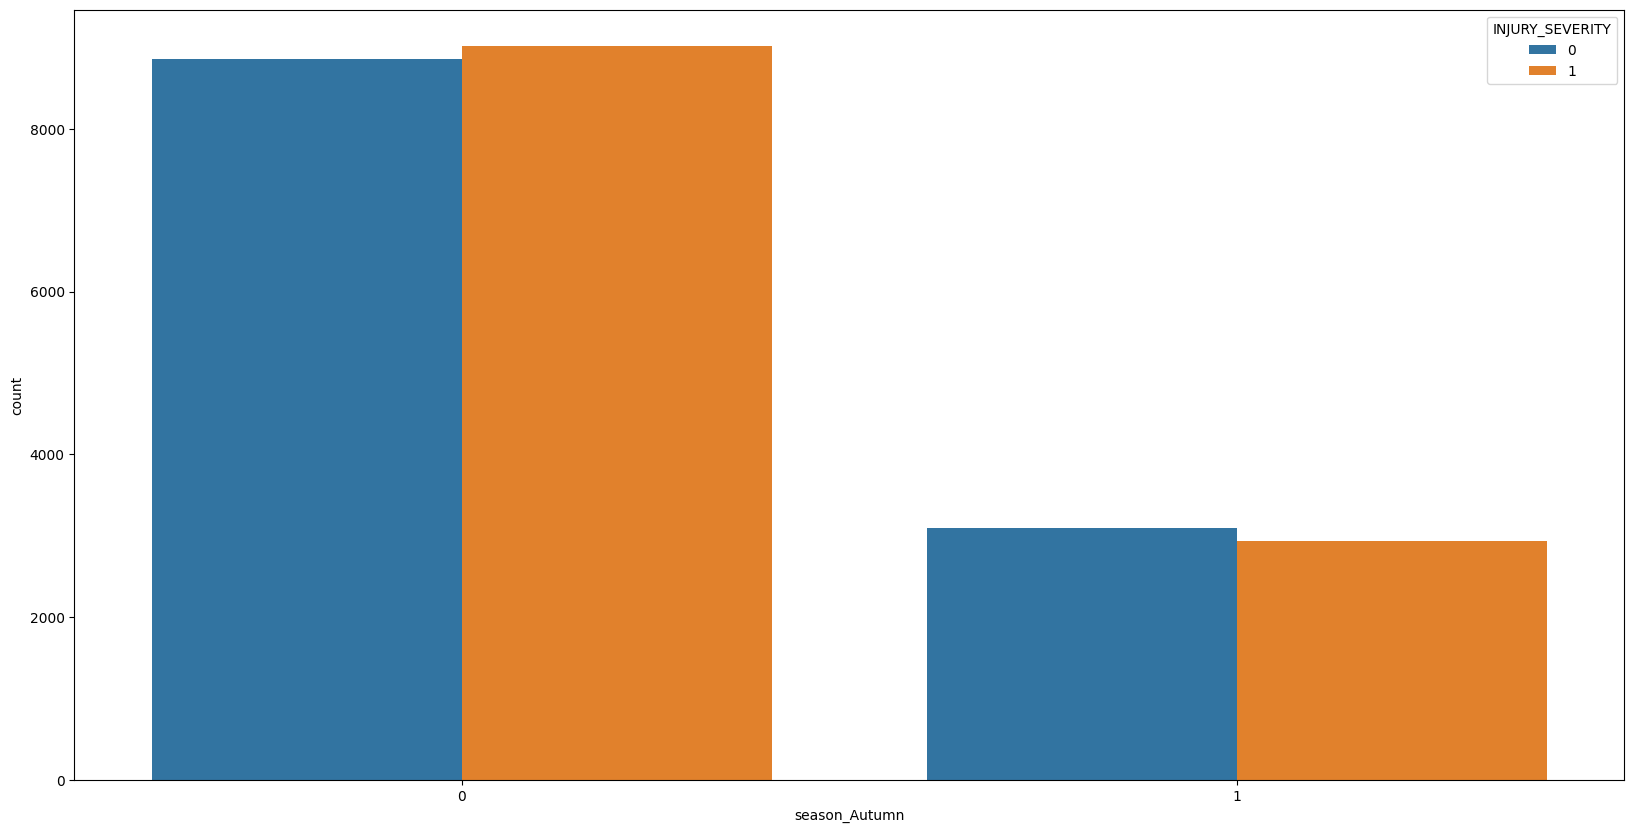

<Figure size 640x480 with 0 Axes>

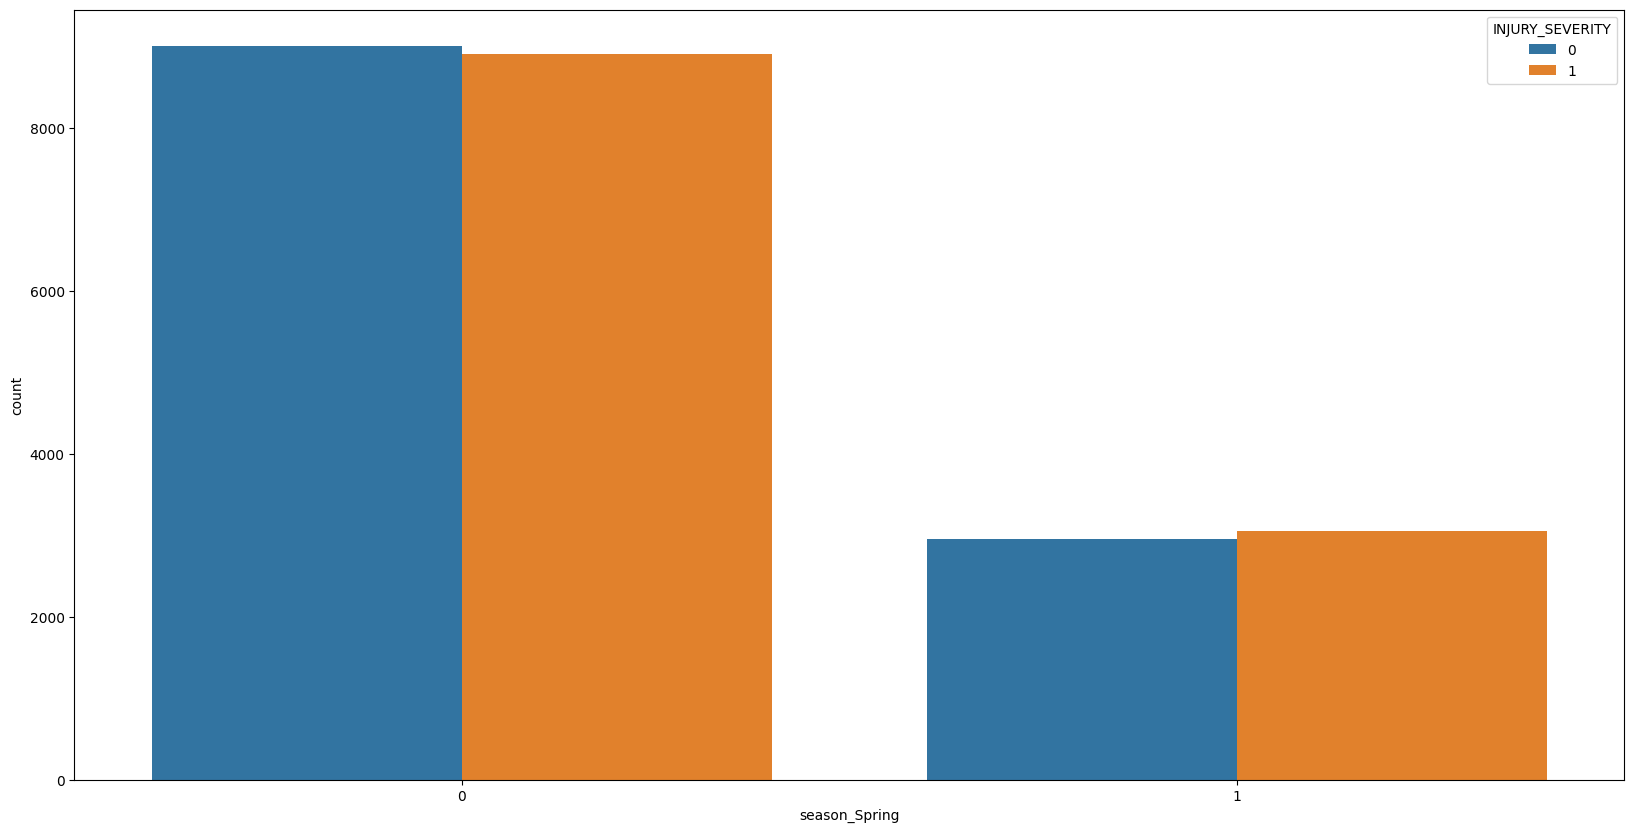

<Figure size 640x480 with 0 Axes>

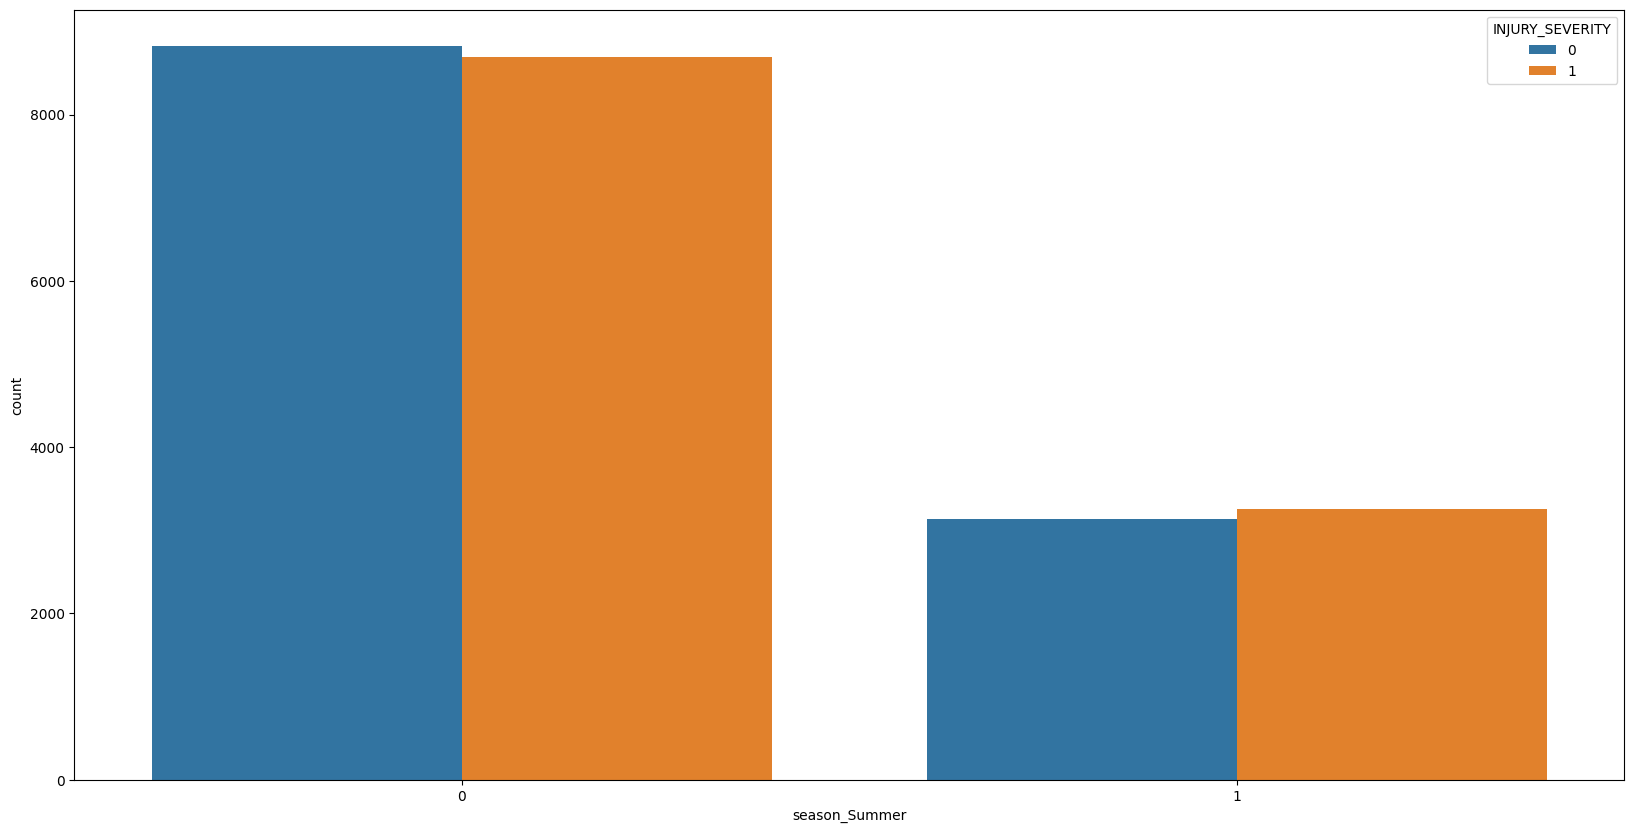

<Figure size 640x480 with 0 Axes>

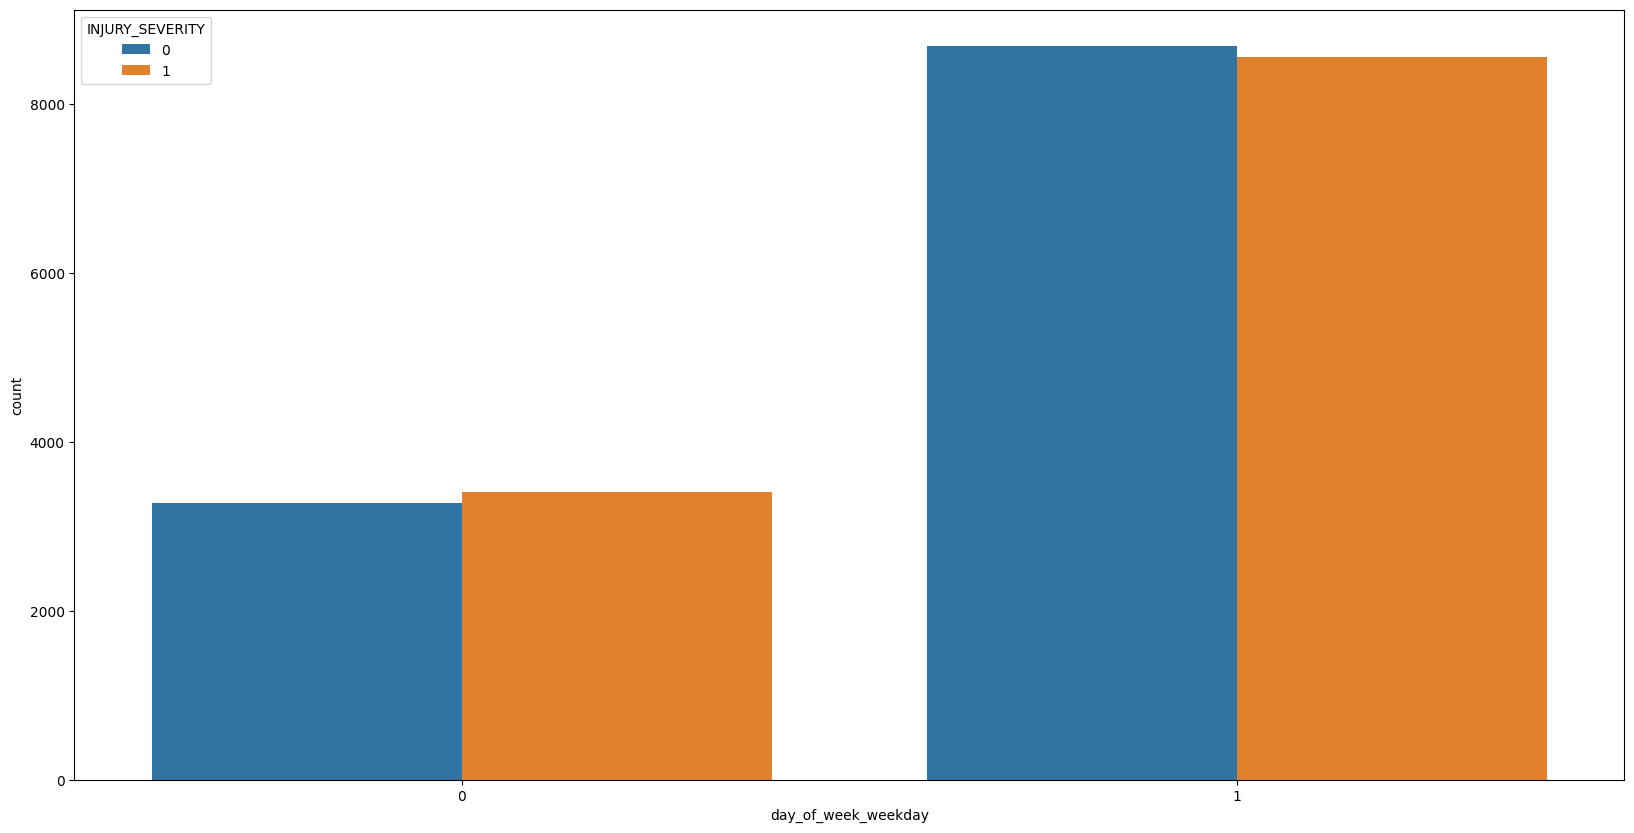

<Figure size 640x480 with 0 Axes>

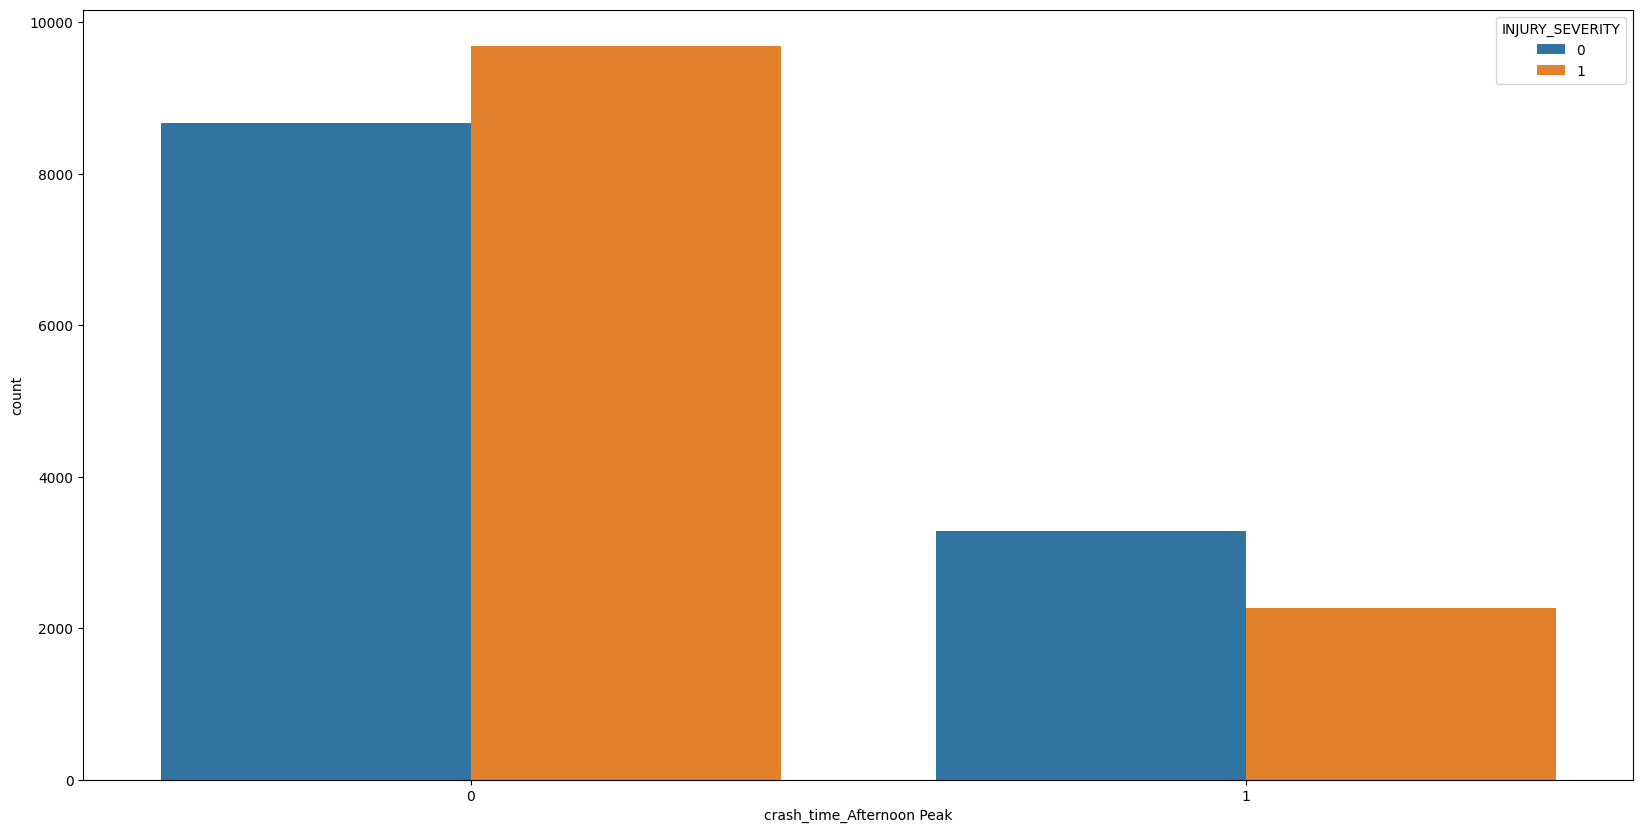

<Figure size 640x480 with 0 Axes>

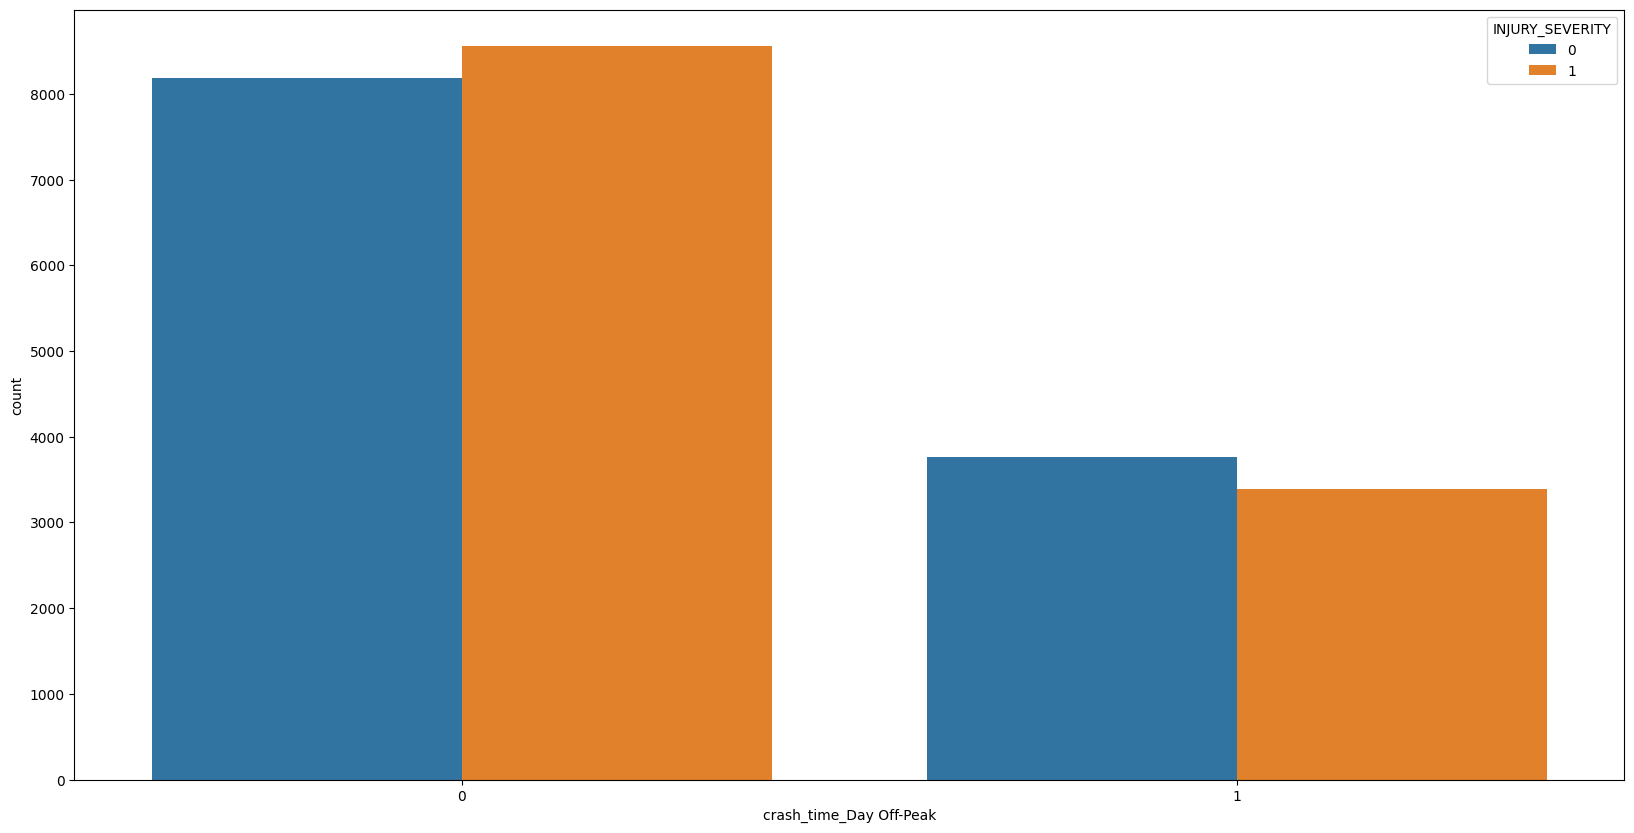

<Figure size 640x480 with 0 Axes>

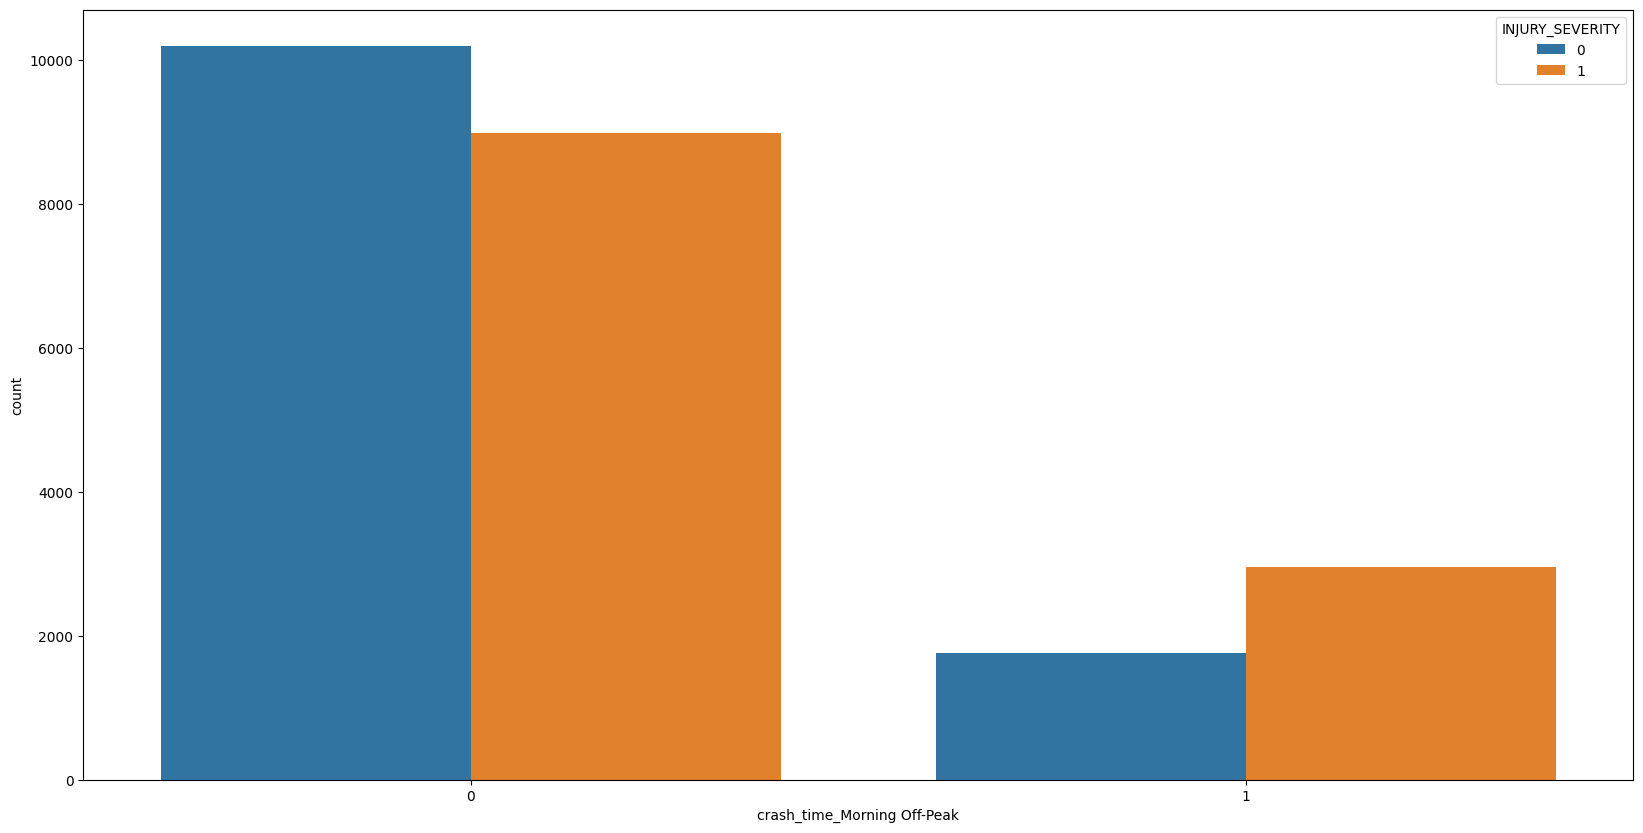

<Figure size 640x480 with 0 Axes>

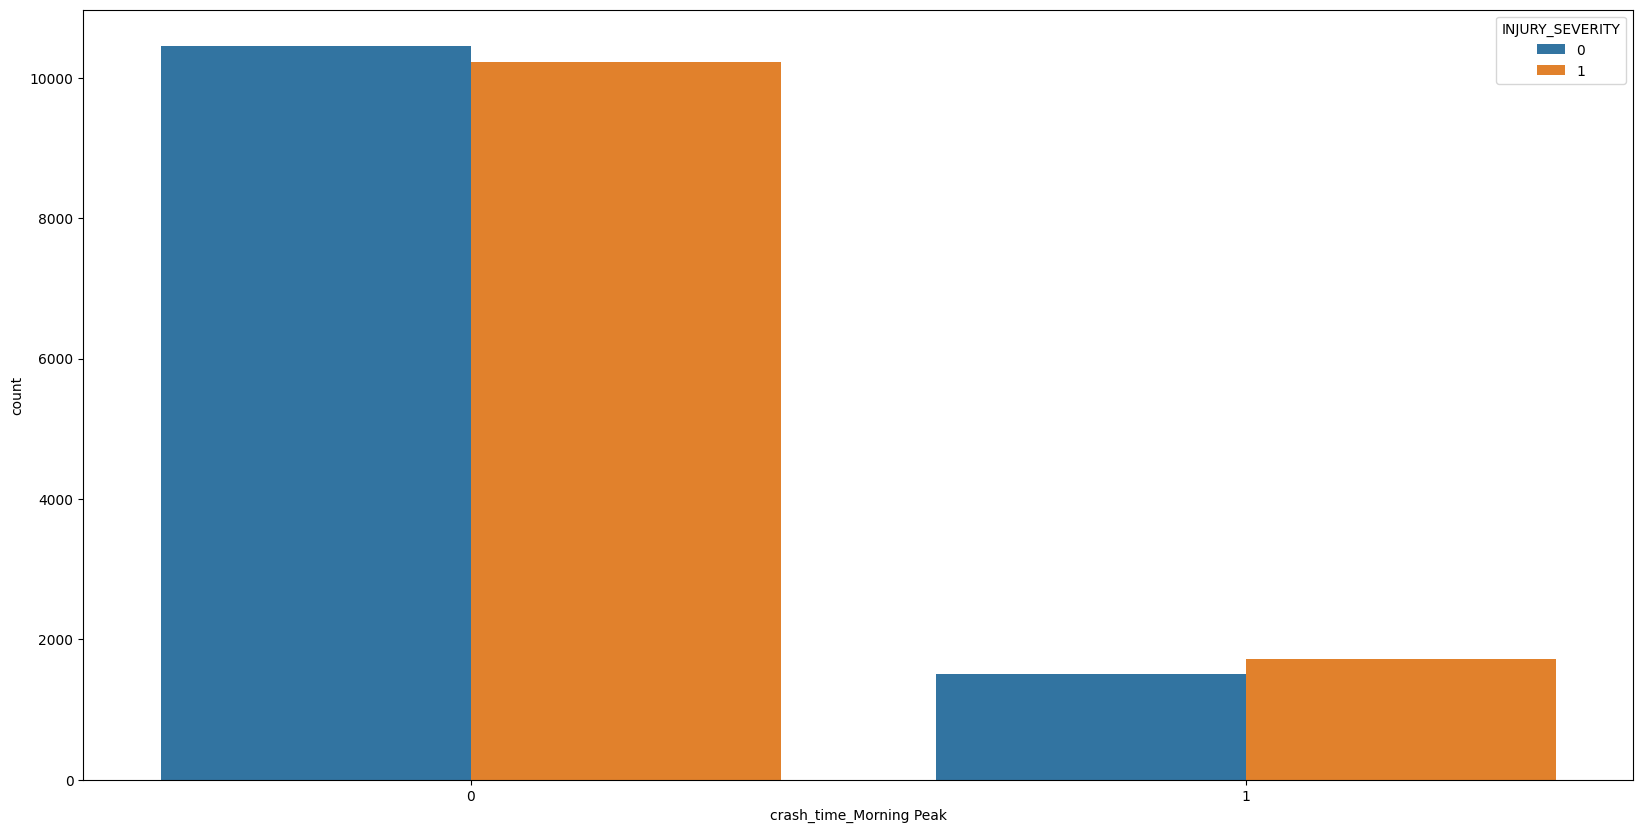

<Figure size 640x480 with 0 Axes>

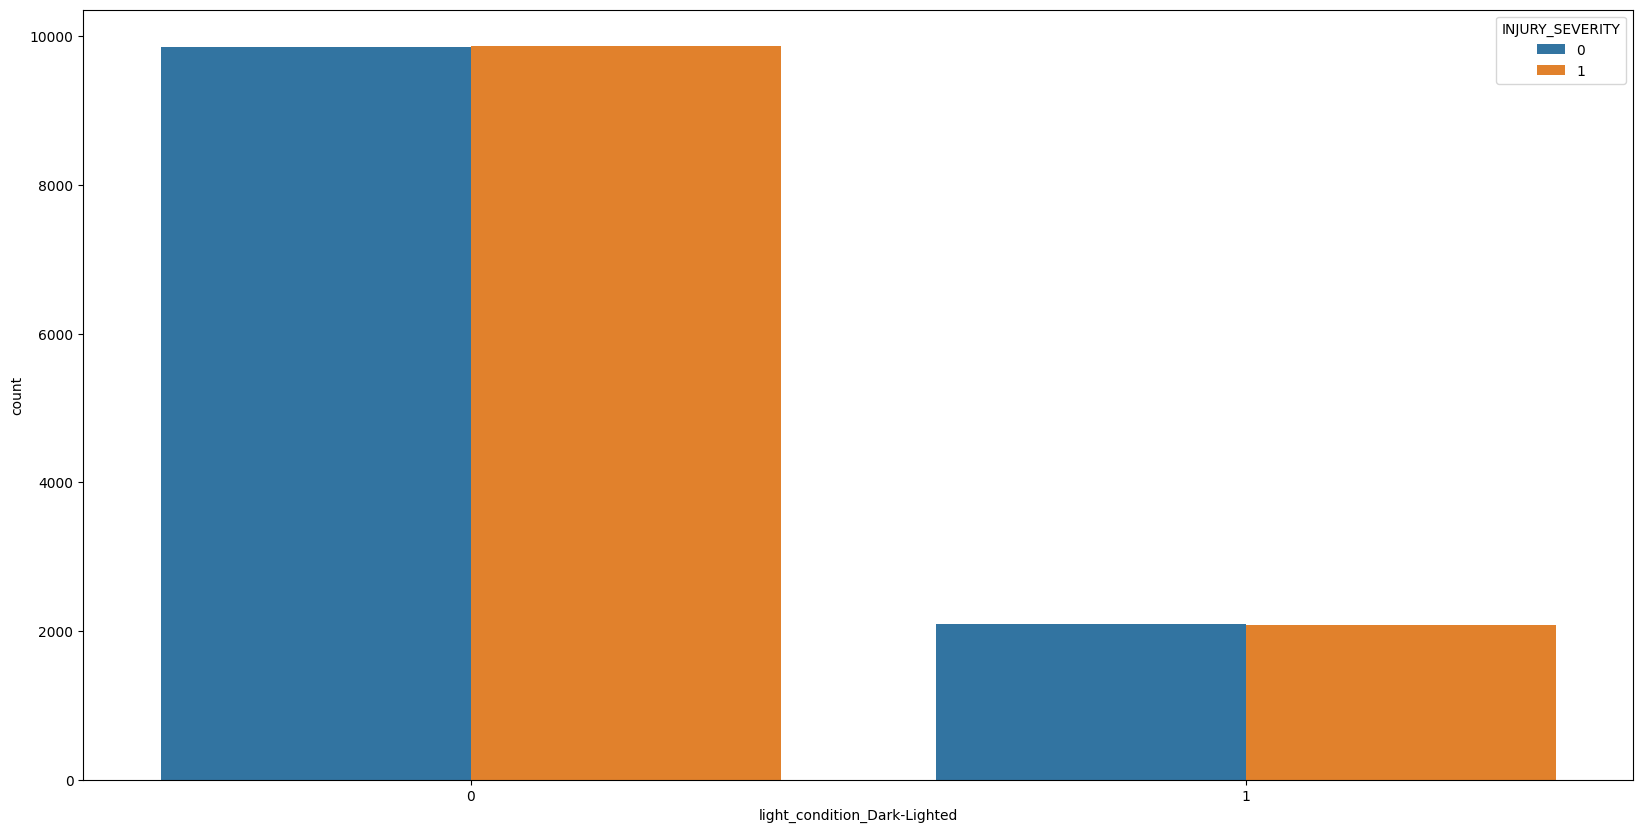

<Figure size 640x480 with 0 Axes>

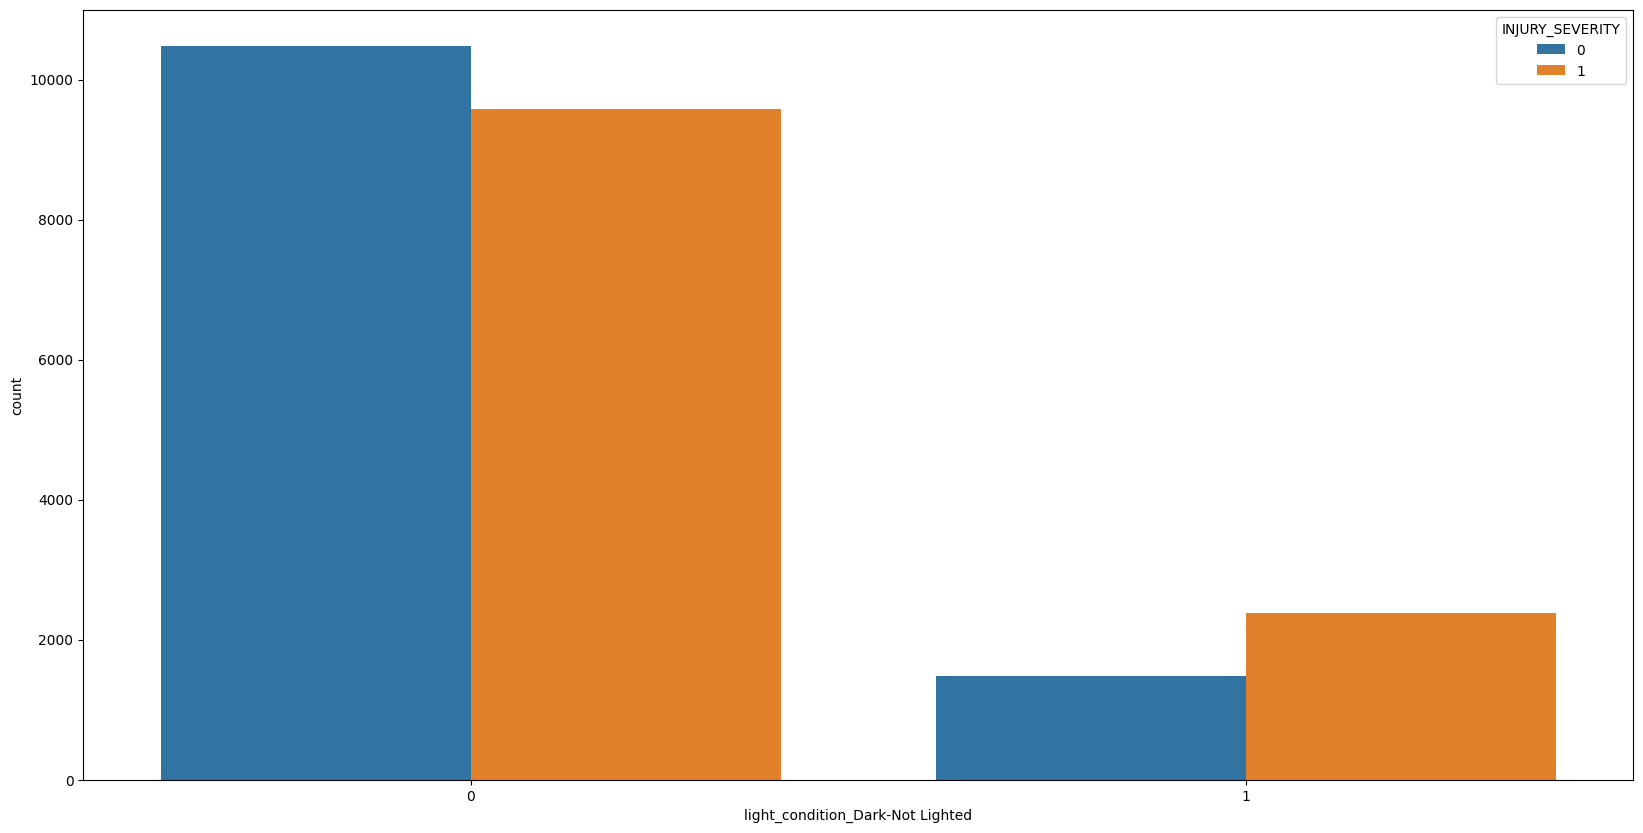

<Figure size 640x480 with 0 Axes>

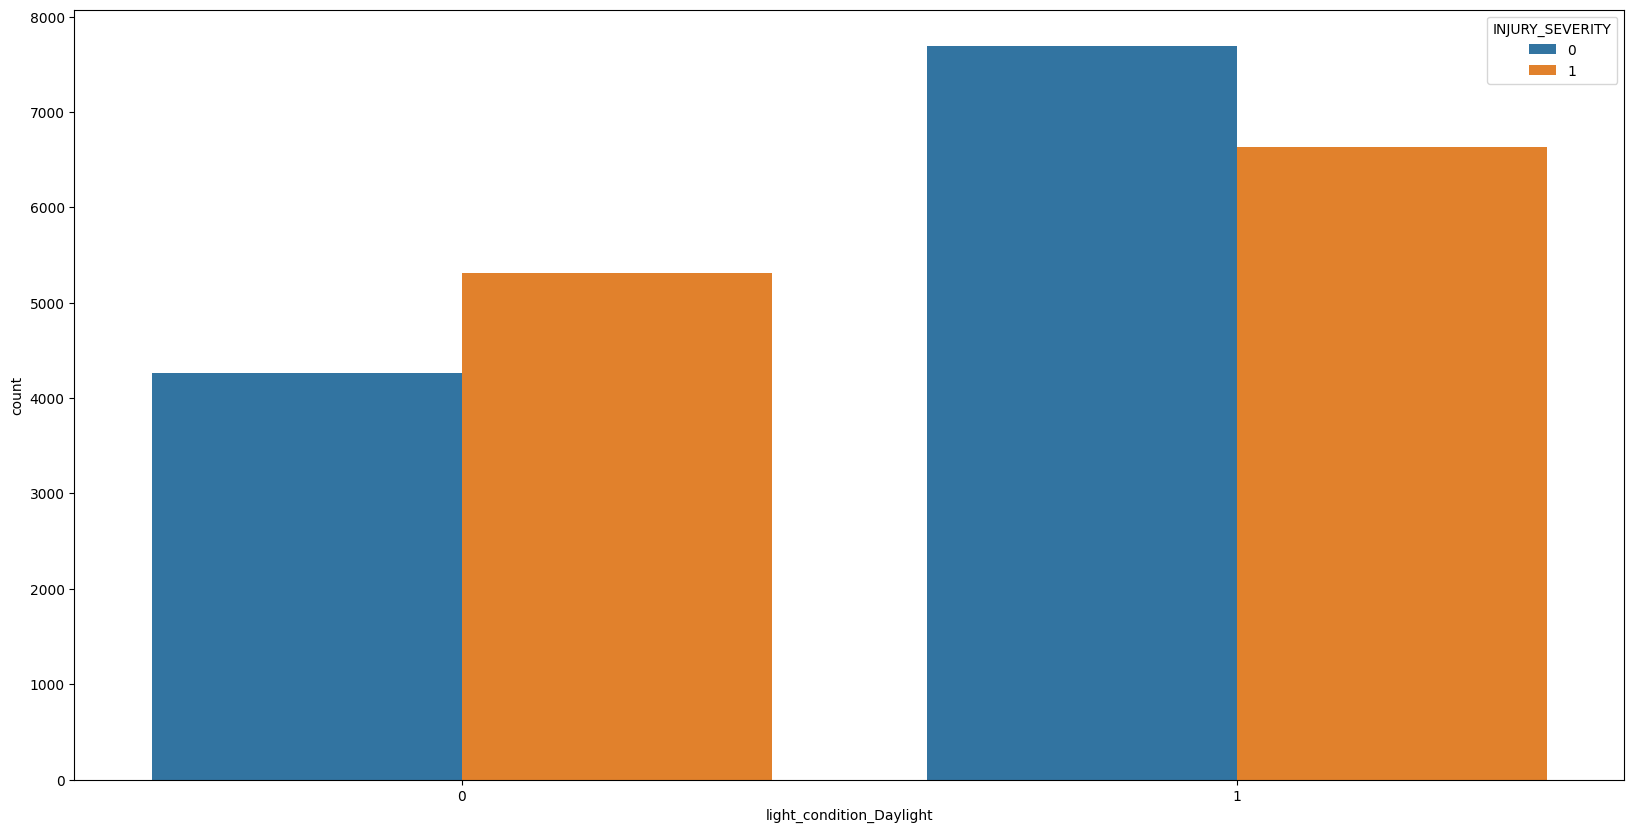

<Figure size 640x480 with 0 Axes>

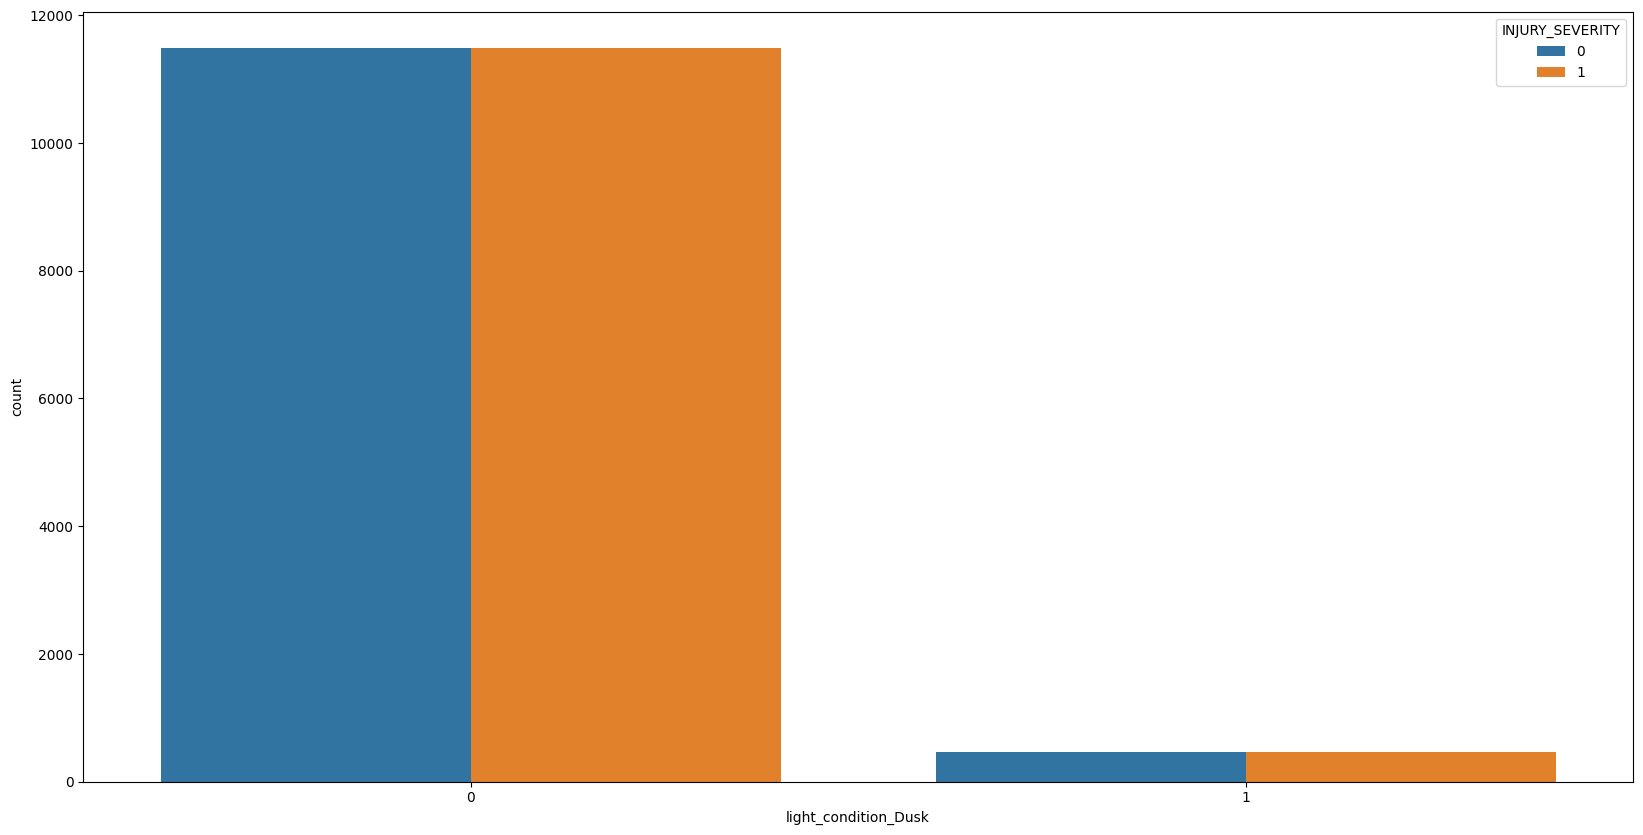

<Figure size 640x480 with 0 Axes>

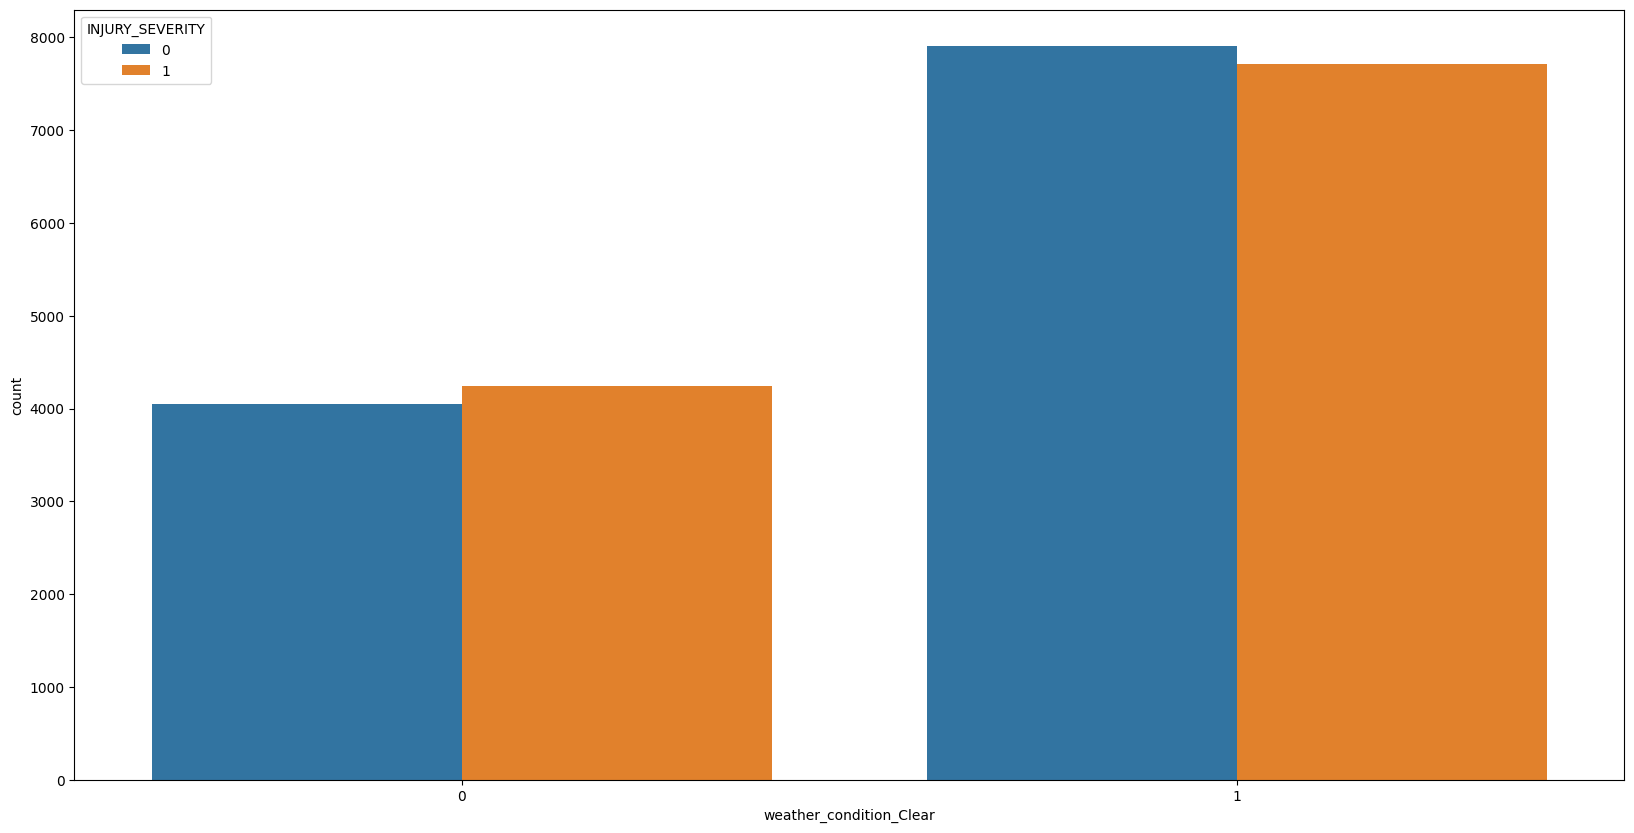

<Figure size 640x480 with 0 Axes>

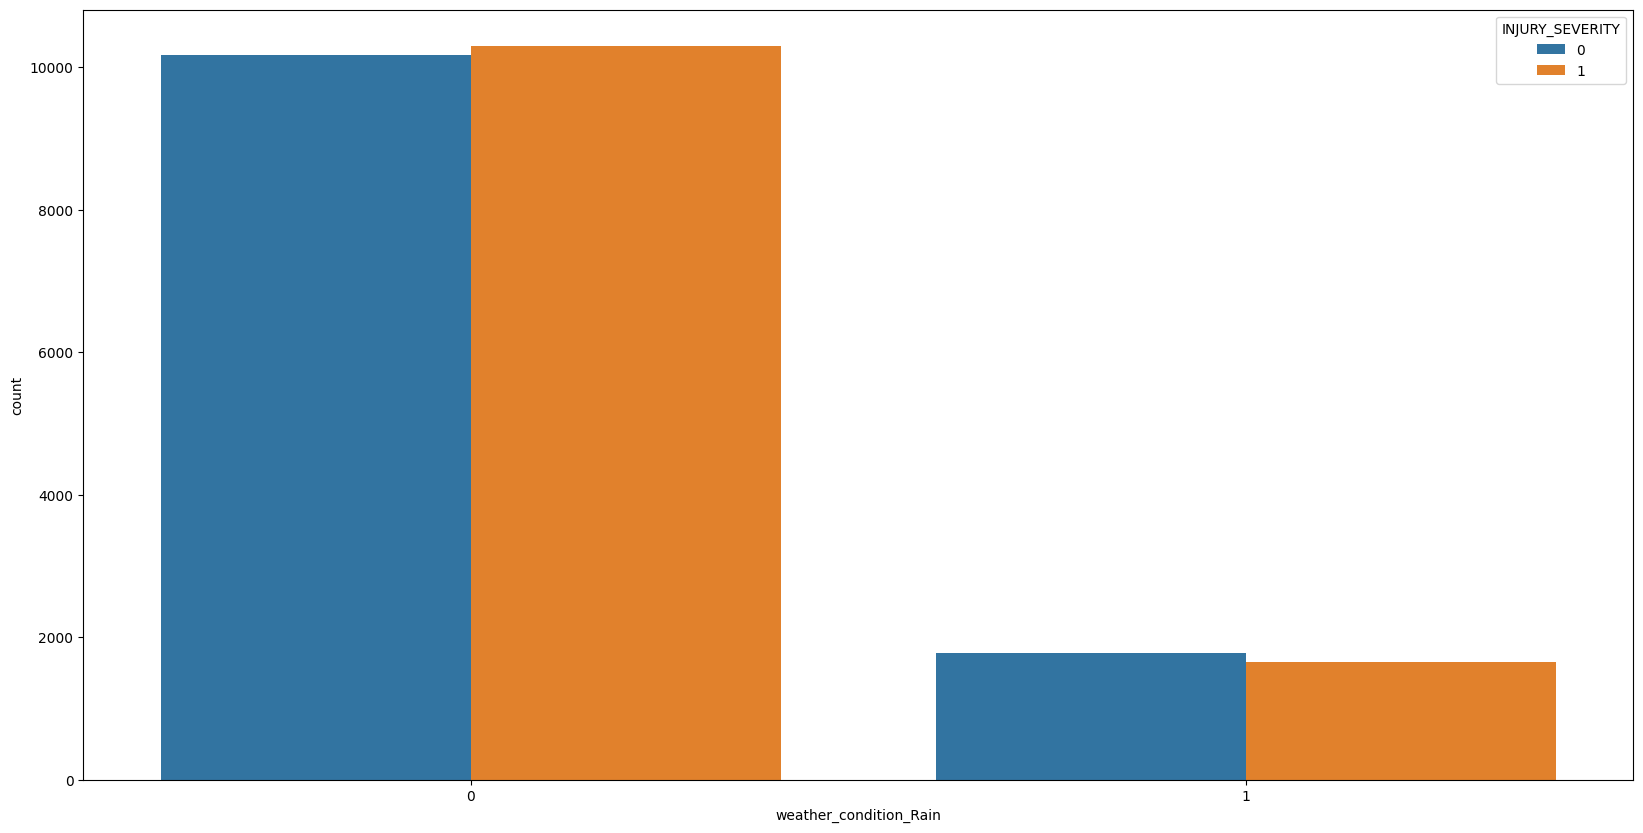

<Figure size 640x480 with 0 Axes>

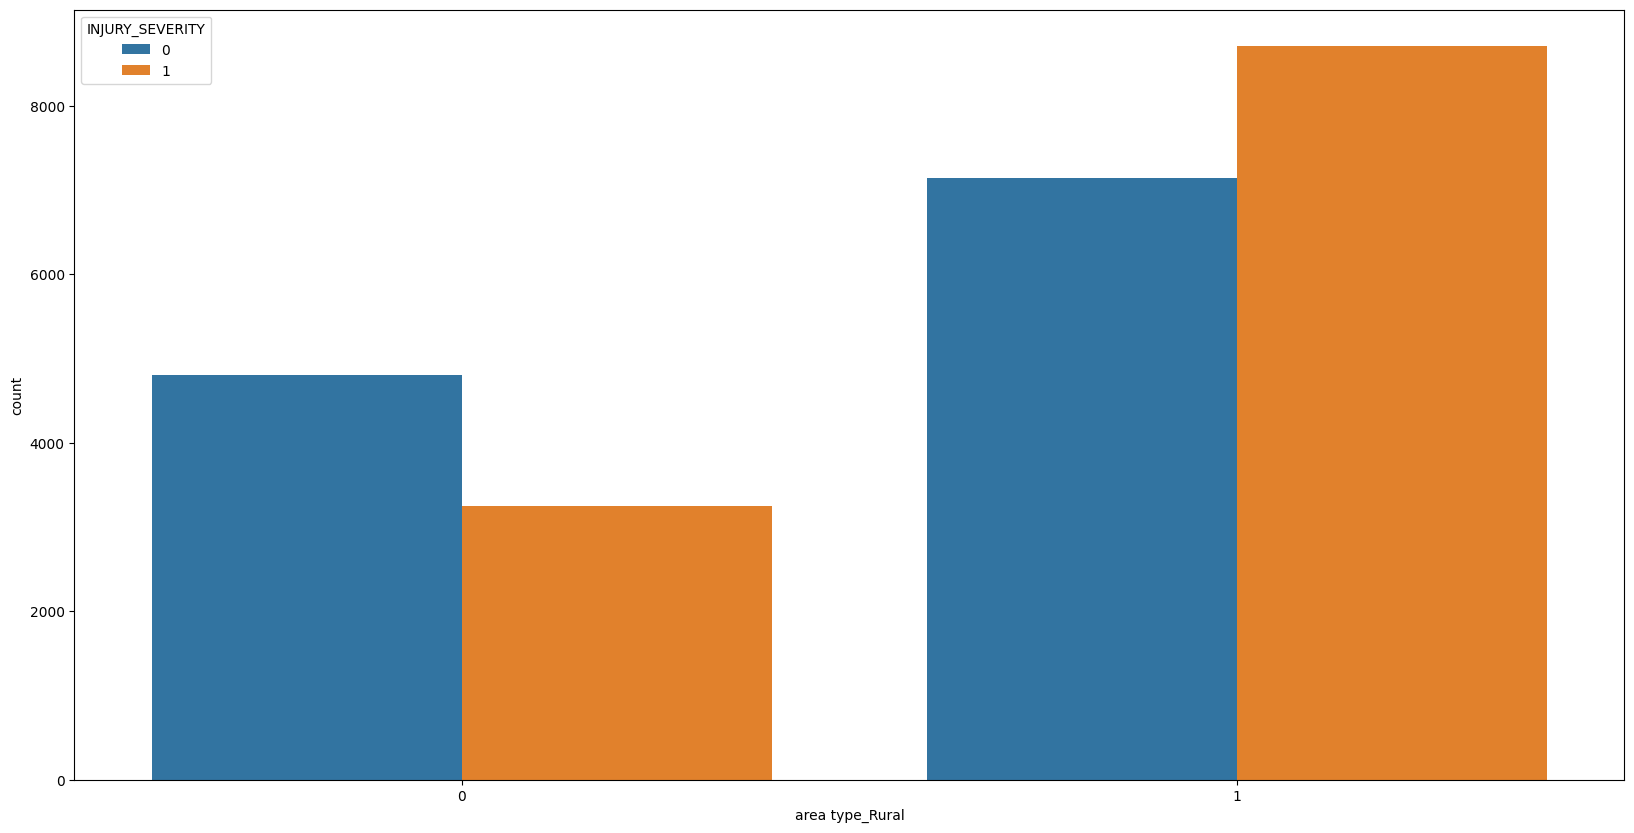

<Figure size 640x480 with 0 Axes>

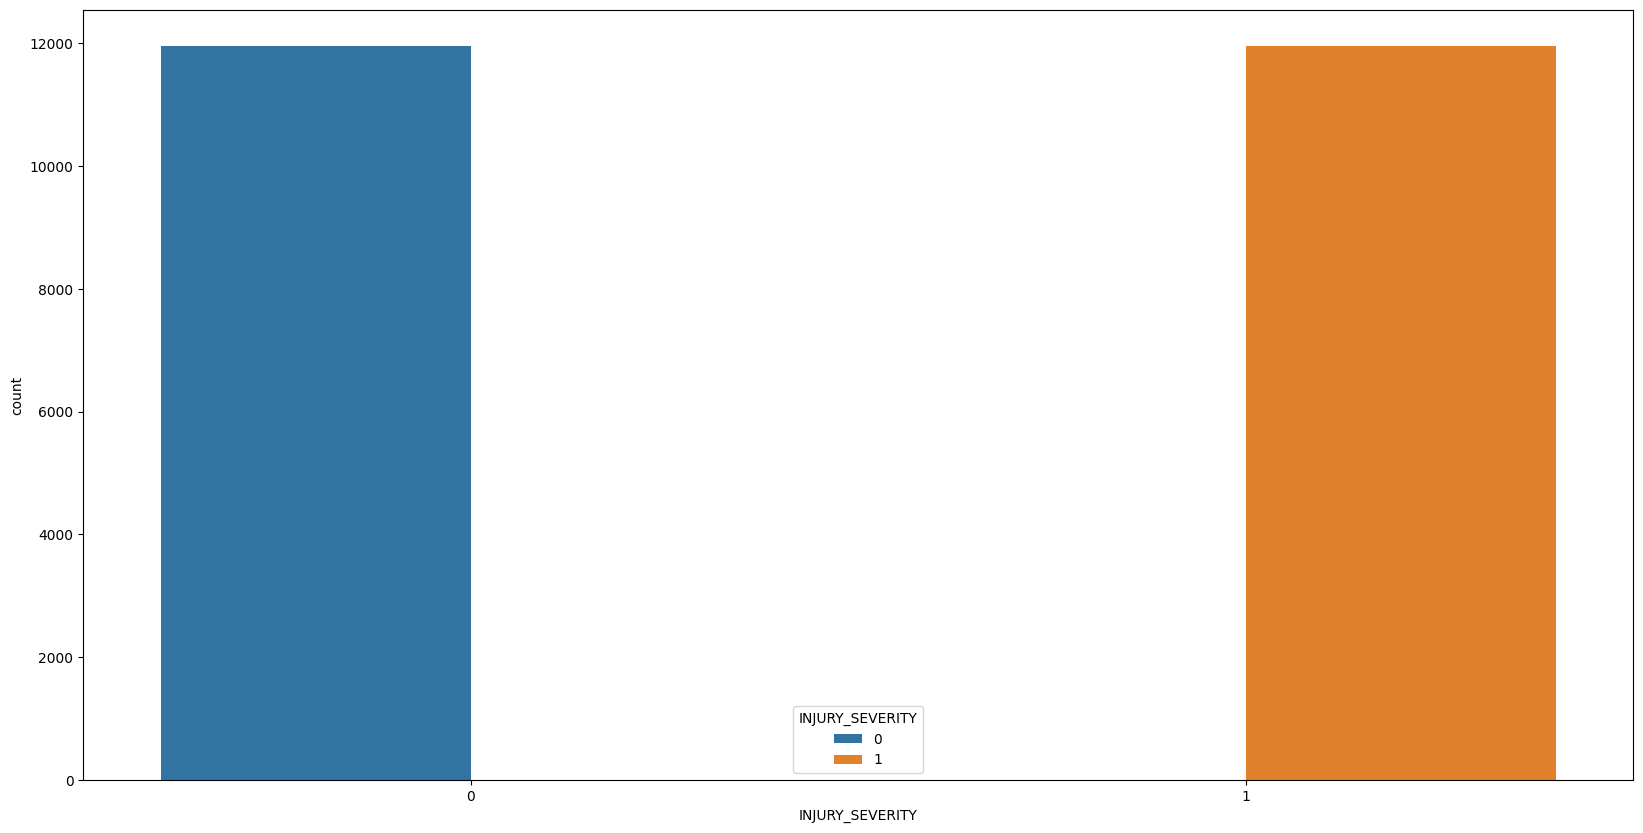

In [12]:
# grphically visualizing features
for col in X_ROS.columns:
    plt.figure()
    fig = plt.figure(figsize=(20,10))
    
    sns.countplot(x=col, data=X_ROS, hue='INJURY_SEVERITY')

In [13]:
X_train = X_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True)

In [14]:
X_train.shape, X_train_ROS.shape

((13102, 45), (23902, 45))

In [15]:
counter = Counter(y_train)
for k, v in counter.items():
	percentage = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, percentage))

Class=0, n=11951 (91.215%)
Class=1, n=1151 (8.785%)


In [16]:
counter = Counter(y_train_ROS)
for k, v in counter.items():
	percentage = v / len(y_train_ROS) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, percentage))

Class=0, n=11951 (50.000%)
Class=1, n=11951 (50.000%)


## Feature Selection Using Random Forest

In [17]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train_ROS, y_train_ROS)

RandomForestClassifier(random_state=0)

In [18]:
len(rfc.feature_importances_)

45

In [19]:
# features by importance
feature_importances = list(zip(X_train_ROS.columns, rfc.feature_importances_))

# ranking by weight of importances
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:50} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: driver_gender_Female                               Importance: 0.04575014195580986
Feature: day_of_week_weekday                                Importance: 0.043378076567485845
Feature: crash_type_Rear End                                Importance: 0.037442864243773036
Feature: season_Autumn                                      Importance: 0.03729397791087833
Feature: season_Spring                                      Importance: 0.03728829311556509
Feature: season_Summer                                      Importance: 0.036649342411484556
Feature: vehicle_year_<5 Years                              Importance: 0.035477000382025066
Feature: weather_condition_Clear                            Importance: 0.03478258753223279
Feature: vehicle_year_5-10 Years                            Importance: 0.03422685633687459
Feature: area type_Rural                                    Importance: 0.03340553144904133
Feature: driver_age_31-40                                   Importance: 0.03

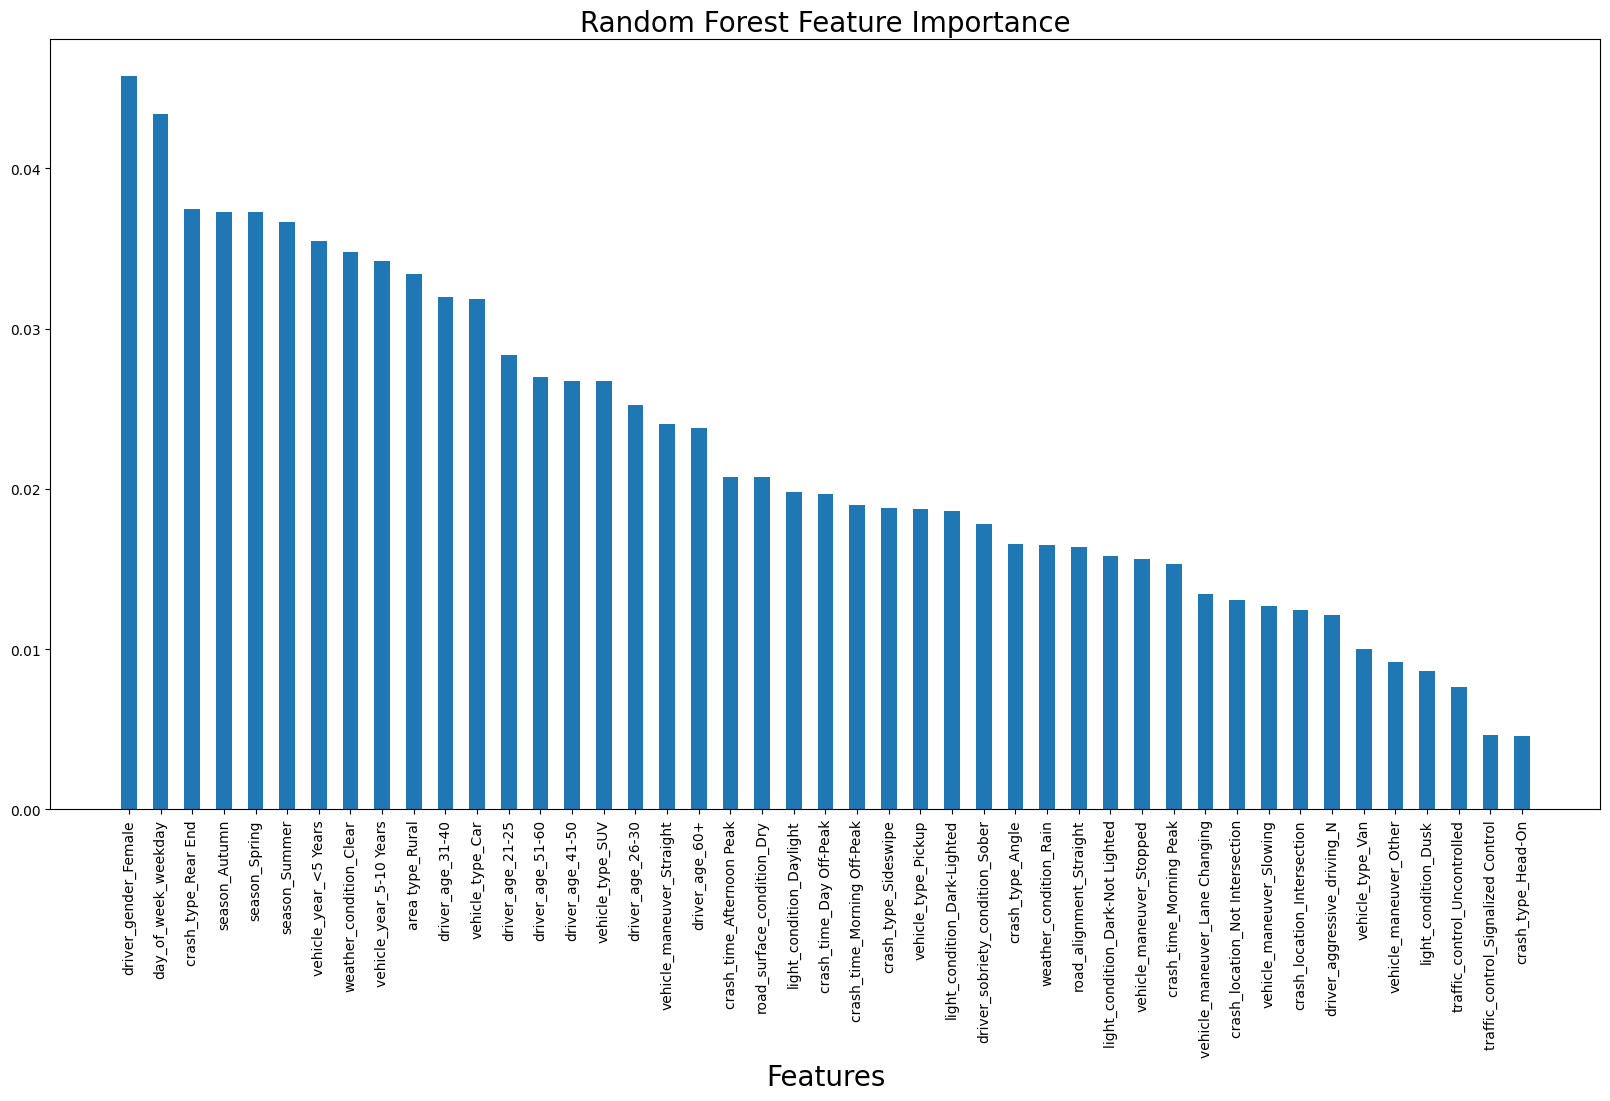

In [20]:
# Plot the feature importance
feature_names = [i[0] for i in feature_importances_ranked]
y_ticks = np.arange(0, len(feature_names))
y_axis = [i[1] for i in feature_importances_ranked]

plt.figure(figsize = (20, 10))

plt.bar(feature_names, y_axis, width = 0.5)
plt.title('Random Forest Feature Importance', fontdict= {'fontsize':20})
plt.xlabel('Features',fontdict= {'fontsize':20})
plt.xticks(rotation=90)

plt.savefig('FeatureSelection.png', dpi=600, bbox_inches="tight")
plt.show()

## Model Training

In [21]:
# parameter selection
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty': ['l2'],
            'C': [0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 6, 7, 8, 9, 10]
        }
    },
#     'svm': {
#         'model': SVC(),
#         'params': {
#             'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#             'kernel': ['linear','poly','rbf', 'sigmoid'],
#             'gamma': ['scale', 'auto']
#         }
#     },
    'CART': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'max_features': ['auto','sqrt','log2']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 75, 100, 250,500,1000],
            'criterion': ['gini','entropy', 'log_loss'],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
            'max_features': ['sqrt', 'log2']
        }
    },
    'adaboost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 75, 100, 250, 500, 1000],
            'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    }
}

In [22]:
# selecting feature combination
feat_comb = []
for n in [25, 20, 15, 10, 5]:
    feat_comb.append([i[0] for i in feature_importances_ranked[0:n]])

In [23]:
df_dummy_scores = pd.DataFrame(columns=['feature_no', 'model', 'best_score', 'best_params'])

scores = []
for i in range(len(feat_comb)):
    X_train_CV = X_train_ROS[feat_comb[i]]
    for mdl_name, mdl_params in model_params.items():
        grid_search = GridSearchCV(mdl_params['model'], mdl_params['params'], n_jobs=-1, cv=5, scoring='accuracy', error_score=0)
        grid_search.fit(X_train_CV, y_train_ROS)
        scores.append({
            'feature_no': len(feat_comb[i]),
            'model': mdl_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    df_scores = pd.DataFrame(scores, columns=['feature_no', 'model', 'best_score', 'best_params'])  
    df_comb_scores = pd.concat([df_dummy_scores, df_scores], axis=0)

In [24]:
# grid search result
df_comb_scores

feature_no                model  best_score                                        best_params
0          25  logistic_regression    0.630325  {'C': 0.06, 'penalty': 'l2', 'solver': 'liblin...
1          25                 CART    0.939336  {'max_depth': 20, 'max_features': 'log2', 'min...
2          25        random_forest    0.975609  {'criterion': 'gini', 'max_depth': 20, 'max_fe...
3          25             adaboost    0.630450  {'algorithm': 'SAMME', 'learning_rate': 0.75, ...
4          20  logistic_regression    0.610912  {'C': 0.5, 'penalty': 'l2', 'solver': 'libline...
5          20                 CART    0.919463  {'max_depth': 20, 'max_features': 'sqrt', 'min...
6          20        random_forest    0.943561  {'criterion': 'gini', 'max_depth': 19, 'max_fe...
7          20             adaboost    0.610284  {'algorithm': 'SAMME.R', 'learning_rate': 0.75...
8          15  logistic_regression    0.605724  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...
9          15                 CART    0.802569  {'max_depth': 20, 'max_features': 'log2', 'min...
10         15        random_forest    0.811815  {'criterion': 'gini', 'max_depth': 18, 'max_fe...
11         15             adaboost    0.606854  {'algorithm': 'SAMME.R', 'learning_rate': 0.02...
12         10  logistic_regression    0.605515  {'C': 0.06, 'penalty': 'l2', 'solver': 'liblin...
13         10                 CART    0.651661  {'max_depth': 15, 'max_features': 'log2', 'min...
14         10        random_forest    0.652414  {'criterion': 'entropy', 'max_depth': 19, 'max...
15         10             adaboost    0.606100  {'algorithm': 'SAMME', 'learning_rate': 0.1, '...
16          5  logistic_regression    0.599657  {'C': 0.06, 'penalty': 'l2', 'solver': 'newton...
17          5                 CART    0.600494  {'max_depth': 4, 'max_features': 'auto', 'min_...
18          5        random_forest    0.600452  {'criterion': 'gini', 'max_depth': 5, 'max_fea...
19          5             adaboost    0.599657  {'algorithm': 'SAMME', 'learning_rate': 0.01, ...

In [25]:
model_group_by = df_comb_scores.groupby('model')

## Prediction

### Logistic Regression

In [26]:
df_result_dummy = pd.DataFrame(columns=['feature_no', 'accuracy'])

model_result = []
lr_auc = []
fpr_lr = []
tpr_lr = []
for i in range(len(feat_comb)):
    hp = model_group_by.get_group('logistic_regression').reset_index(drop=True).loc[i, 'best_params']
    log_reg = LogisticRegression(C=hp['C'], penalty=hp['penalty'], solver=hp['solver'], random_state=0)
    log_reg.fit(X_train_ROS[feat_comb[i]], y_train_ROS)
    lr_pred = log_reg.predict(X_test[feat_comb[i]])
    lr_pred_probs = log_reg.predict_proba(X_test[feat_comb[i]])
    
    conf_matrix = confusion_matrix(y_test, lr_pred)
    model_result.append({
        'feature_no': len(feat_comb[i]),
        'accuracy': accuracy_score(y_test, lr_pred),
        'f1-score': f1_score(y_test, lr_pred),
        'recall': recall_score(y_test, lr_pred),
        'precision': precision_score(y_test, lr_pred),
        'sensitivity': conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    })
    
    # inputs for ROC curve 
    lr_pred_probs = lr_pred_probs[:, 1]
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred_probs)
    lr_auc.append(auc(lr_fpr, lr_tpr))
    fpr_lr.append(lr_fpr)
    tpr_lr.append(lr_tpr)

df_model_result = pd.DataFrame(model_result, columns=['feature_no', 'accuracy', 'f1-score', 'recall', 'precision', 'sensitivity'])  
df_lr_result = pd.concat([df_result_dummy, df_model_result], axis=0)
df_lr_result['roc_auc_score'] = lr_auc

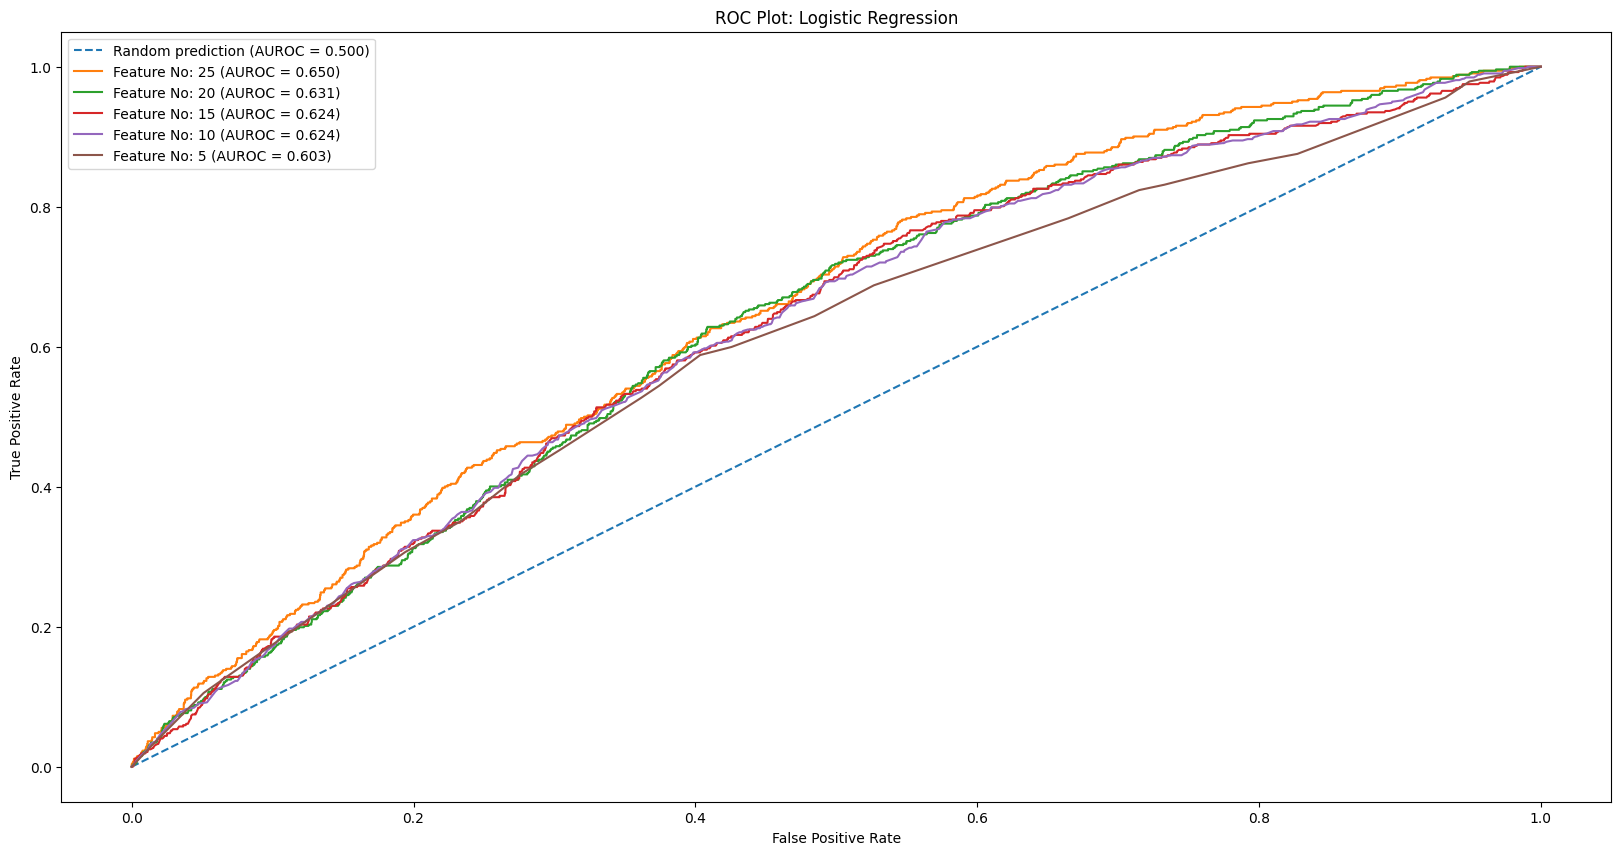

In [27]:
r_pred_probs = [0 for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pred_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_pred_probs)

# ROC curve
plt.figure(figsize = (20, 10))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
for i in range(len(feat_comb)):
    plt.plot(fpr_lr[i], tpr_lr[i], label=f'Feature No: {len(feat_comb[i])} (AUROC = %0.3f)' % lr_auc[i])
plt.title('ROC Plot: Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 

plt.show()

### Support Vector Machines

### Classification and Regression Tree

In [28]:
df_result_dummy = pd.DataFrame(columns=['feature_no', 'accuracy'])

model_result = []
cart_auc = []
fpr_cart = []
tpr_cart = []
for i in range(len(feat_comb)):
    hp = model_group_by.get_group('CART').reset_index(drop=True).loc[i, 'best_params']
    cart = DecisionTreeClassifier(max_depth=hp['max_depth'], max_features=hp['max_features'], min_samples_leaf=hp['min_samples_leaf'], random_state=1)
    cart.fit(X_train_ROS[feat_comb[i]], y_train_ROS)
    cart_pred = cart.predict(X_test[feat_comb[i]])
    cart_pred_probs = cart.predict_proba(X_test[feat_comb[i]])
    
    conf_matrix = confusion_matrix(y_test, cart_pred)
    model_result.append({
        'feature_no': len(feat_comb[i]),
        'accuracy': accuracy_score(y_test, cart_pred),
        'f1-score': f1_score(y_test, cart_pred),
        'recall': recall_score(y_test, cart_pred),
        'precision': precision_score(y_test, cart_pred),
        'sensitivity': conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    })
    
    # inputs for ROC curve 
    cart_pred_probs = cart_pred_probs[:, 1]
    cart_fpr, cart_tpr, _ = roc_curve(y_test, cart_pred_probs)
    cart_auc.append(auc(cart_fpr, cart_tpr))
    fpr_cart.append(cart_fpr)
    tpr_cart.append(cart_tpr)

df_model_result = pd.DataFrame(model_result, columns=['feature_no', 'accuracy', 'f1-score', 'recall', 'precision', 'sensitivity'])  
df_cart_result = pd.concat([df_result_dummy, df_model_result], axis=0)
df_cart_result['roc_auc_score'] = cart_auc

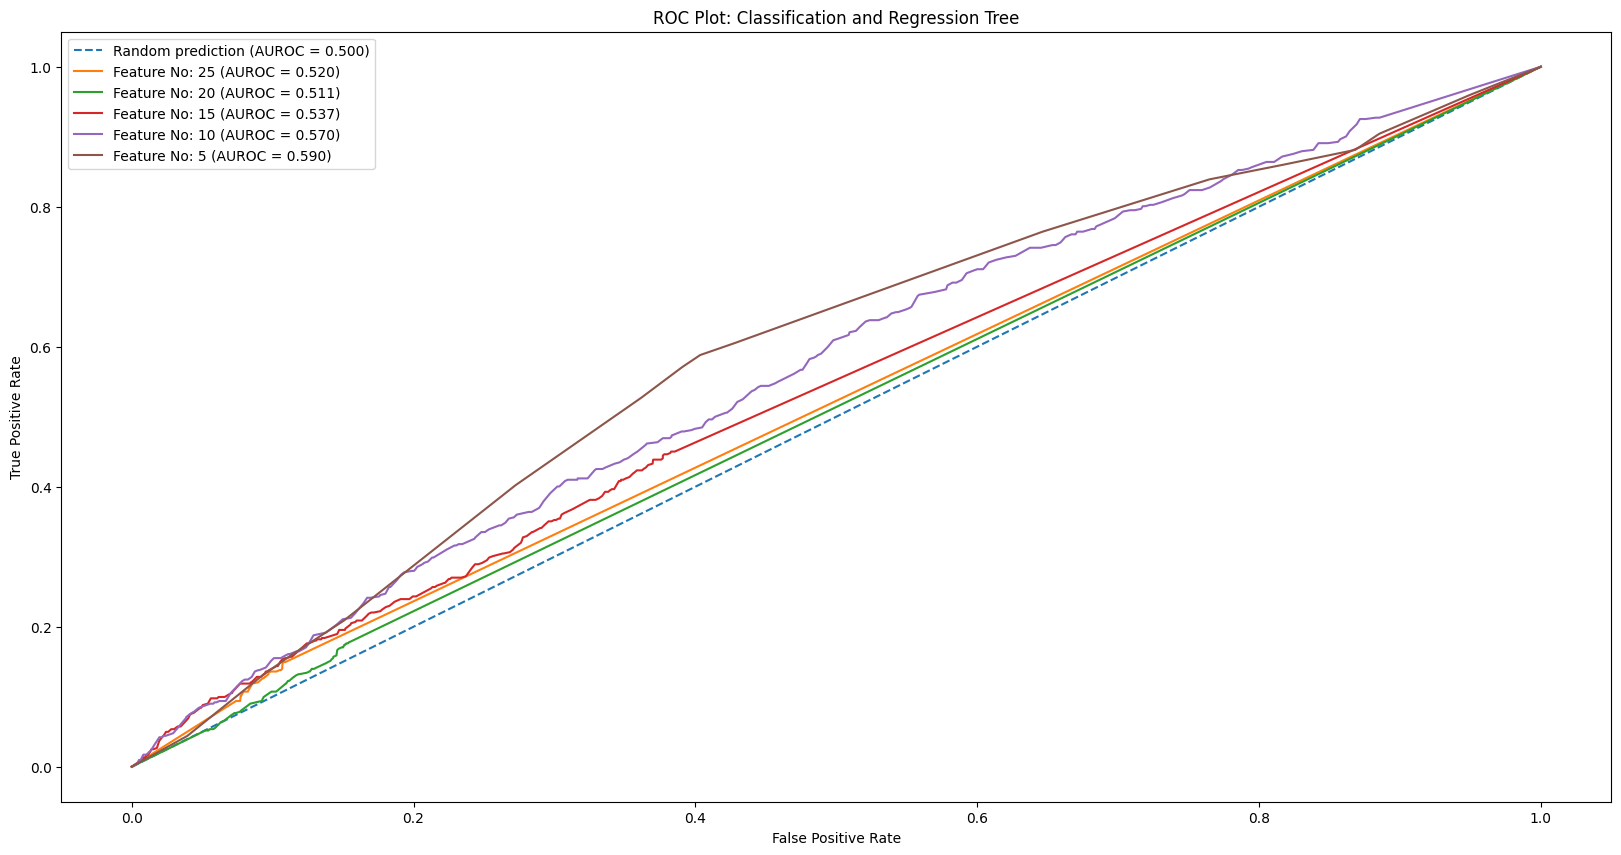

In [29]:
r_pred_probs = [0 for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pred_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_pred_probs)

# ROC curve
plt.figure(figsize = (20, 10))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
for i in range(len(feat_comb)):
    plt.plot(fpr_cart[i], tpr_cart[i], label=f'Feature No: {len(feat_comb[i])} (AUROC = %0.3f)' % cart_auc[i])
plt.title('ROC Plot: Classification and Regression Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 

plt.show()

### Random Forest

In [30]:
df_result_dummy = pd.DataFrame(columns=['feature_no', 'accuracy'])

model_result = []
rfc_auc = []
fpr_rfc = []
tpr_rfc = []
for i in range(len(feat_comb)):
    hp = model_group_by.get_group('random_forest').reset_index(drop=True).loc[i, 'best_params']
    rfc = RandomForestClassifier(n_estimators=hp['n_estimators'], max_depth=hp['max_depth'], max_features=hp['max_features'], criterion=hp['criterion'], random_state=7)
    rfc.fit(X_train_ROS[feat_comb[i]], y_train_ROS)
    rfc_pred = rfc.predict(X_test[feat_comb[i]])
    rfc_pred_probs = rfc.predict_proba(X_test[feat_comb[i]])
    
    conf_matrix = confusion_matrix(y_test, rfc_pred)
    model_result.append({
        'feature_no': len(feat_comb[i]),
        'accuracy': accuracy_score(y_test, rfc_pred),
        'f1-score': f1_score(y_test, rfc_pred),
        'recall': recall_score(y_test, rfc_pred),
        'precision': precision_score(y_test, rfc_pred),
        'sensitivity': conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    })
    
    # inputs for ROC curve 
    rfc_pred_probs = rfc_pred_probs[:, 1]
    rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred_probs)
    rfc_auc.append(auc(rfc_fpr, rfc_tpr))
    fpr_rfc.append(rfc_fpr)
    tpr_rfc.append(rfc_tpr)

df_model_result = pd.DataFrame(model_result, columns=['feature_no', 'accuracy', 'f1-score', 'recall', 'precision', 'sensitivity'])  
df_rfc_result = pd.concat([df_result_dummy, df_model_result], axis=0)
df_rfc_result['roc_auc_score'] = rfc_auc

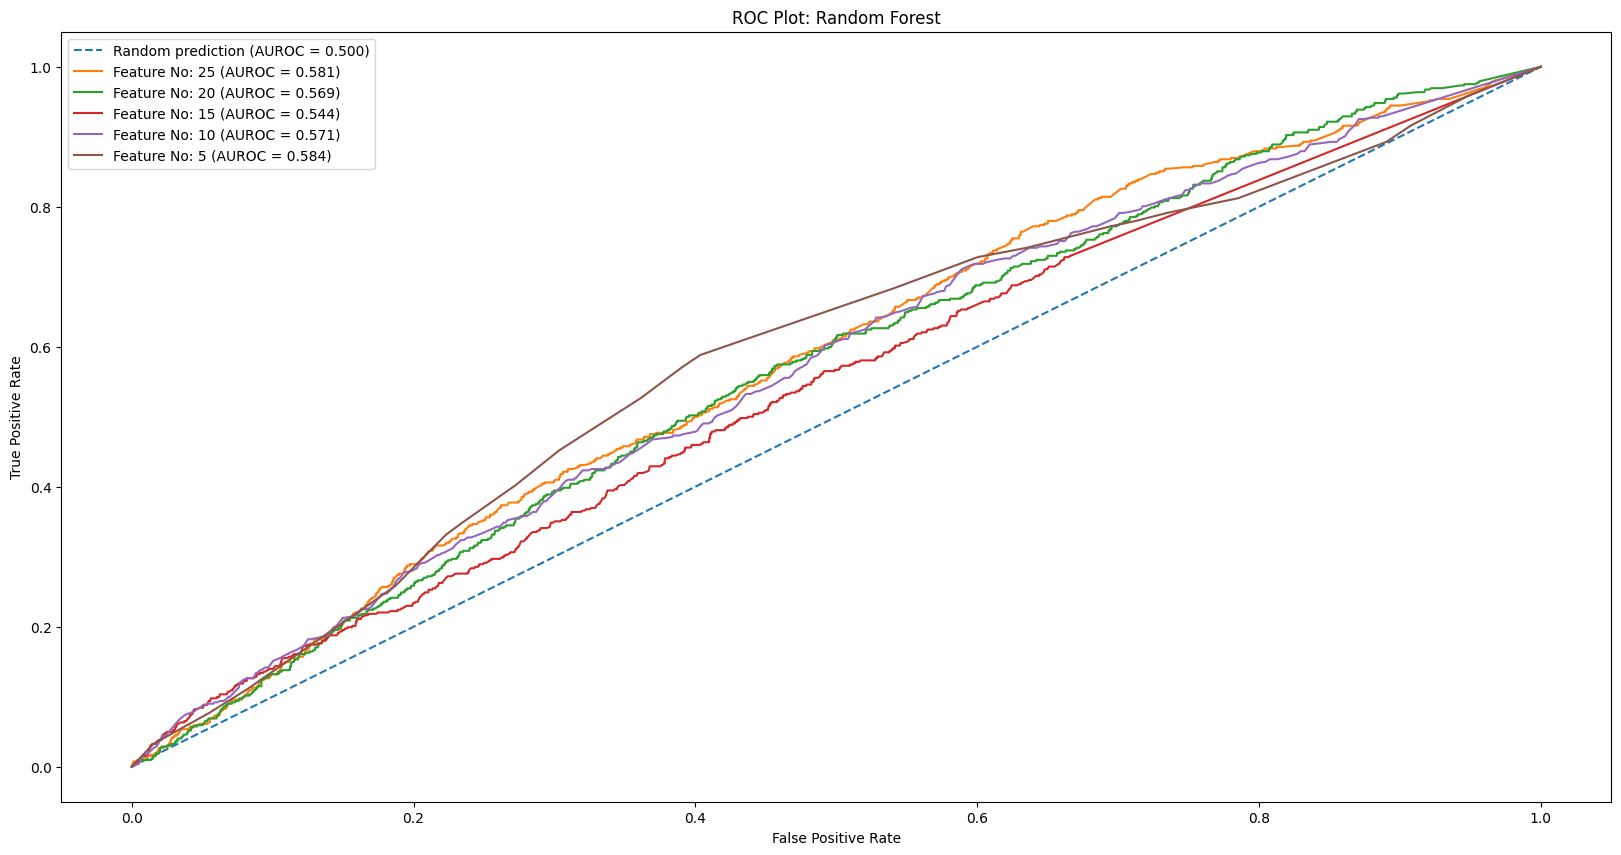

In [31]:
r_pred_probs = [0 for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pred_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_pred_probs)

# ROC curve
plt.figure(figsize = (20, 10))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
for i in range(len(feat_comb)):
    plt.plot(fpr_rfc[i], tpr_rfc[i], label=f'Feature No: {len(feat_comb[i])} (AUROC = %0.3f)' % rfc_auc[i])
plt.title('ROC Plot: Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 

plt.show()

### Adaboost

In [32]:
df_result_dummy = pd.DataFrame(columns=['feature_no', 'accuracy'])

model_result = []
adaboost_auc = []
fpr_adaboost = []
tpr_adaboost = []
for i in range(len(feat_comb)):
    hp = model_group_by.get_group('adaboost').reset_index(drop=True).loc[i, 'best_params']
    adaboost = AdaBoostClassifier(n_estimators=hp['n_estimators'], learning_rate=hp['learning_rate'], algorithm=hp['algorithm'], random_state=0)
    adaboost.fit(X_train_ROS[feat_comb[i]], y_train_ROS)
    adaboost_pred = adaboost.predict(X_test[feat_comb[i]])
    adaboost_pred_probs = adaboost.predict_proba(X_test[feat_comb[i]])
    
    conf_matrix = confusion_matrix(y_test, adaboost_pred)
    model_result.append({
        'feature_no': len(feat_comb[i]),
        'accuracy': accuracy_score(y_test, adaboost_pred),
        'f1-score': f1_score(y_test, adaboost_pred),
        'recall': recall_score(y_test, adaboost_pred),
        'precision': precision_score(y_test, adaboost_pred),
        'sensitivity': conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    })
    
    # inputs for ROC curve 
    adaboost_pred_probs = adaboost_pred_probs[:, 1]
    adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_pred_probs)
    adaboost_auc.append(auc(adaboost_fpr, adaboost_tpr))
    fpr_adaboost.append(adaboost_fpr)
    tpr_adaboost.append(adaboost_tpr)

df_model_result = pd.DataFrame(model_result, columns=['feature_no', 'accuracy', 'f1-score', 'recall', 'precision', 'sensitivity'])  
df_adaboost_result = pd.concat([df_result_dummy, df_model_result], axis=0)
df_adaboost_result['roc_auc_score'] = adaboost_auc

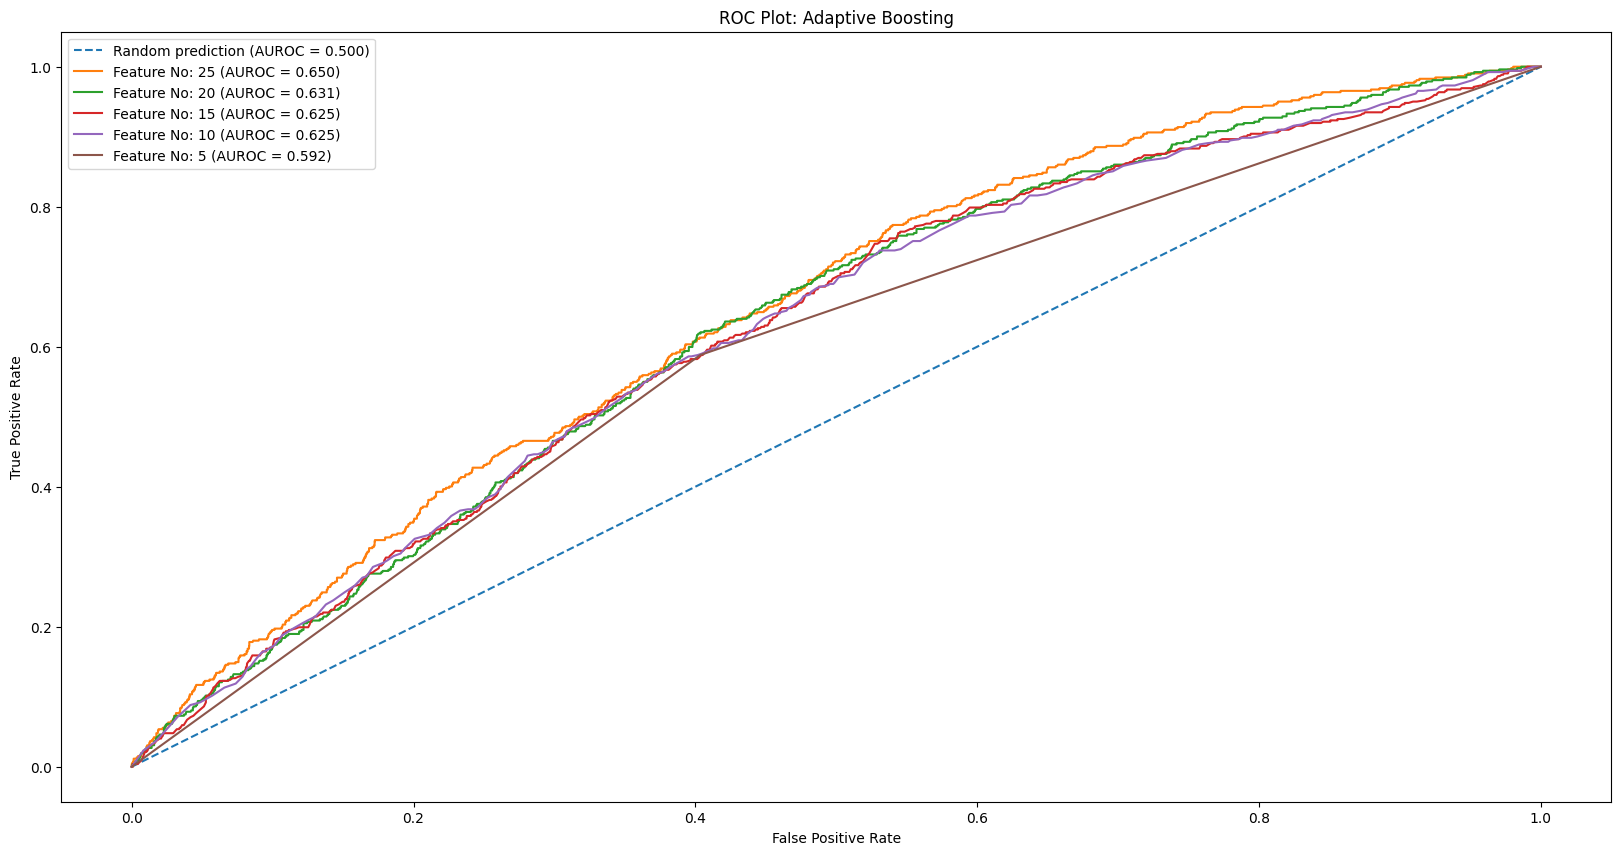

In [33]:
r_pred_probs = [0 for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pred_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_pred_probs)

# ROC curve
plt.figure(figsize = (20, 10))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
for i in range(len(feat_comb)):
    plt.plot(fpr_adaboost[i], tpr_adaboost[i], label=f'Feature No: {len(feat_comb[i])} (AUROC = %0.3f)' % adaboost_auc[i])
plt.title('ROC Plot: Adaptive Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 

plt.show()

### Voting Classifier

In [34]:
df_result_dummy = pd.DataFrame(columns=['feature_no', 'accuracy'])
model_comb = [('lr', LogisticRegression()), ('rfc', RandomForestClassifier()), ('adaboost', AdaBoostClassifier())]

model_result = []
vc_auc = []
fpr_vc = []
tpr_vc = []
for i in range(len(feat_comb)):
    vc = VotingClassifier(estimators=model_comb, voting='soft')
    vc.fit(X_train_ROS[feat_comb[i]], y_train_ROS)
    vc_pred = vc.predict(X_test[feat_comb[i]])
    vc_pred_probs = vc.predict_proba(X_test[feat_comb[i]])
    
    conf_matrix = confusion_matrix(y_test, vc_pred)
    model_result.append({
        'feature_no': len(feat_comb[i]),
        'accuracy': accuracy_score(y_test, vc_pred),
        'f1-score': f1_score(y_test, vc_pred),
        'recall': recall_score(y_test, vc_pred),
        'precision': precision_score(y_test, vc_pred),
        'sensitivity': conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    })
    
    # inputs for ROC curve 
    vc_pred_probs = vc_pred_probs[:, 1]
    vc_fpr, vc_tpr, _ = roc_curve(y_test, vc_pred_probs)
    vc_auc.append(auc(vc_fpr, vc_tpr))
    fpr_vc.append(vc_fpr)
    tpr_vc.append(vc_tpr)

df_model_result = pd.DataFrame(model_result, columns=['feature_no', 'accuracy', 'f1-score', 'recall', 'precision', 'sensitivity'])  
df_vc_result = pd.concat([df_result_dummy, df_model_result], axis=0)
df_vc_result['roc_auc_score'] = vc_auc

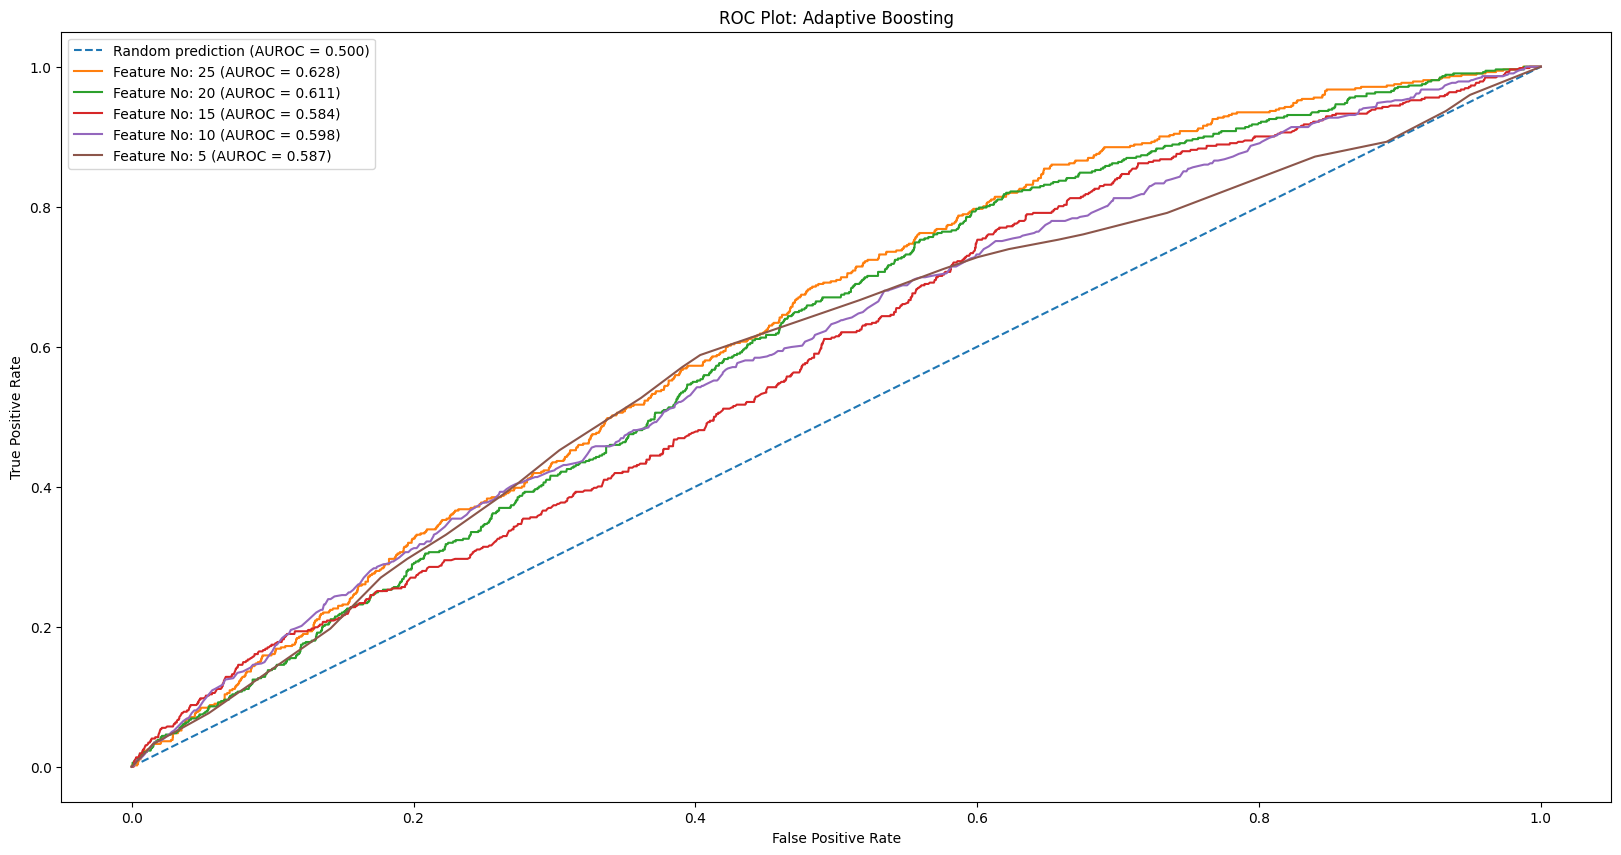

In [35]:
r_pred_probs = [0 for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pred_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_pred_probs)

# ROC curve
plt.figure(figsize = (20, 10))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
for i in range(len(feat_comb)):
    plt.plot(fpr_vc[i], tpr_vc[i], label=f'Feature No: {len(feat_comb[i])} (AUROC = %0.3f)' % vc_auc[i])
plt.title('ROC Plot: Adaptive Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 

plt.show()

## Result Formulation

### GridSearchCV

In [36]:
grid_group_by = df_comb_scores.groupby(['model', 'feature_no'])
grid = grid_group_by.first()
grid

best_score                                        best_params
model               feature_no                                                               
CART                5             0.600494  {'max_depth': 4, 'max_features': 'auto', 'min_...
                    10            0.651661  {'max_depth': 15, 'max_features': 'log2', 'min...
                    15            0.802569  {'max_depth': 20, 'max_features': 'log2', 'min...
                    20            0.919463  {'max_depth': 20, 'max_features': 'sqrt', 'min...
                    25            0.939336  {'max_depth': 20, 'max_features': 'log2', 'min...
adaboost            5             0.599657  {'algorithm': 'SAMME', 'learning_rate': 0.01, ...
                    10            0.606100  {'algorithm': 'SAMME', 'learning_rate': 0.1, '...
                    15            0.606854  {'algorithm': 'SAMME.R', 'learning_rate': 0.02...
                    20            0.610284  {'algorithm': 'SAMME.R', 'learning_rate': 0.75...
                    25            0.630450  {'algorithm': 'SAMME', 'learning_rate': 0.75, ...
logistic_regression 5             0.599657  {'C': 0.06, 'penalty': 'l2', 'solver': 'newton...
                    10            0.605515  {'C': 0.06, 'penalty': 'l2', 'solver': 'liblin...
                    15            0.605724  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...
                    20            0.610912  {'C': 0.5, 'penalty': 'l2', 'solver': 'libline...
                    25            0.630325  {'C': 0.06, 'penalty': 'l2', 'solver': 'liblin...
random_forest       5             0.600452  {'criterion': 'gini', 'max_depth': 5, 'max_fea...
                    10            0.652414  {'criterion': 'entropy', 'max_depth': 19, 'max...
                    15            0.811815  {'criterion': 'gini', 'max_depth': 18, 'max_fe...
                    20            0.943561  {'criterion': 'gini', 'max_depth': 19, 'max_fe...
                    25            0.975609  {'criterion': 'gini', 'max_depth': 20, 'max_fe...

In [37]:
# exporting gridsearchCV result
grid.to_csv('GridSearchCV.csv')

## Accuracy and ROC score

In [38]:
result = pd.concat([df_lr_result,df_cart_result, df_rfc_result, df_adaboost_result, df_vc_result], axis=0)
result.reset_index(drop=True, inplace=True) 

In [39]:
result

feature_no  accuracy  f1-score    recall  precision  sensitivity  roc_auc_score
0          25  0.628027  0.216723  0.553640   0.134732     0.553640       0.650179
1          20  0.609330  0.219217  0.590038   0.134615     0.590038       0.630848
2          15  0.609865  0.214977  0.574713   0.132217     0.574713       0.624442
3          10  0.609330  0.215868  0.578544   0.132689     0.578544       0.624354
4           5  0.595798  0.212899  0.588123   0.129975     0.588123       0.603243
5          25  0.822115  0.135065  0.149425   0.123223     0.149425       0.519855
6          20  0.784900  0.132184  0.176245   0.105747     0.176245       0.510698
7          15  0.657585  0.166450  0.367816   0.107563     0.367816       0.536856
8          10  0.562500  0.182363  0.524904   0.110350     0.524904       0.570376
9           5  0.605769  0.212100  0.570881   0.130245     0.570881       0.590005
10         25  0.872329  0.079589  0.059387   0.120623     0.059387       0.580655
11         20  0.819623  0.124460  0.137931   0.113386     0.137931       0.568581
12         15  0.659366  0.162801  0.356322   0.105502     0.356322       0.543817
13         10  0.561075  0.184045  0.532567   0.111244     0.532567       0.570568
14          5  0.605769  0.212100  0.570881   0.130245     0.570881       0.583854
15         25  0.631766  0.219033  0.555556   0.136406     0.555556       0.650385
16         20  0.609687  0.217143  0.582375   0.133450     0.582375       0.631299
17         15  0.615385  0.215116  0.567050   0.132735     0.567050       0.624885
18         10  0.616631  0.215093  0.565134   0.132823     0.565134       0.624913
19          5  0.595798  0.212899  0.588123   0.129975     0.588123       0.592353
20         25  0.841702  0.144370  0.143678   0.145068     0.143678       0.628399
21         20  0.811610  0.148148  0.176245   0.127778     0.176245       0.611487
22         15  0.677528  0.171925  0.360153   0.112913     0.360153       0.583861
23         10  0.589922  0.197840  0.544061   0.120903     0.544061       0.597850
24          5  0.595798  0.212899  0.588123   0.129975     0.588123       0.587197

In [40]:
result['model_name'] = np.nan

for i in range(result.shape[0]):
    if i < 5:
        result.loc[i, 'model_name'] = 'logistic_regression'
#     elif i >= 5 and i < 10:
#         result.loc[i, 'model_name'] = 'svm'
    elif i >= 5 and i < 10:
        result.loc[i, 'model_name'] = 'votingclassifier'
    elif i >= 10 and i < 15:
        result.loc[i, 'model_name'] = 'CART'
    elif i >= 15 and i < 20:
        result.loc[i, 'model_name'] = 'random_forest'
    else:
        result.loc[i, 'model_name'] = 'adaboost'

In [41]:
result_group_by = result.groupby(['model_name', 'feature_no'])
result = result_group_by.first()
result

accuracy  f1-score    recall  precision  sensitivity  roc_auc_score
model_name          feature_no                                                                     
CART                5           0.605769  0.212100  0.570881   0.130245     0.570881       0.583854
                    10          0.561075  0.184045  0.532567   0.111244     0.532567       0.570568
                    15          0.659366  0.162801  0.356322   0.105502     0.356322       0.543817
                    20          0.819623  0.124460  0.137931   0.113386     0.137931       0.568581
                    25          0.872329  0.079589  0.059387   0.120623     0.059387       0.580655
adaboost            5           0.595798  0.212899  0.588123   0.129975     0.588123       0.587197
                    10          0.589922  0.197840  0.544061   0.120903     0.544061       0.597850
                    15          0.677528  0.171925  0.360153   0.112913     0.360153       0.583861
                    20          0.811610  0.148148  0.176245   0.127778     0.176245       0.611487
                    25          0.841702  0.144370  0.143678   0.145068     0.143678       0.628399
logistic_regression 5           0.595798  0.212899  0.588123   0.129975     0.588123       0.603243
                    10          0.609330  0.215868  0.578544   0.132689     0.578544       0.624354
                    15          0.609865  0.214977  0.574713   0.132217     0.574713       0.624442
                    20          0.609330  0.219217  0.590038   0.134615     0.590038       0.630848
                    25          0.628027  0.216723  0.553640   0.134732     0.553640       0.650179
random_forest       5           0.595798  0.212899  0.588123   0.129975     0.588123       0.592353
                    10          0.616631  0.215093  0.565134   0.132823     0.565134       0.624913
                    15          0.615385  0.215116  0.567050   0.132735     0.567050       0.624885
                    20          0.609687  0.217143  0.582375   0.133450     0.582375       0.631299
                    25          0.631766  0.219033  0.555556   0.136406     0.555556       0.650385
votingclassifier    5           0.605769  0.212100  0.570881   0.130245     0.570881       0.590005
                    10          0.562500  0.182363  0.524904   0.110350     0.524904       0.570376
                    15          0.657585  0.166450  0.367816   0.107563     0.367816       0.536856
                    20          0.784900  0.132184  0.176245   0.105747     0.176245       0.510698
                    25          0.822115  0.135065  0.149425   0.123223     0.149425       0.519855

In [42]:
# exporting model result
result.to_csv('Model Result.csv')

## ROC curve

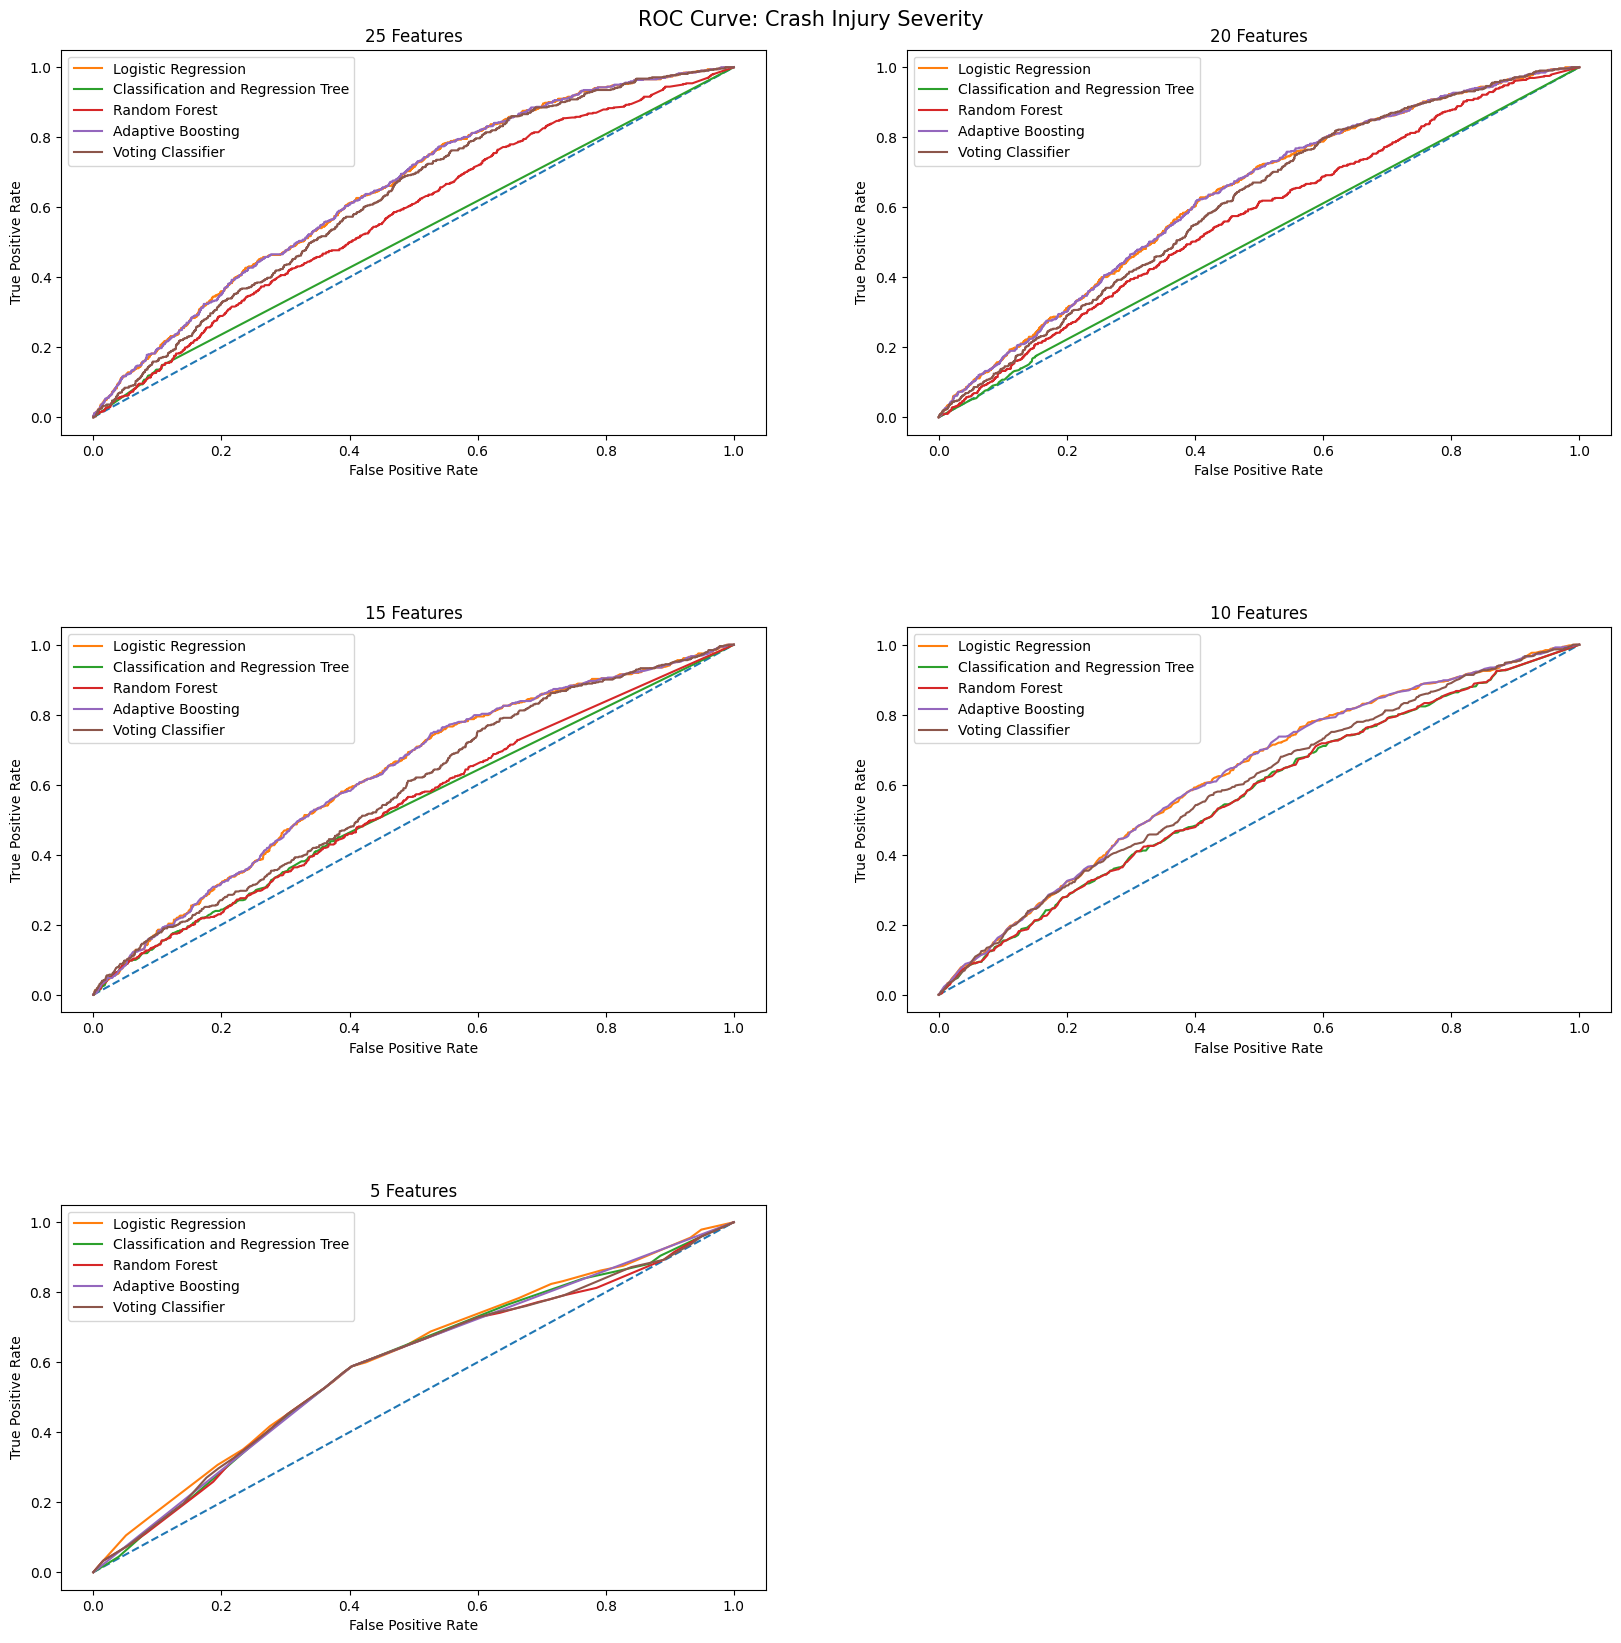

In [43]:
r_pred_probs = [0 for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pred_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_pred_probs)

# ROC plot
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axs.flat[-1].set_visible(False)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('ROC Curve: Crash Injury Severity', fontsize=15, y=.9)

feature_no = [25, 20, 15, 10, 5]
for i in range(len(feature_no)): 
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(3, 2, i + 1)
    
    # updating subplot with ROC curves
    plt.plot(r_fpr, r_tpr, linestyle='--')
    plt.plot(fpr_lr[i], tpr_lr[i], label='Logistic Regression')
   #plt.plot(fpr_svm[i], tpr_svm[i], label='Support Vector Machine')
    plt.plot(fpr_cart[i], tpr_cart[i], label='Classification and Regression Tree')
    plt.plot(fpr_rfc[i], tpr_rfc[i], label='Random Forest')
    plt.plot(fpr_adaboost[i], tpr_adaboost[i], label='Adaptive Boosting')
    plt.plot(fpr_vc[i], tpr_vc[i], label='Voting Classifier')

    plt.title('{} Features'.format(feature_no[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend() 

plt.savefig('ROC_Plot.png', dpi=600, bbox_inches="tight")
plt.show()

## SHAP plot

In [44]:
# fitting Random Forest with first 20 features
hp = model_group_by.get_group('random_forest').reset_index(drop=True).loc[1, 'best_params']
rfc = RandomForestClassifier(n_estimators=hp['n_estimators'], max_depth=hp['max_depth'], max_features=hp['max_features'], criterion=hp['criterion'], random_state=0)
rfc.fit(X_train_ROS[feat_comb[1]], y_train_ROS)

RandomForestClassifier(max_depth=19, n_estimators=1000, random_state=0)

In [45]:
# shap plot for Random Forest for first 20 features
rfc_explainer = shap.TreeExplainer(rfc)
rfc_shap_values = rfc_explainer.shap_values(X_train_ROS)

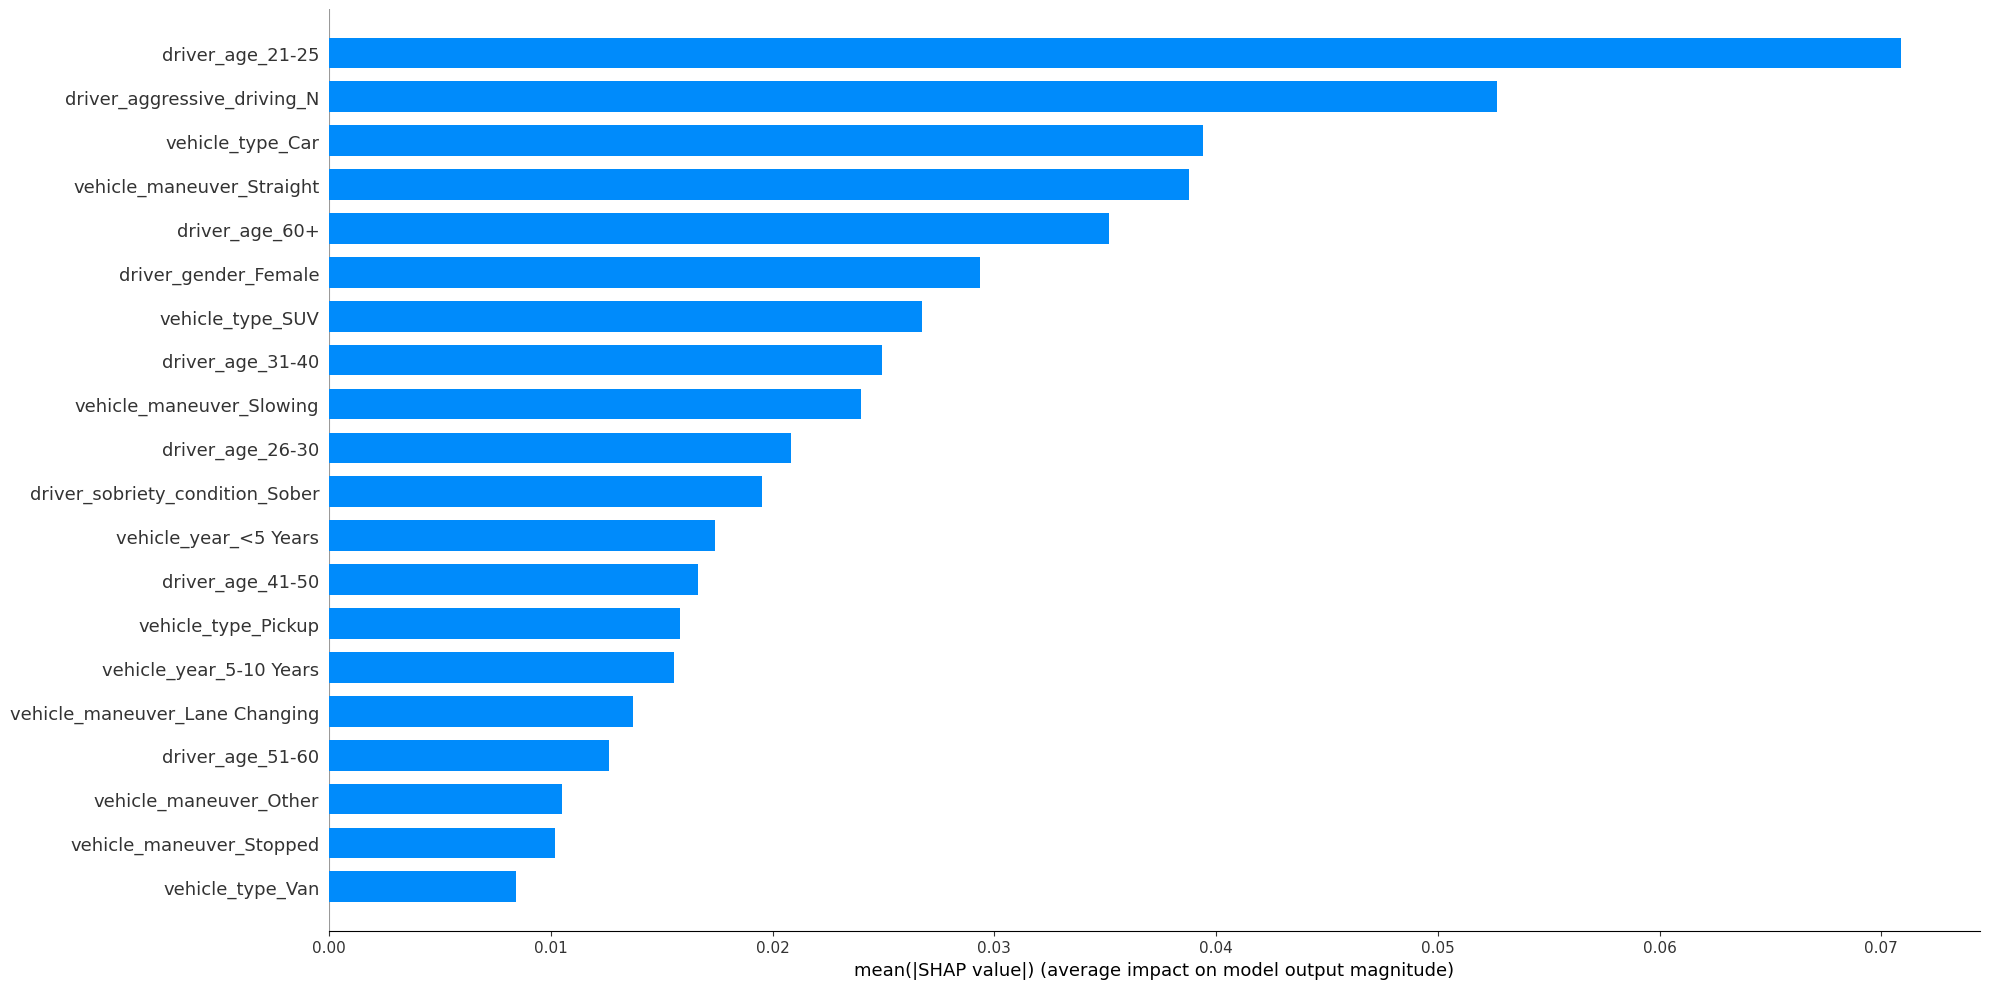

In [46]:
# global feature importance
shap.summary_plot(rfc_shap_values[1], features=X_train_ROS, feature_names=X_train_ROS.columns, plot_type='bar', plot_size=(20,10), show=False)

plt.savefig('GlobalFeatureImportance_RF.png', dpi=600, bbox_inches='tight')
plt.show()

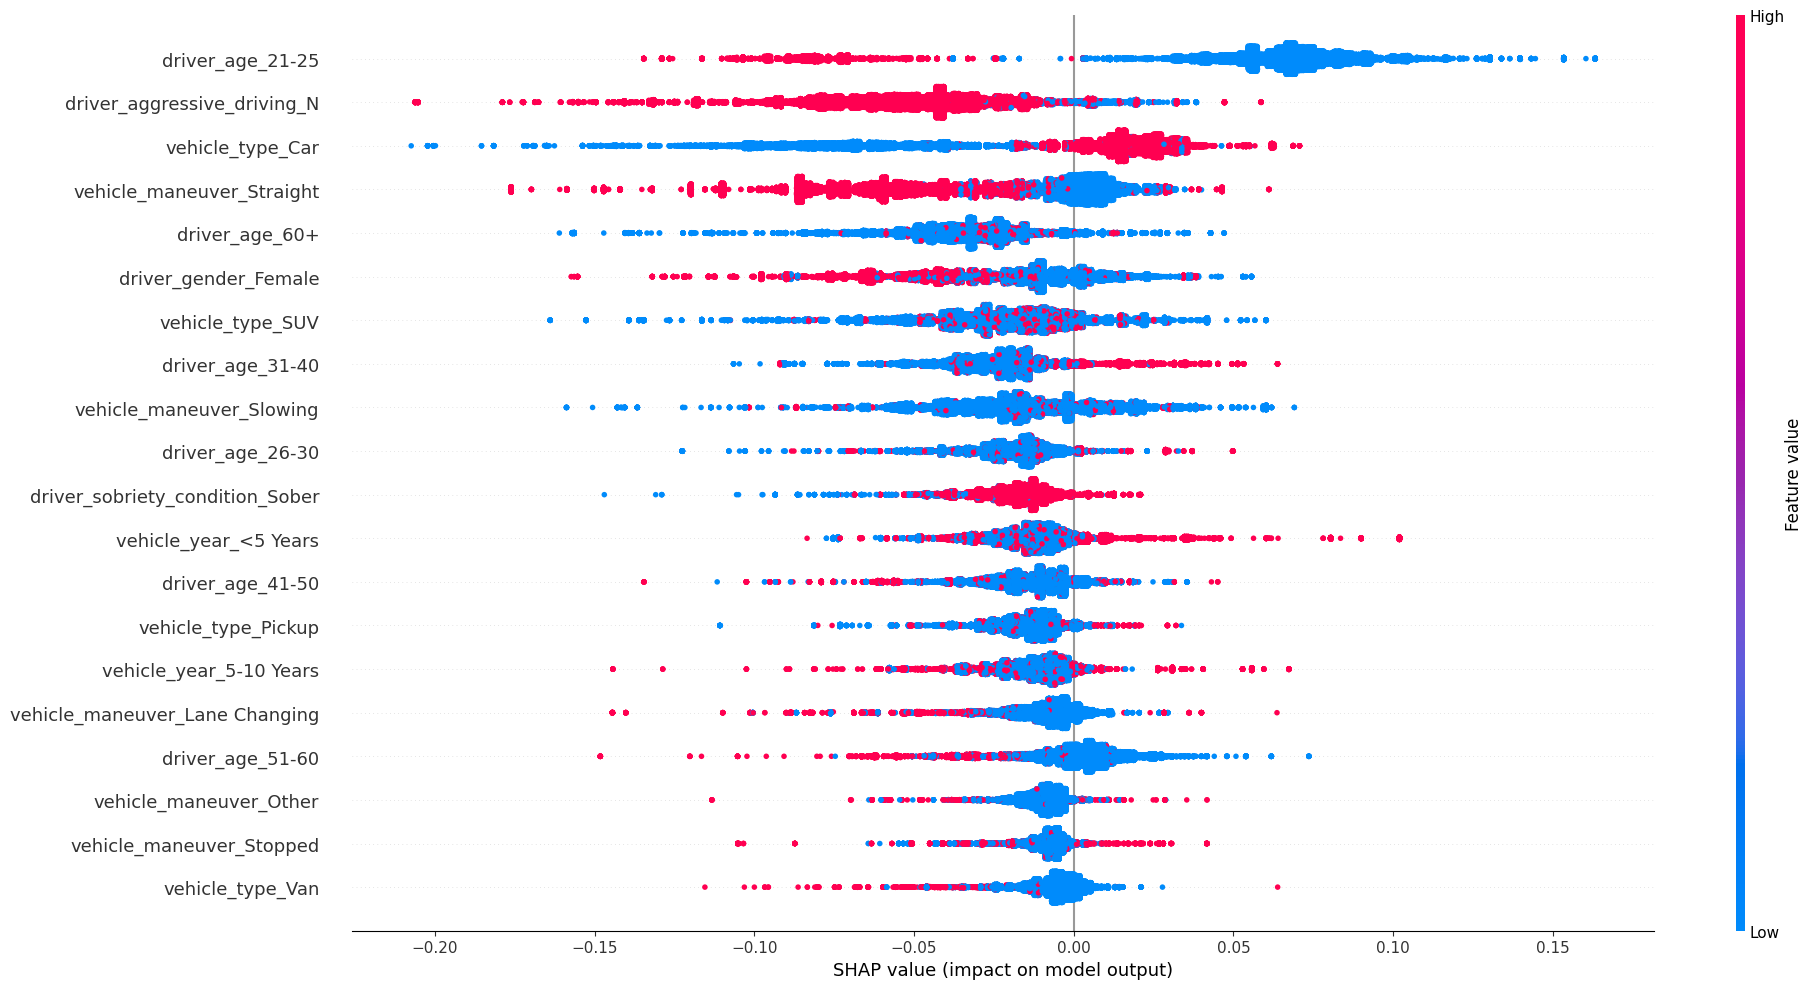

In [48]:
# local explanation summary
shap.summary_plot(rfc_shap_values[1], features=X_train_ROS, feature_names=X_train_ROS.columns, plot_size=(20,10),show=False)

plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

plt.savefig('SHAP_LocalExplanationSummary_RF.png', dpi=600, bbox_inches='tight')
plt.show()

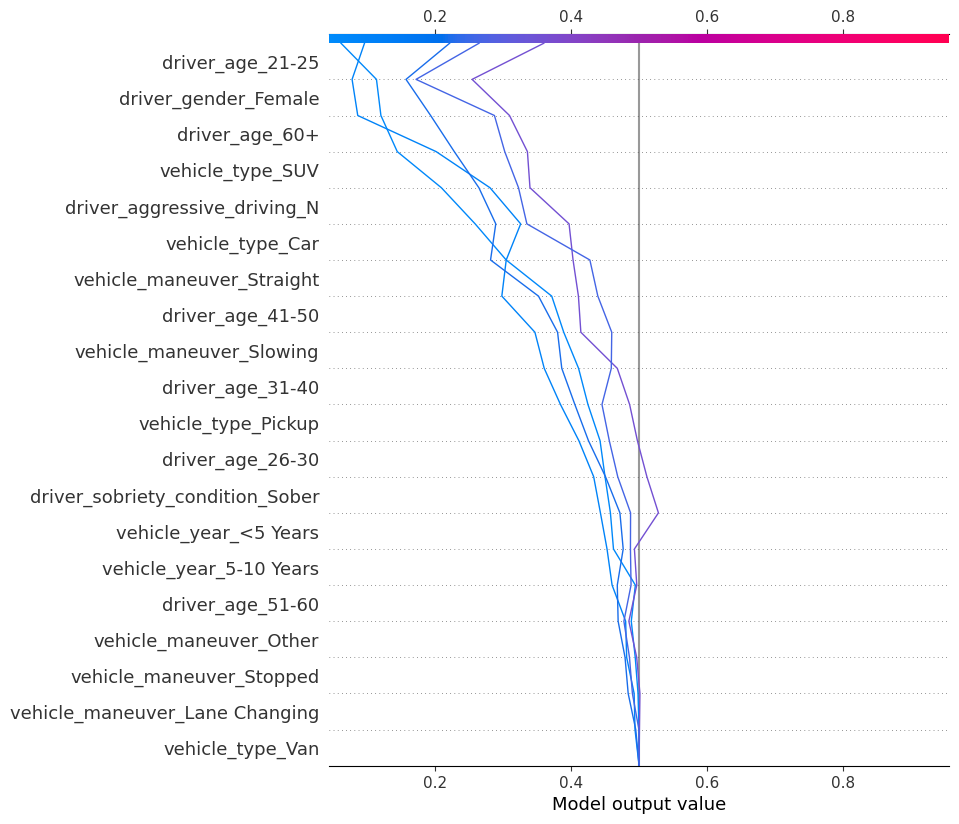

In [49]:
# decision_plot for first five observation in test data
shap_values = rfc_explainer.shap_values(X_test)
expected_value = rfc_explainer.expected_value

shap.decision_plot(expected_value[1], shap_values[1][0:5], feature_names=X_test.columns.tolist(), show=False)

plt.savefig('DecisionPlot_RF.png', dpi=600, bbox_inches='tight')
plt.show()